In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/yuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# declaring variables

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length


In [3]:
x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))

In [6]:
x.size

50000

In [8]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

The data is reshaped into the batch sizes rows, it puts the one dimensional array with the size of the batch size, which will then be cut into smaller mini batches. 

There are basic tensorflow data structures that will be used: placeholders and variables

On each run:
    - batch data is fed to **placeholders** (the starting nodes of the computational graph)
    - The **variables** are weights and biases, declared as variables can make them persistant across runs, and can be updated incrementally on each run (batch).

In [9]:
# These are the placeholders for the batches
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

# These are the variables
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

This is the whole function for the simple RNN model

Instructions for updating:
Use `tf.global_variables_initializer` instead.


<Figure size 432x288 with 0 Axes>

New data, epoch 0
Step 0 Loss 0.729321


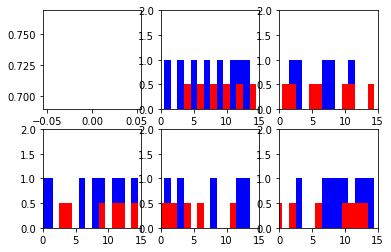

Step 100 Loss 0.719635


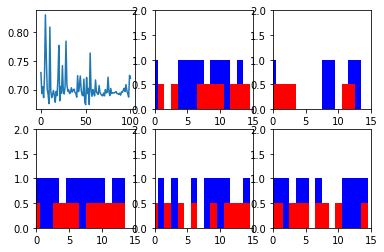

Step 200 Loss 0.698623


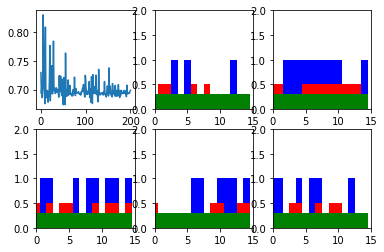

Step 300 Loss 0.693528


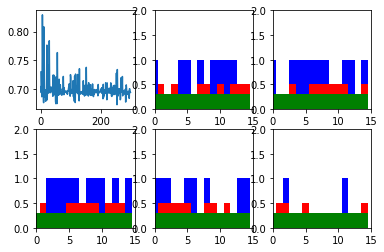

Step 400 Loss 0.685739


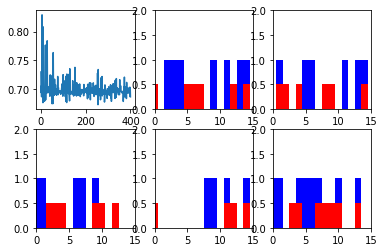

Step 500 Loss 0.691507


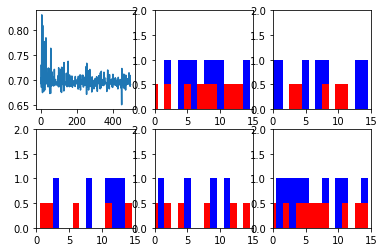

Step 600 Loss 0.683402


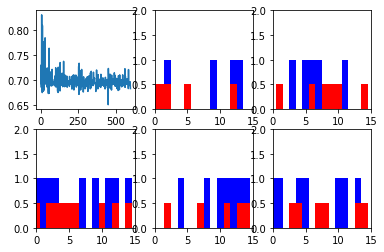

New data, epoch 1
Step 0 Loss 0.691919


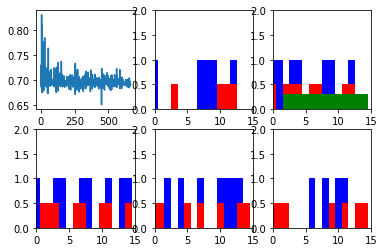

Step 100 Loss 0.644197


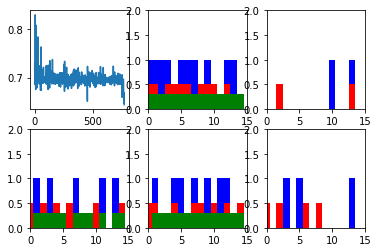

Step 200 Loss 0.0509011


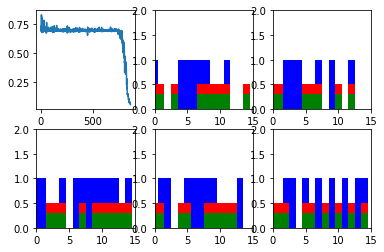

Step 300 Loss 0.0221506


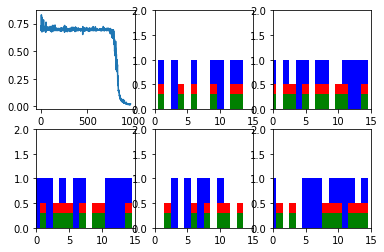

Step 400 Loss 0.0095256


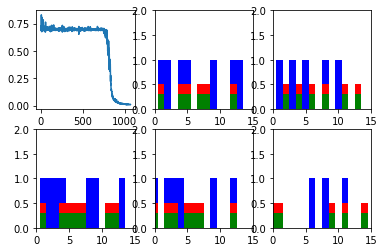

Step 500 Loss 0.00548563


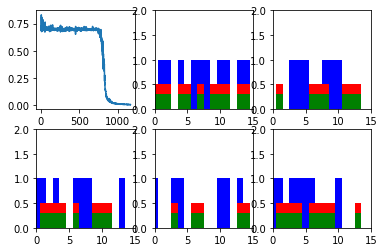

Step 600 Loss 0.00497881


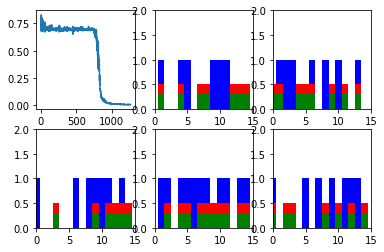

New data, epoch 2
Step 0 Loss 0.165034


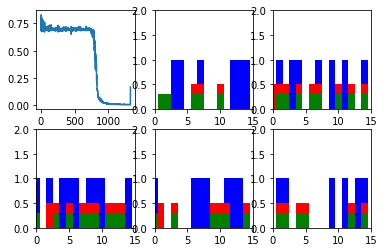

Step 100 Loss 0.00308491


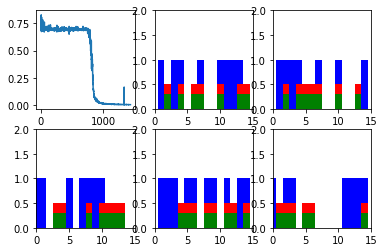

Step 200 Loss 0.00260068


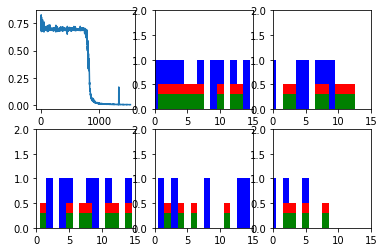

Step 300 Loss 0.00211463


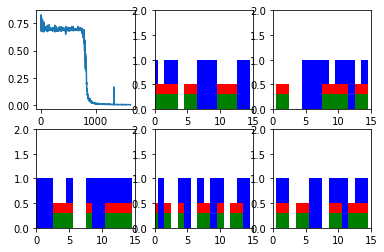

Step 400 Loss 0.00203658


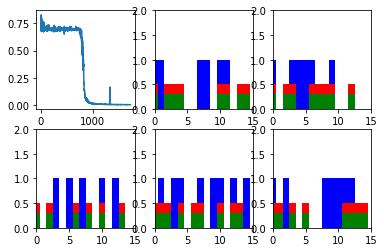

Step 500 Loss 0.0017845


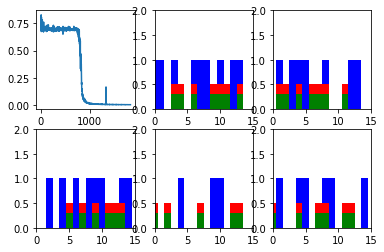

Step 600 Loss 0.00162863


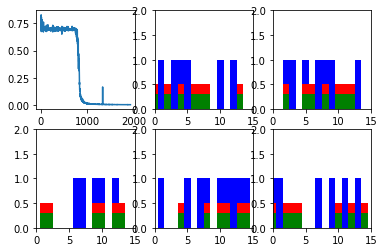

New data, epoch 3
Step 0 Loss 0.164438


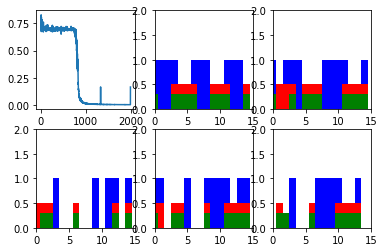

Step 100 Loss 0.0015138


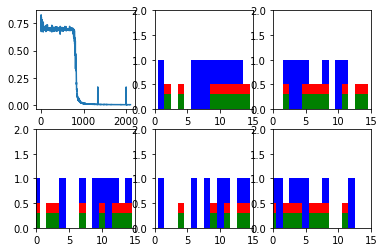

Step 200 Loss 0.00124532


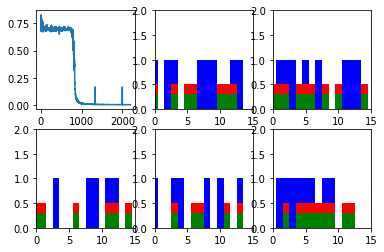

Step 300 Loss 0.00123887


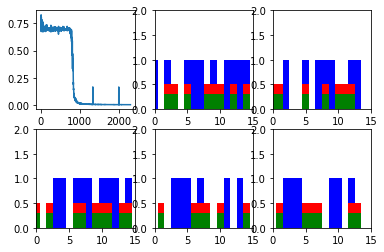

Step 400 Loss 0.00142367


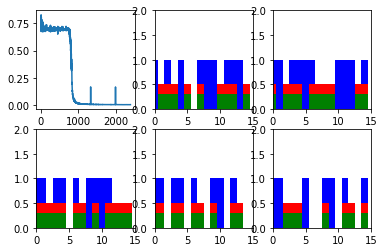

Step 500 Loss 0.00100395


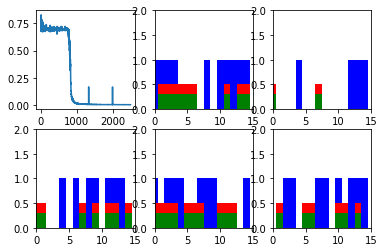

Step 600 Loss 0.000962073


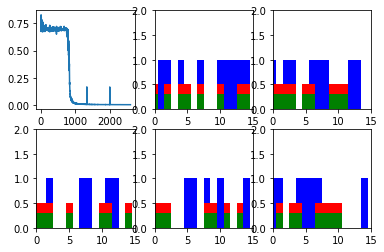

New data, epoch 4
Step 0 Loss 0.174558


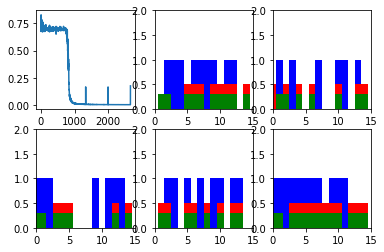

Step 100 Loss 0.000951217


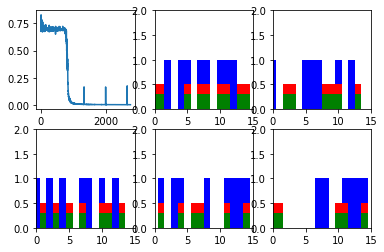

Step 200 Loss 0.00106738


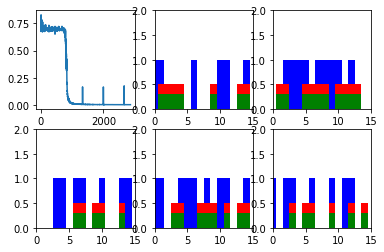

Step 300 Loss 0.000952172


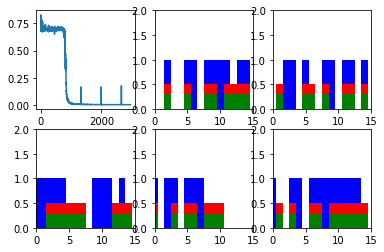

Step 400 Loss 0.000784224


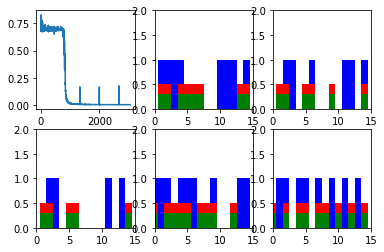

Step 500 Loss 0.000767737


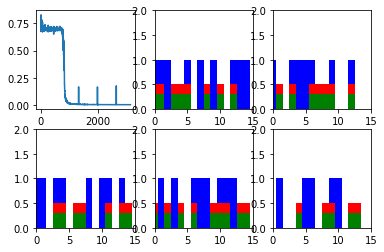

Step 600 Loss 0.000645451


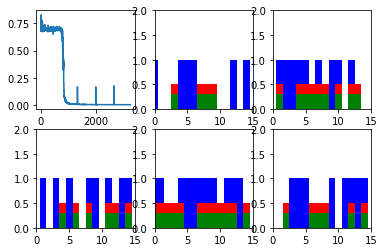

New data, epoch 5
Step 0 Loss 0.153402


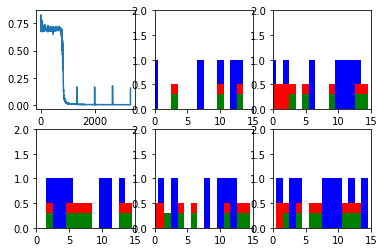

Step 100 Loss 0.00231392


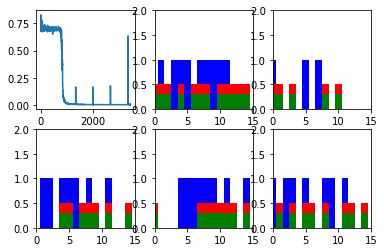

Step 200 Loss 0.00158479


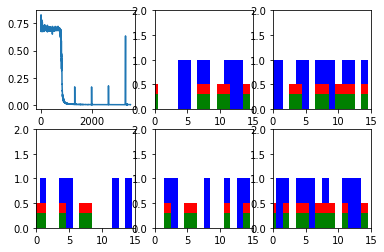

Step 300 Loss 0.00114604


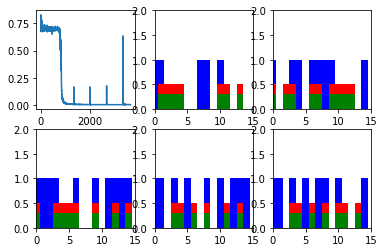

Step 400 Loss 0.00109999


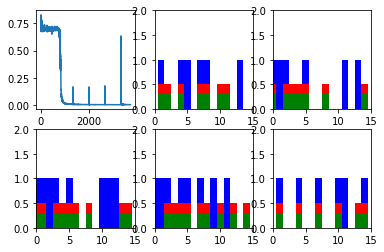

Step 500 Loss 0.000852152


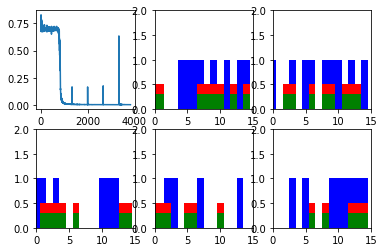

Step 600 Loss 0.000859095


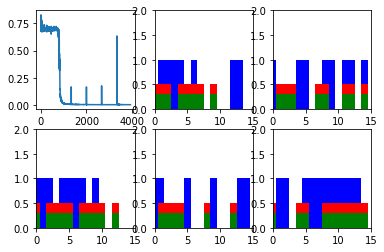

New data, epoch 6
Step 0 Loss 0.247102


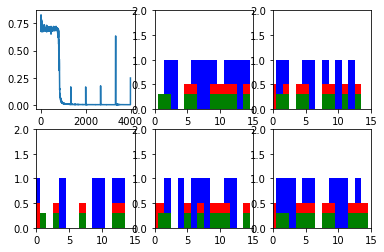

Step 100 Loss 0.000921374


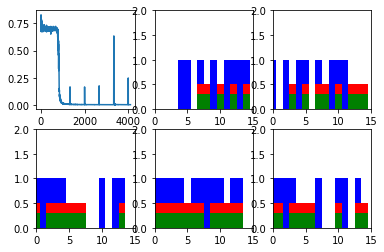

Step 200 Loss 0.000689415


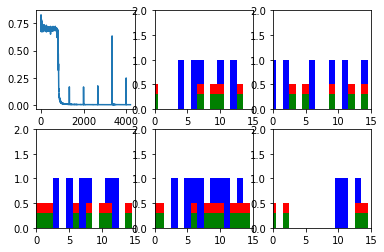

Step 300 Loss 0.000655919


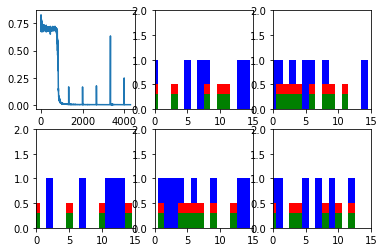

Step 400 Loss 0.000648417


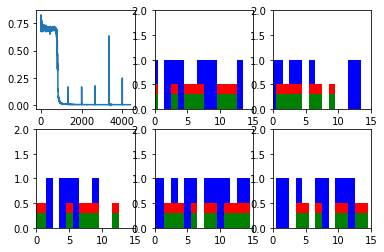

Step 500 Loss 0.00053162


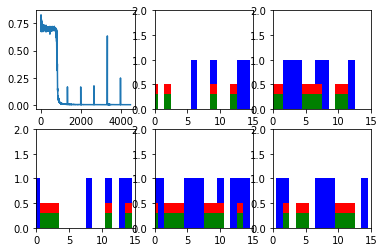

Step 600 Loss 0.000607582


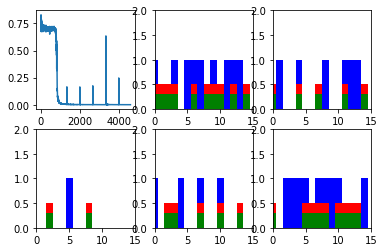

New data, epoch 7
Step 0 Loss 0.102257


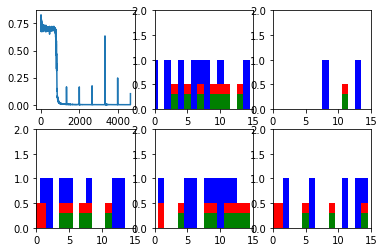

Step 100 Loss 0.000600037


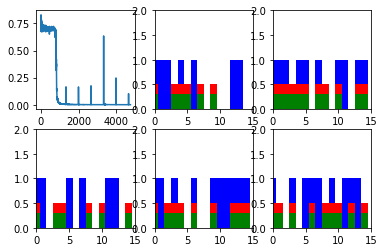

Step 200 Loss 0.0005392


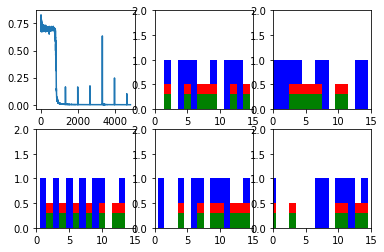

Step 300 Loss 0.000466664


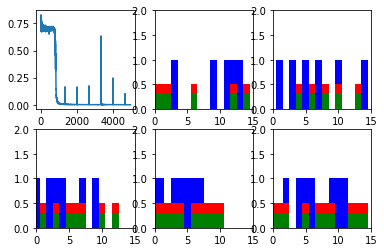

Step 400 Loss 0.000545046


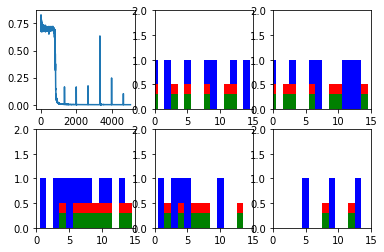

Step 500 Loss 0.000442963


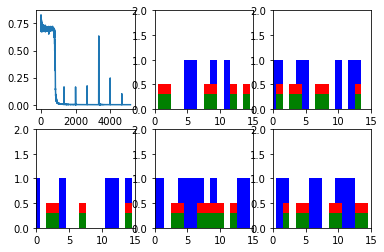

Step 600 Loss 0.000512104


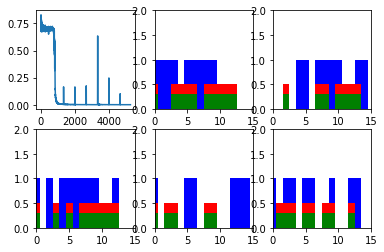

New data, epoch 8
Step 0 Loss 0.267187


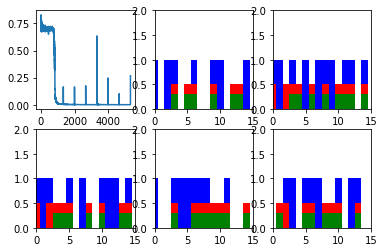

Step 100 Loss 0.000480523


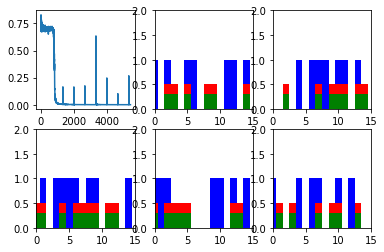

Step 200 Loss 0.000432463


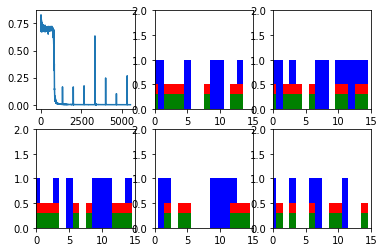

Step 300 Loss 0.000461182


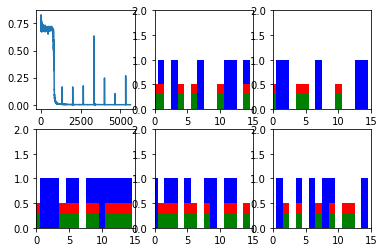

Step 400 Loss 0.000362767


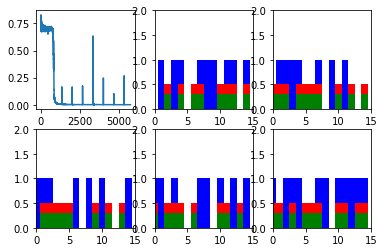

Step 500 Loss 0.000454995


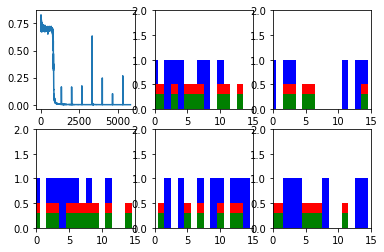

Step 600 Loss 0.000370355


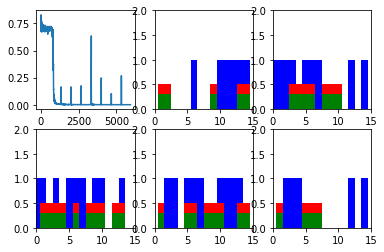

New data, epoch 9
Step 0 Loss 0.17393


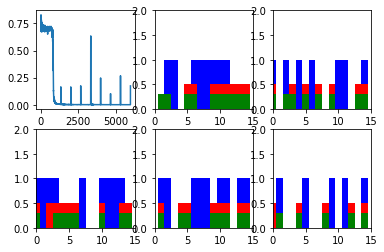

Step 100 Loss 0.000409124


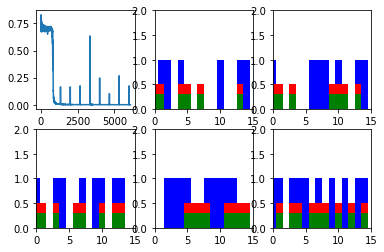

Step 200 Loss 0.000356028


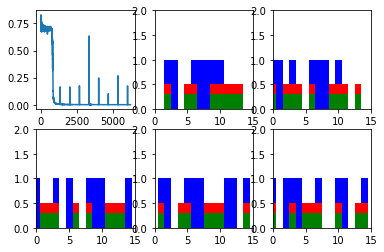

Step 300 Loss 0.000355686


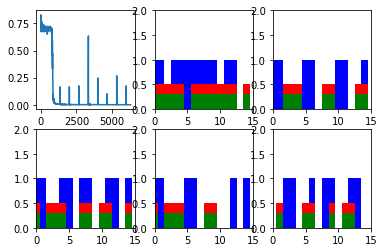

Step 400 Loss 0.000346704


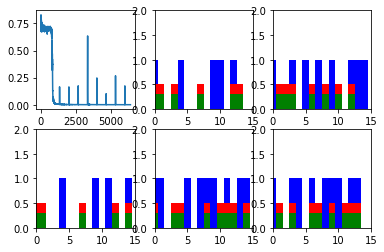

Step 500 Loss 0.0003537


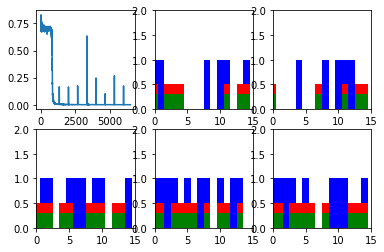

Step 600 Loss 0.000374351


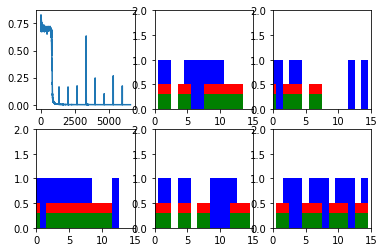

New data, epoch 10
Step 0 Loss 0.293721


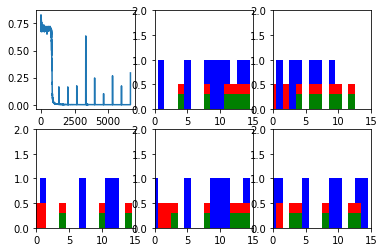

Step 100 Loss 0.00036972


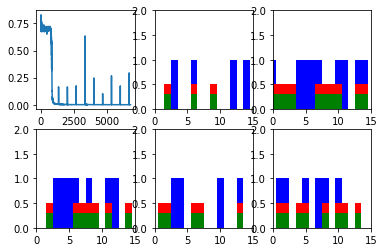

Step 200 Loss 0.00035978


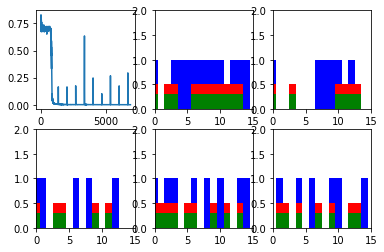

Step 300 Loss 0.000329834


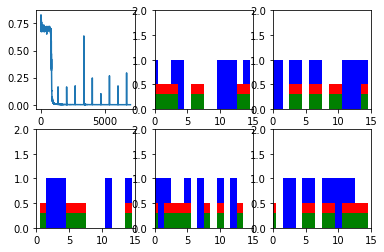

Step 400 Loss 0.000311051


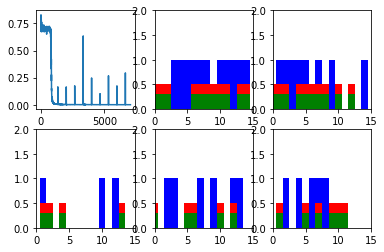

Step 500 Loss 0.00031304


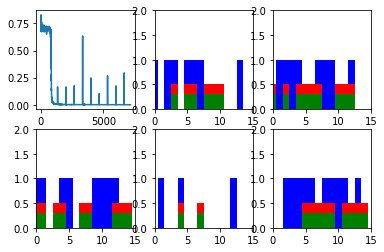

Step 600 Loss 0.000330756


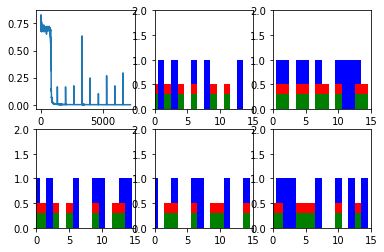

New data, epoch 11
Step 0 Loss 0.145546


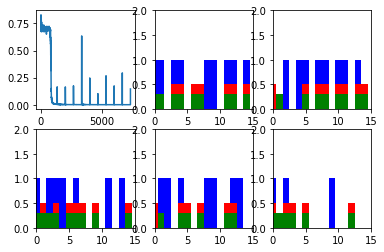

Step 100 Loss 0.000374602


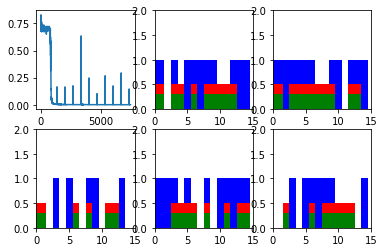

Step 200 Loss 0.000288577


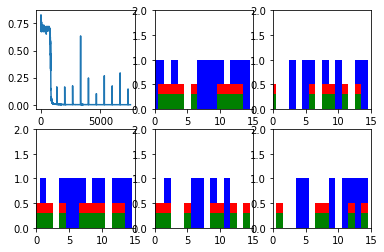

Step 300 Loss 0.000288981


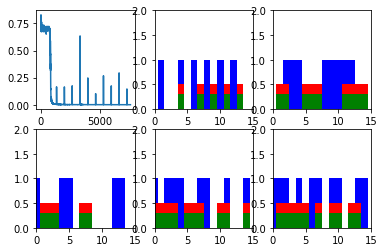

Step 400 Loss 0.000326287


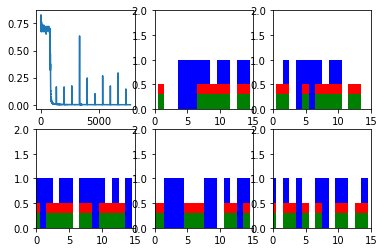

Step 500 Loss 0.000320388


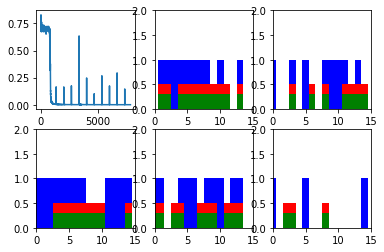

Step 600 Loss 0.000347872


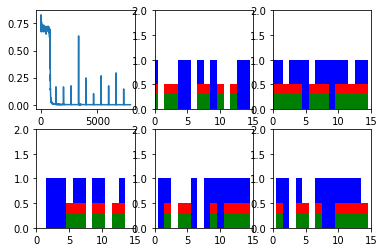

New data, epoch 12
Step 0 Loss 0.222865


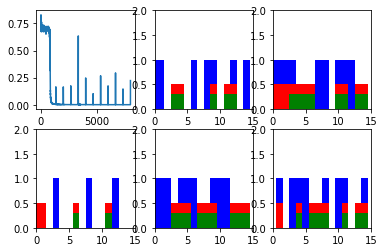

Step 100 Loss 0.000228568


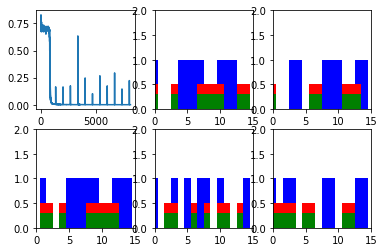

Step 200 Loss 0.000229194


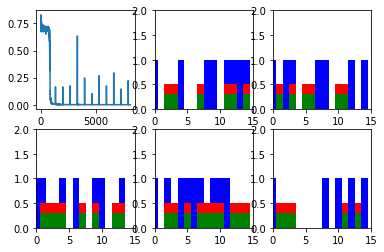

Step 300 Loss 0.000227032


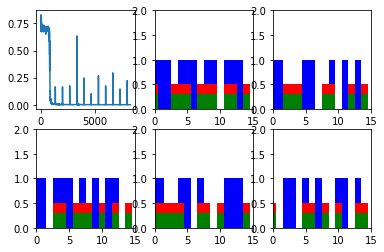

Step 400 Loss 0.000292602


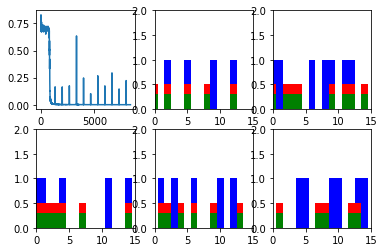

Step 500 Loss 0.000246684


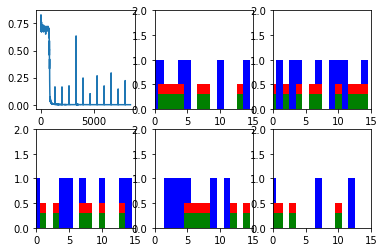

Step 600 Loss 0.000293947


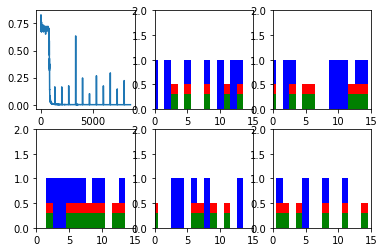

New data, epoch 13
Step 0 Loss 0.174194


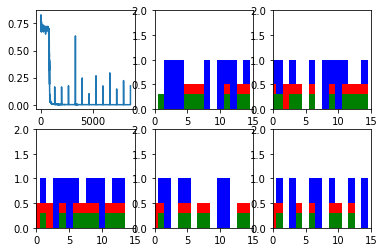

Step 100 Loss 0.000232941


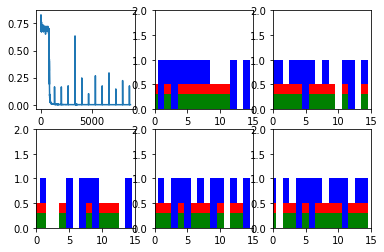

Step 200 Loss 0.000220478


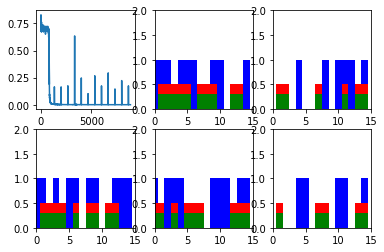

Step 300 Loss 0.000276835


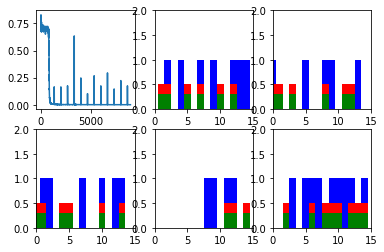

Step 400 Loss 0.000232059


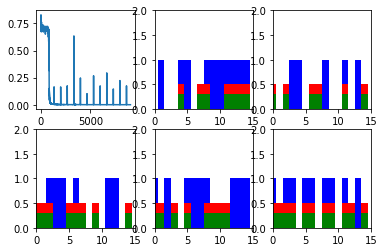

Step 500 Loss 0.000233373


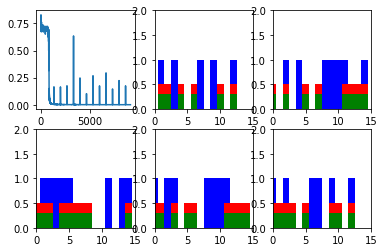

Step 600 Loss 0.000213519


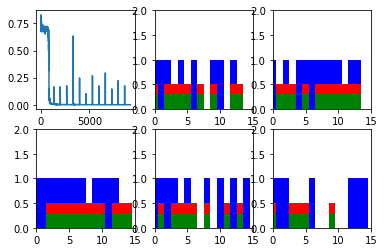

New data, epoch 14
Step 0 Loss 0.250317


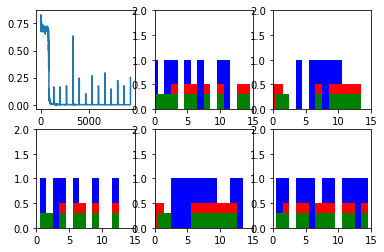

Step 100 Loss 0.000245947


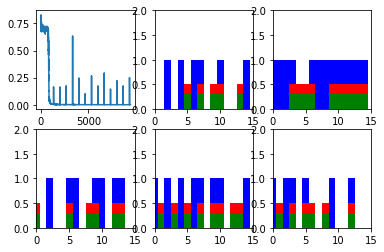

Step 200 Loss 0.000231857


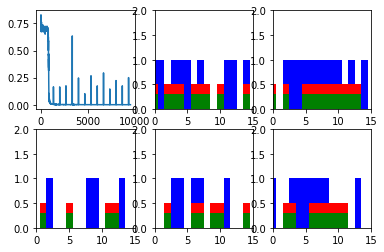

Step 300 Loss 0.000232521


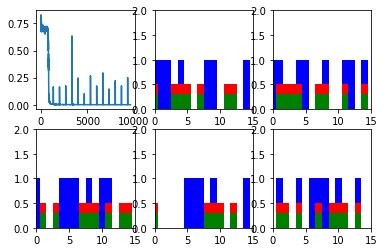

Step 400 Loss 0.000238696


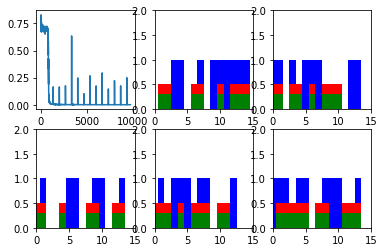

Step 500 Loss 0.000219898


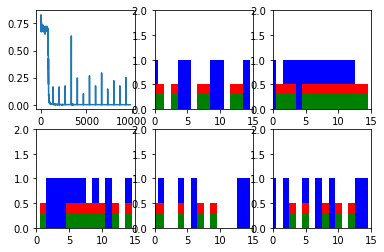

Step 600 Loss 0.000232306


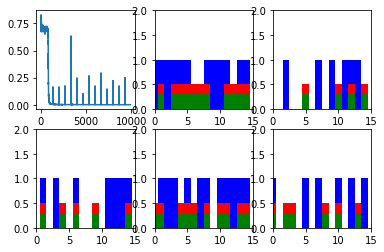

New data, epoch 15
Step 0 Loss 0.414492


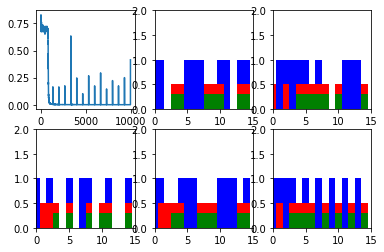

Step 100 Loss 0.00019881


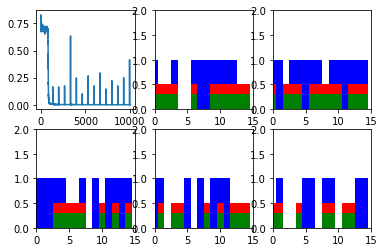

Step 200 Loss 0.000216334


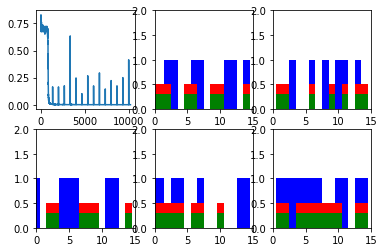

Step 300 Loss 0.000216942


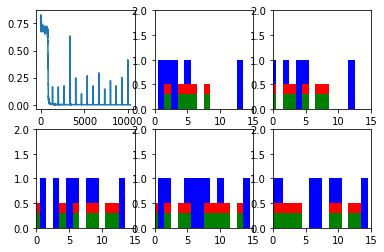

Step 400 Loss 0.000215757


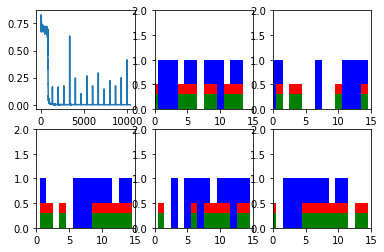

Step 500 Loss 0.000217554


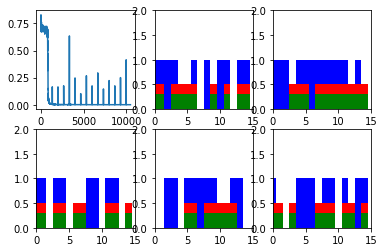

Step 600 Loss 0.000214138


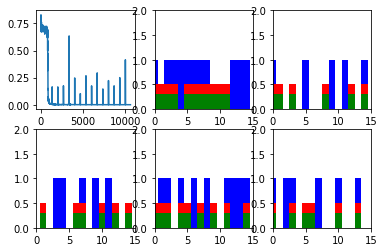

New data, epoch 16
Step 0 Loss 0.139277


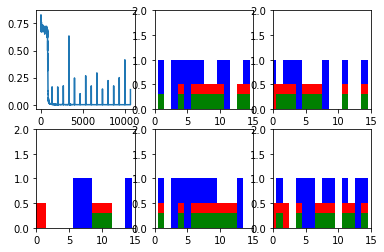

Step 100 Loss 0.000223289


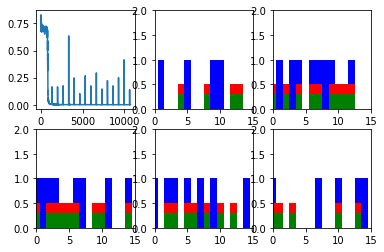

Step 200 Loss 0.000195212


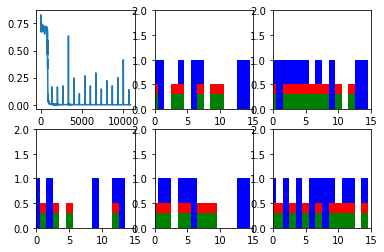

Step 300 Loss 0.000190562


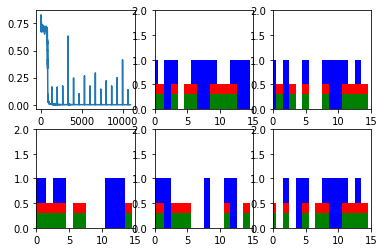

Step 400 Loss 0.000170385


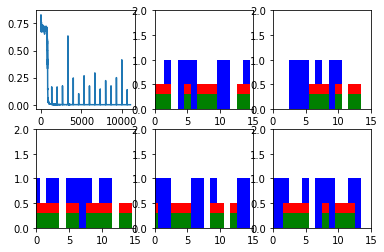

Step 500 Loss 0.000160415


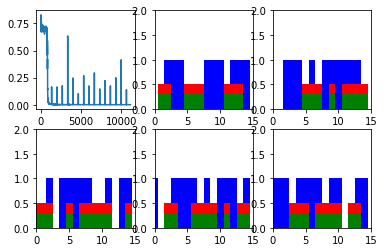

Step 600 Loss 0.000172171


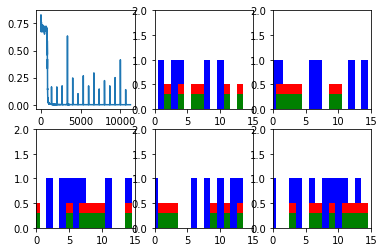

New data, epoch 17
Step 0 Loss 0.237026


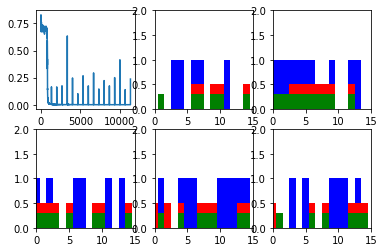

Step 100 Loss 0.000175377


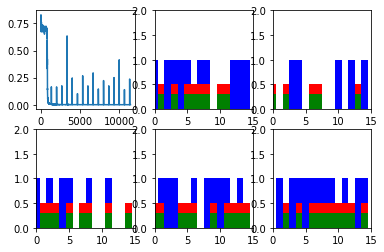

Step 200 Loss 0.000193557


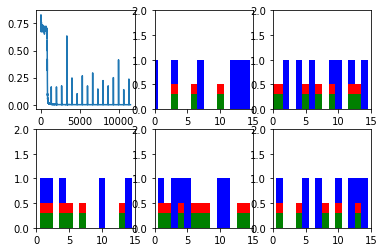

Step 300 Loss 0.000153779


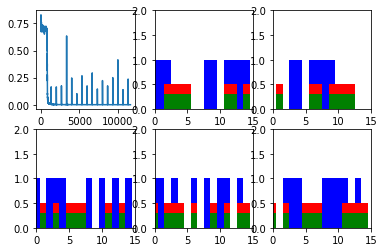

Step 400 Loss 0.000205153


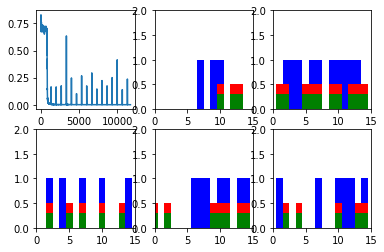

Step 500 Loss 0.000176463


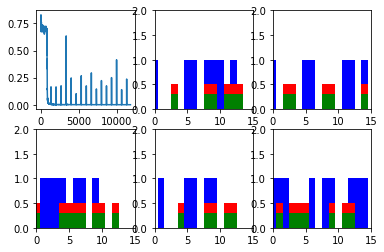

Step 600 Loss 0.000170981


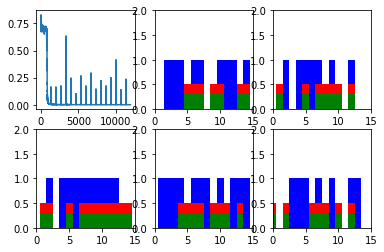

New data, epoch 18
Step 0 Loss 0.235754


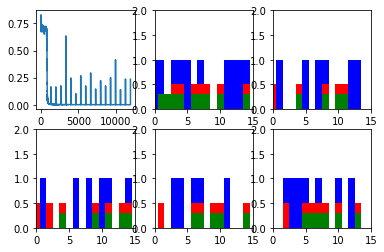

Step 100 Loss 0.000202971


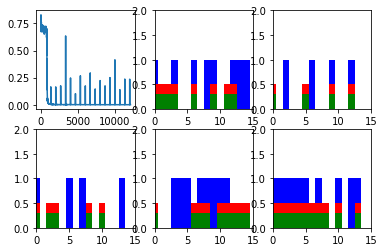

Step 200 Loss 0.000163247


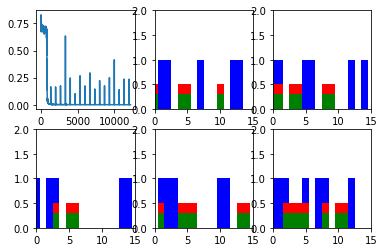

Step 300 Loss 0.000157148


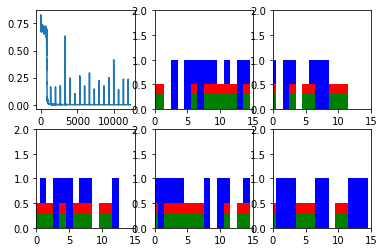

Step 400 Loss 0.000161075


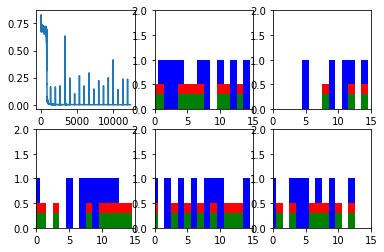

Step 500 Loss 0.00015267


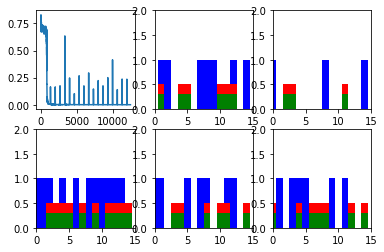

Step 600 Loss 0.000179172


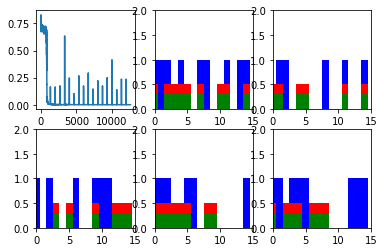

New data, epoch 19
Step 0 Loss 0.176176


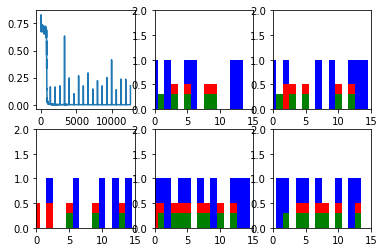

Step 100 Loss 0.000160725


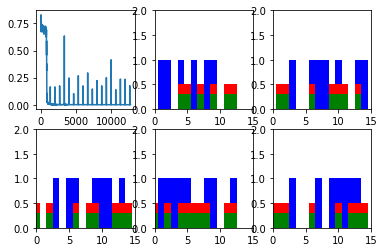

Step 200 Loss 0.000165786


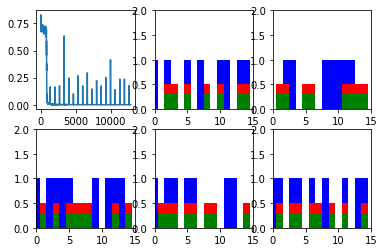

Step 300 Loss 0.000198358


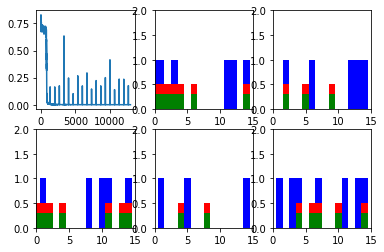

Step 400 Loss 0.000172157


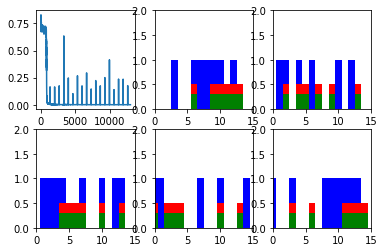

Step 500 Loss 0.000151009


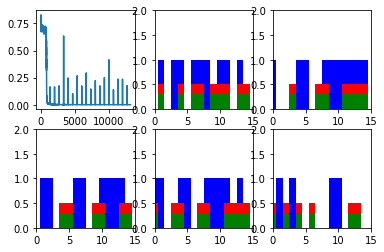

Step 600 Loss 0.000140553


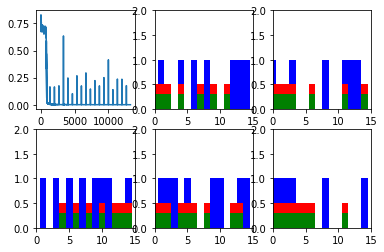

New data, epoch 20
Step 0 Loss 0.179008


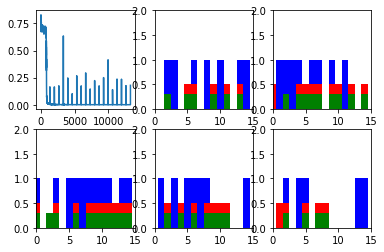

Step 100 Loss 0.000166578


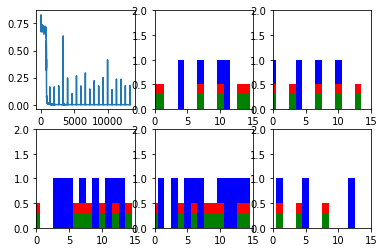

Step 200 Loss 0.000174853


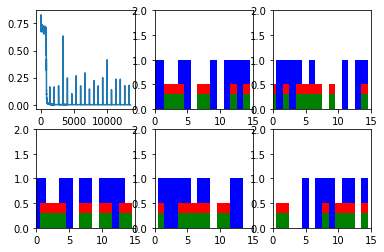

Step 300 Loss 0.000166607


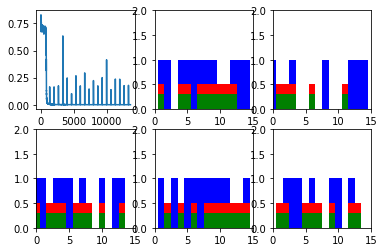

Step 400 Loss 0.000165118


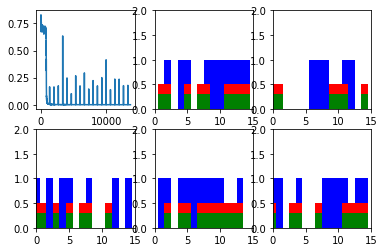

Step 500 Loss 0.000156107


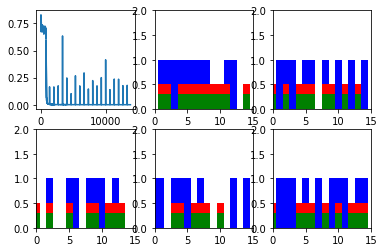

Step 600 Loss 0.000154269


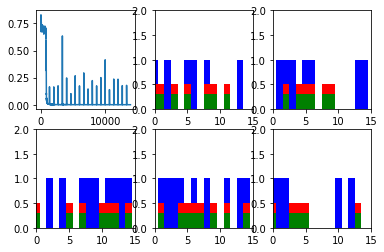

New data, epoch 21
Step 0 Loss 0.292604


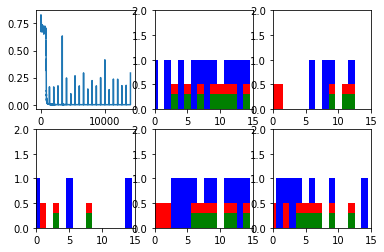

Step 100 Loss 0.00017091


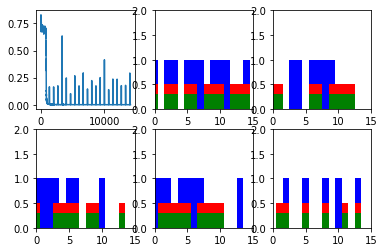

Step 200 Loss 0.000165894


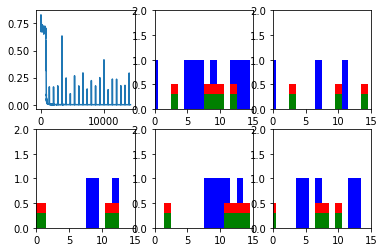

Step 300 Loss 0.000123062


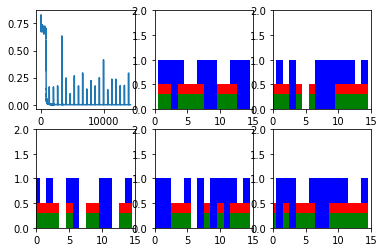

Step 400 Loss 0.000137266


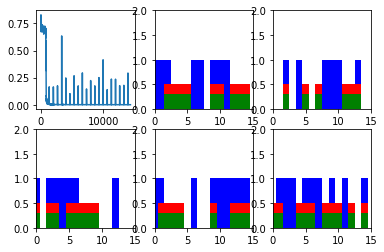

Step 500 Loss 0.000151188


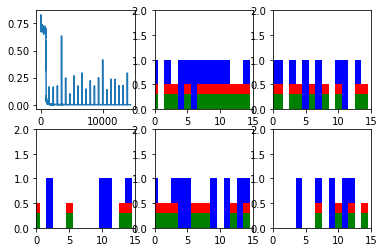

Step 600 Loss 0.000134862


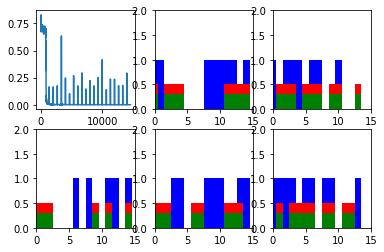

New data, epoch 22
Step 0 Loss 0.194305


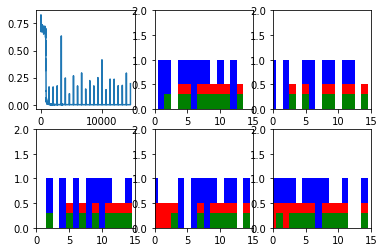

Step 100 Loss 0.000151568


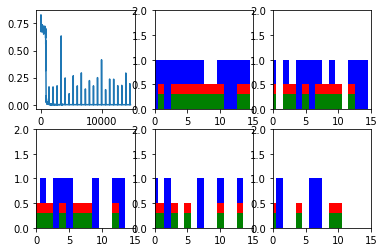

Step 200 Loss 0.00012426


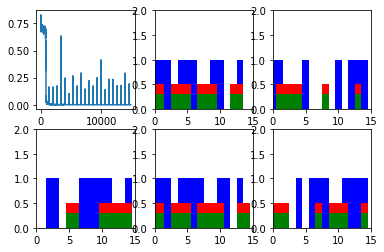

Step 300 Loss 0.000177974


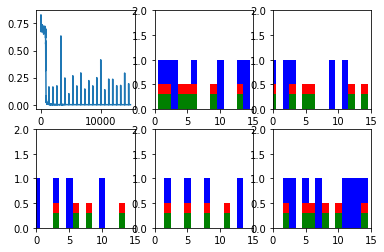

Step 400 Loss 0.000141432


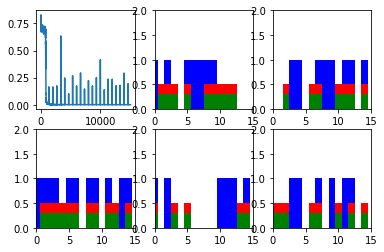

Step 500 Loss 0.000164021


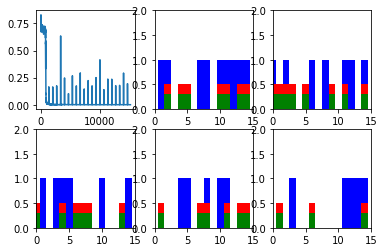

Step 600 Loss 0.000146388


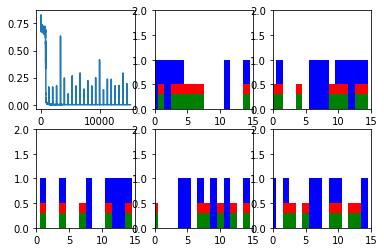

New data, epoch 23
Step 0 Loss 0.225038


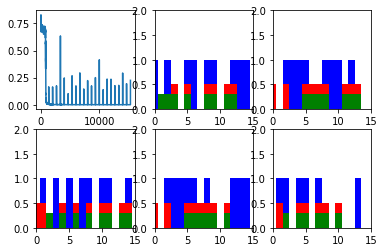

Step 100 Loss 0.000129917


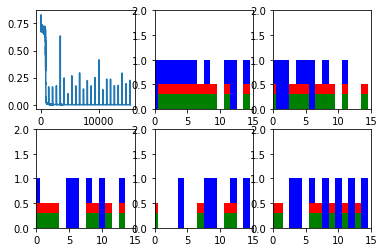

Step 200 Loss 0.000140407


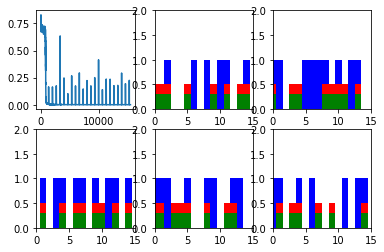

Step 300 Loss 0.000127376


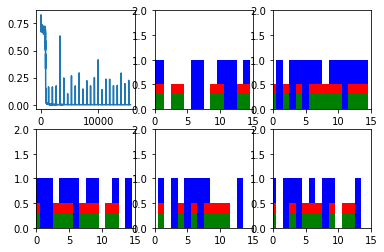

Step 400 Loss 0.000145523


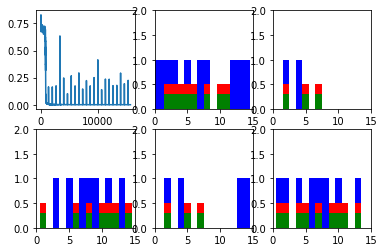

Step 500 Loss 0.00011946


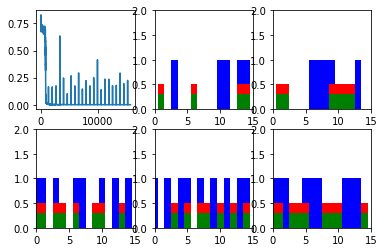

Step 600 Loss 0.000126683


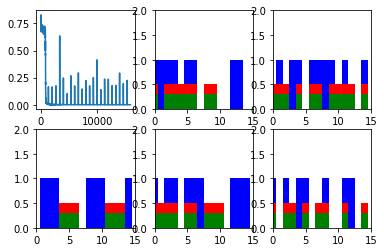

New data, epoch 24
Step 0 Loss 0.151364


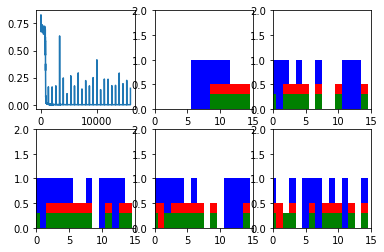

Step 100 Loss 0.000134056


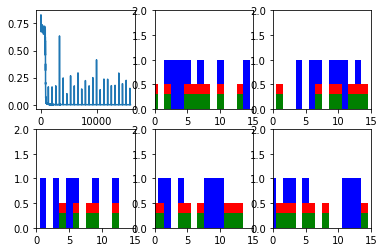

Step 200 Loss 0.00011625


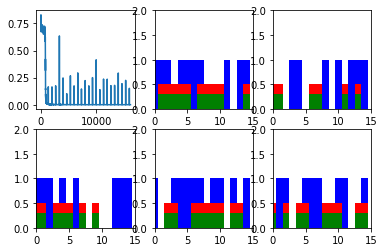

Step 300 Loss 0.000124923


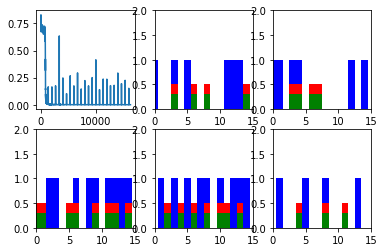

Step 400 Loss 0.000129943


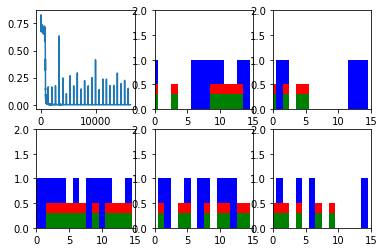

Step 500 Loss 0.000119339


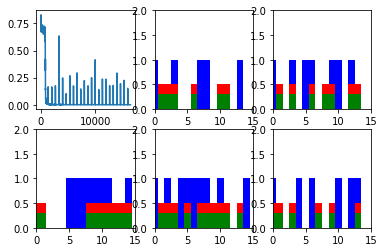

Step 600 Loss 0.000126965


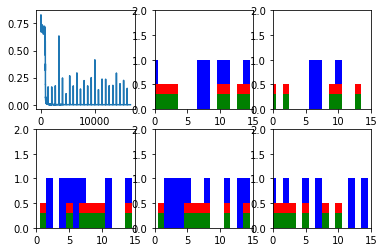

New data, epoch 25
Step 0 Loss 0.130497


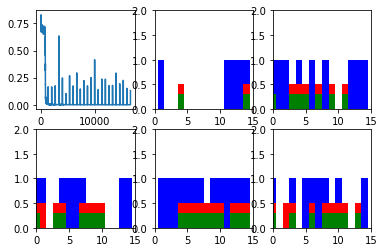

Step 100 Loss 0.000117796


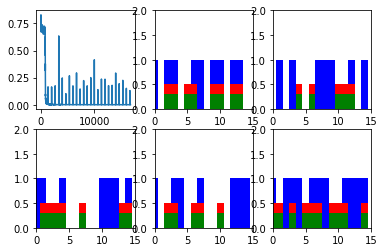

Step 200 Loss 0.000125945


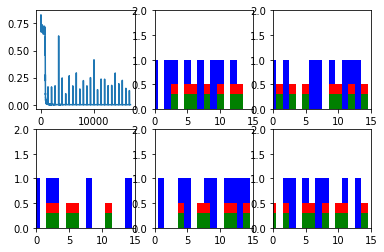

Step 300 Loss 0.000111714


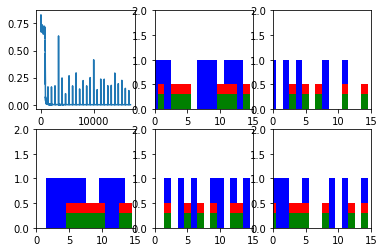

Step 400 Loss 0.000110398


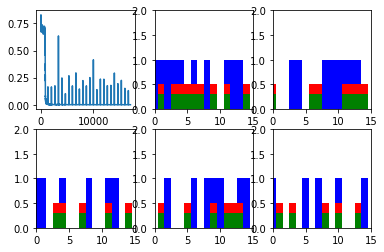

Step 500 Loss 0.000116568


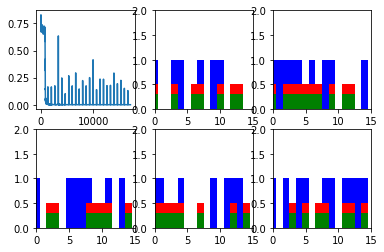

Step 600 Loss 0.000120108


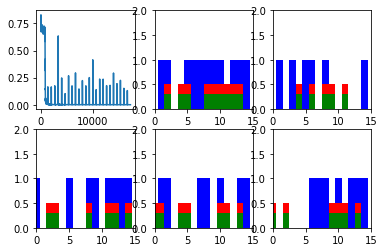

New data, epoch 26
Step 0 Loss 0.261615


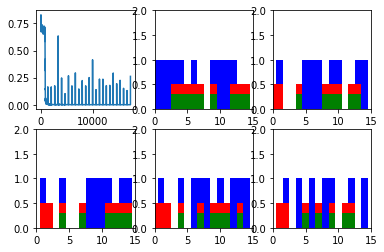

Step 100 Loss 0.000135291


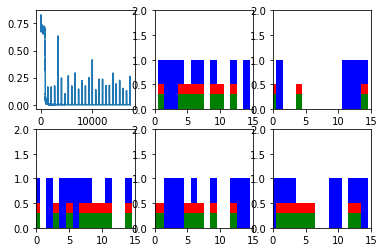

Step 200 Loss 0.000159581


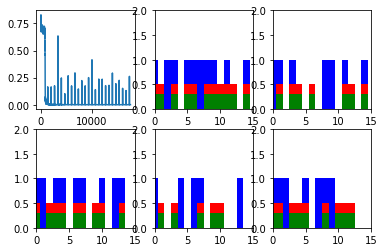

Step 300 Loss 0.000122063


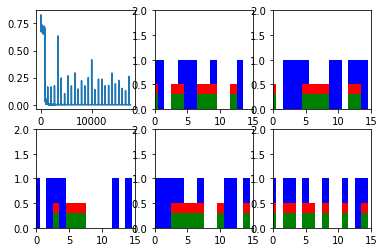

Step 400 Loss 0.000119843


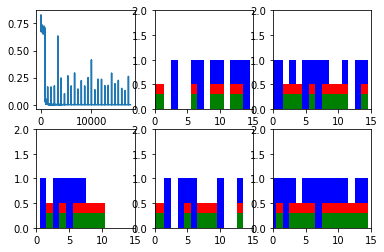

Step 500 Loss 9.97582e-05


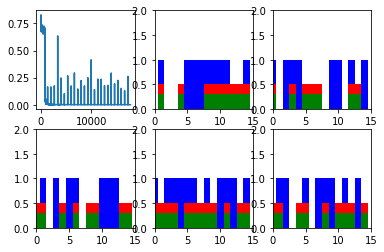

Step 600 Loss 0.000130529


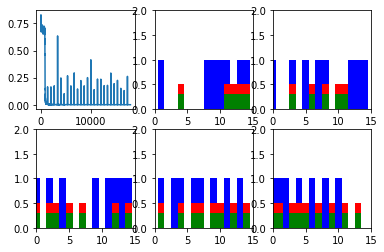

New data, epoch 27
Step 0 Loss 0.266758


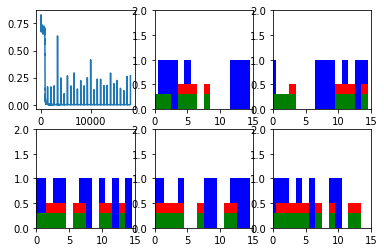

Step 100 Loss 0.000121699


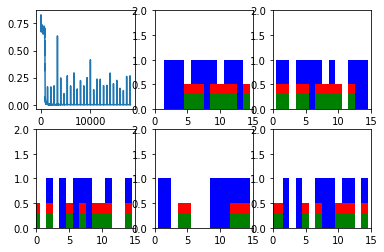

Step 200 Loss 0.000121228


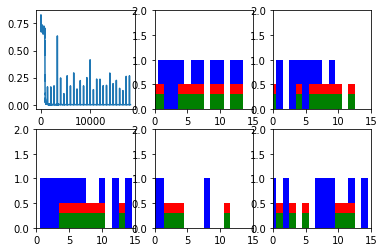

Step 300 Loss 0.00011651


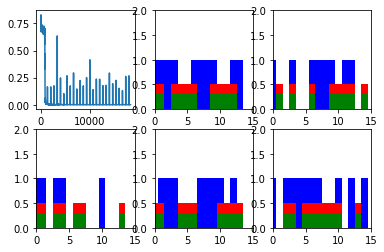

Step 400 Loss 0.000121805


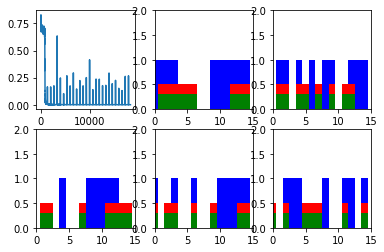

Step 500 Loss 0.000120944


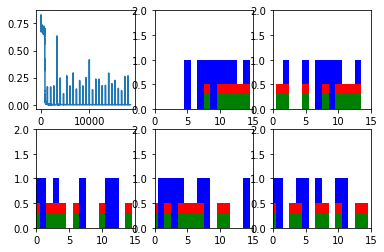

Step 600 Loss 0.000121457


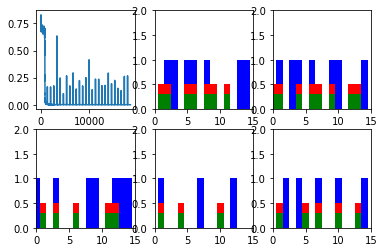

New data, epoch 28
Step 0 Loss 0.389148


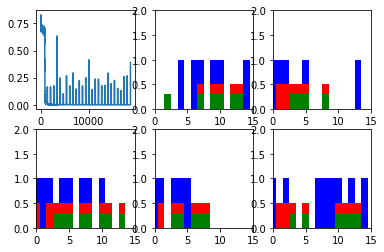

Step 100 Loss 0.000127755


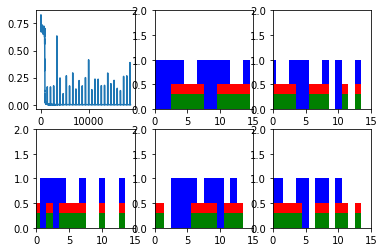

Step 200 Loss 0.000124562


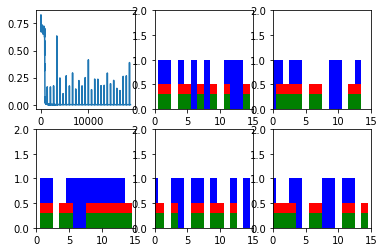

Step 300 Loss 0.00014265


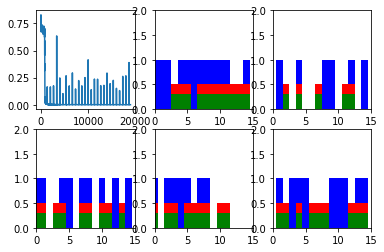

Step 400 Loss 0.000130963


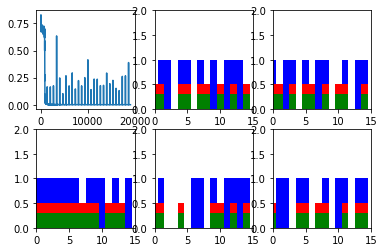

Step 500 Loss 0.000133291


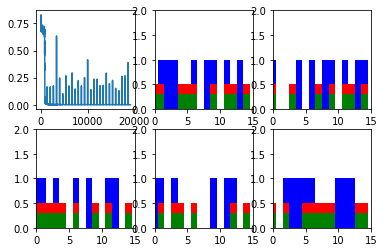

Step 600 Loss 0.000120842


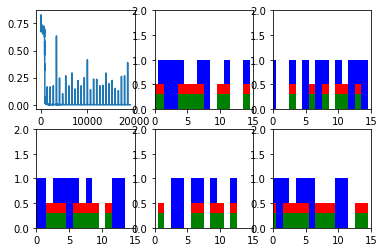

New data, epoch 29
Step 0 Loss 0.270974


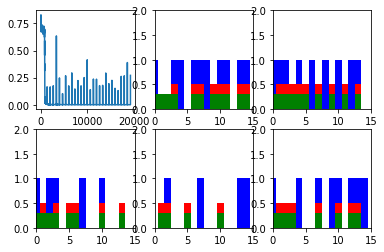

Step 100 Loss 0.000107411


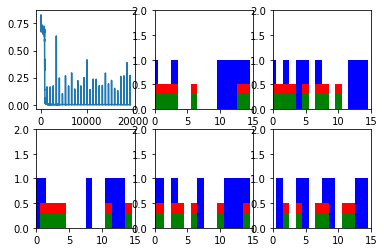

Step 200 Loss 9.43577e-05


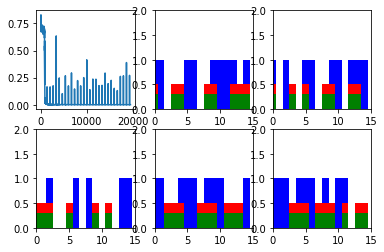

Step 300 Loss 0.000109475


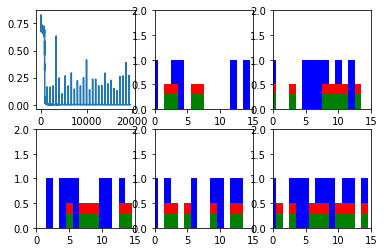

Step 400 Loss 0.000101606


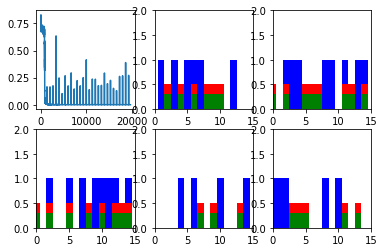

Step 500 Loss 0.000116613


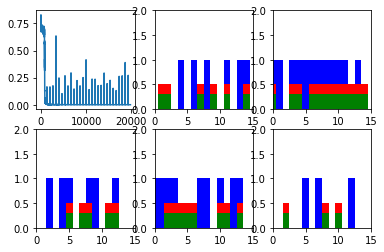

Step 600 Loss 9.51944e-05


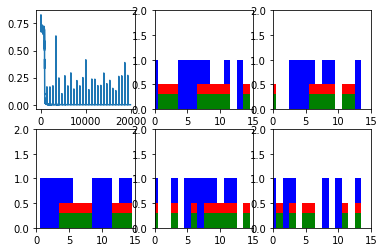

New data, epoch 30
Step 0 Loss 0.172339


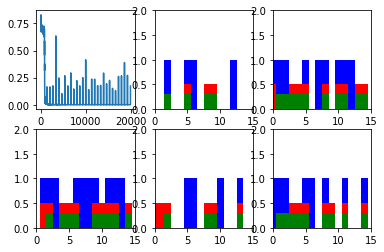

Step 100 Loss 0.000181109


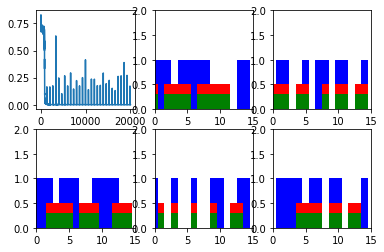

Step 200 Loss 9.77472e-05


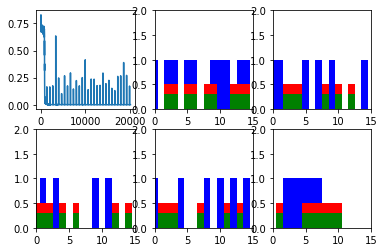

Step 300 Loss 0.000109794


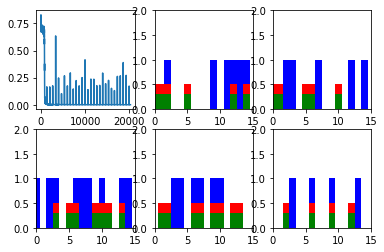

Step 400 Loss 0.00011858


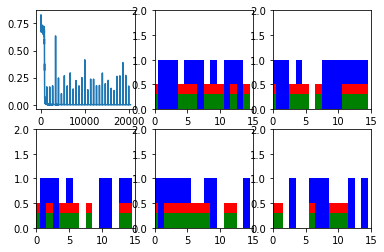

Step 500 Loss 0.000141117


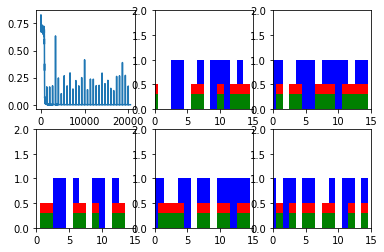

Step 600 Loss 0.000103251


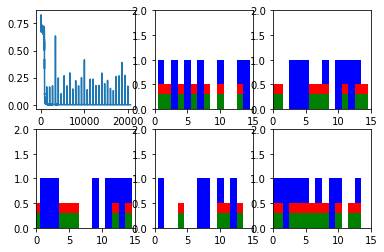

New data, epoch 31
Step 0 Loss 0.162846


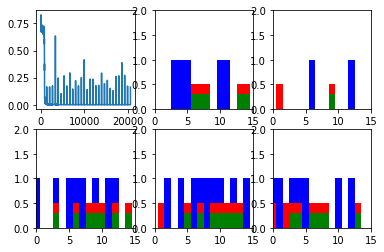

Step 100 Loss 0.000109459


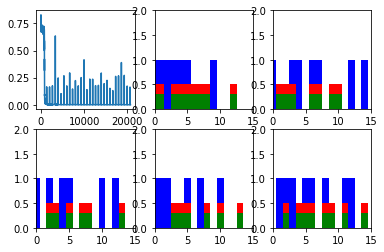

Step 200 Loss 0.000117558


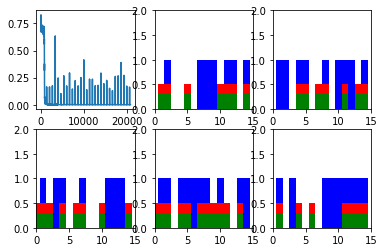

Step 300 Loss 0.000110588


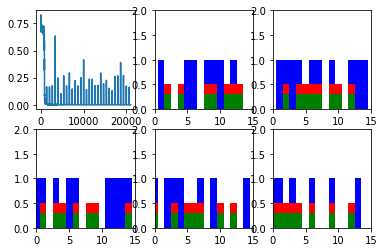

Step 400 Loss 0.00010833


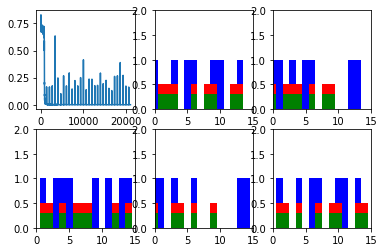

Step 500 Loss 9.20708e-05


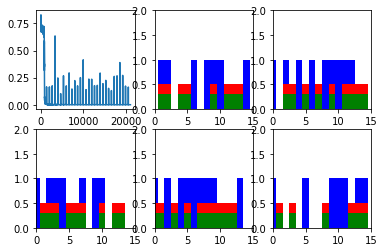

Step 600 Loss 0.000103182


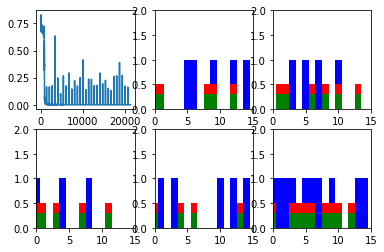

New data, epoch 32
Step 0 Loss 0.306425


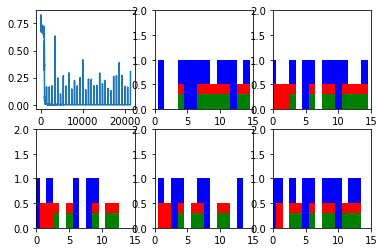

Step 100 Loss 0.000125823


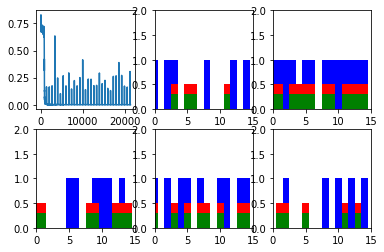

Step 200 Loss 0.000106319


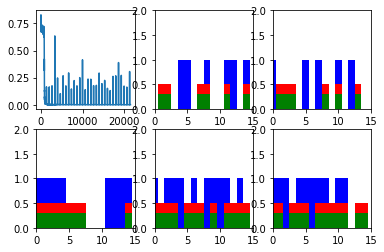

Step 300 Loss 0.000104246


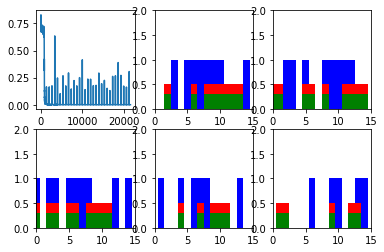

Step 400 Loss 9.86372e-05


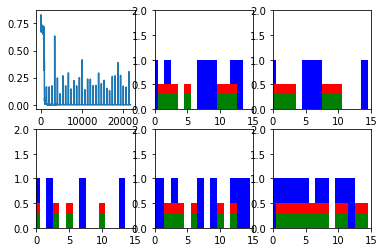

Step 500 Loss 8.95282e-05


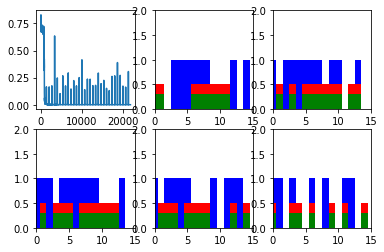

Step 600 Loss 9.52133e-05


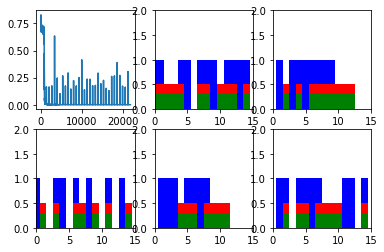

New data, epoch 33
Step 0 Loss 0.274886


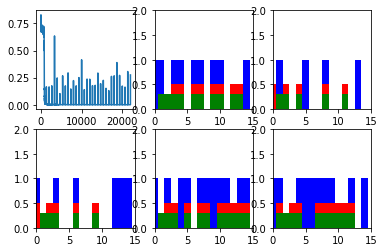

Step 100 Loss 9.95699e-05


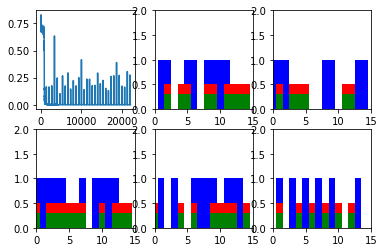

Step 200 Loss 0.000106302


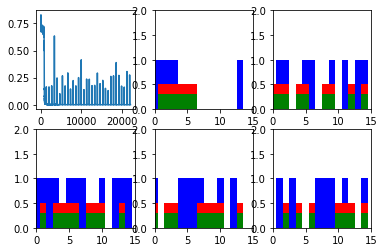

Step 300 Loss 9.408e-05


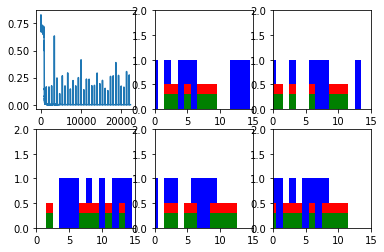

Step 400 Loss 0.000103786


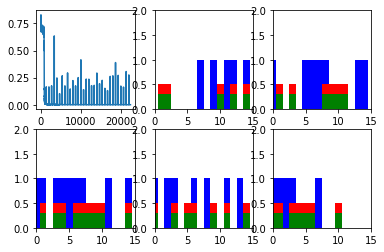

Step 500 Loss 0.000104048


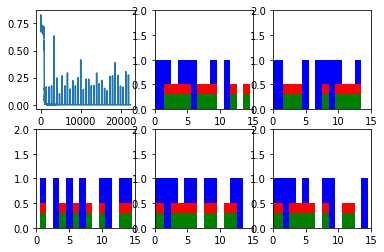

Step 600 Loss 9.3284e-05


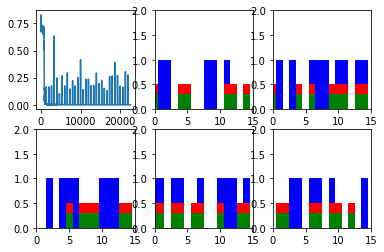

New data, epoch 34
Step 0 Loss 0.233662


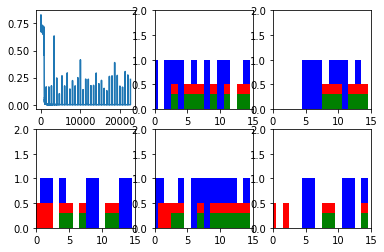

Step 100 Loss 9.71303e-05


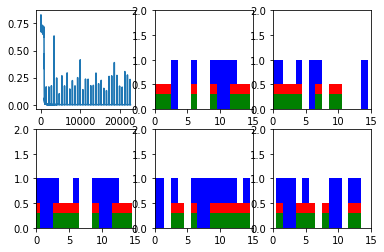

Step 200 Loss 9.64957e-05


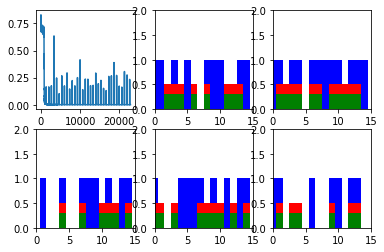

Step 300 Loss 9.09841e-05


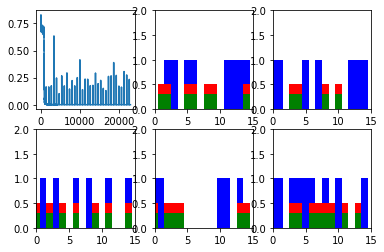

Step 400 Loss 9.71891e-05


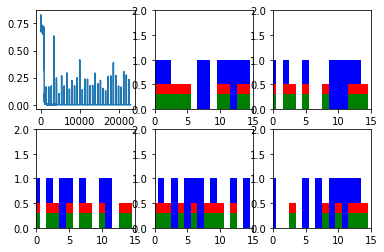

Step 500 Loss 9.05136e-05


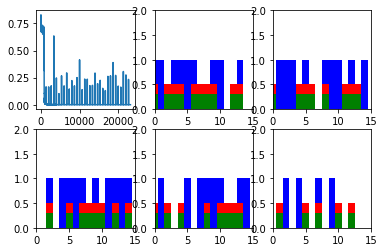

Step 600 Loss 9.27434e-05


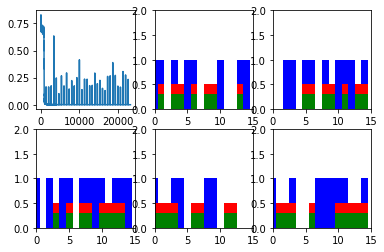

New data, epoch 35
Step 0 Loss 0.295835


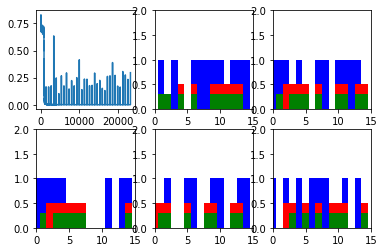

Step 100 Loss 0.000155536


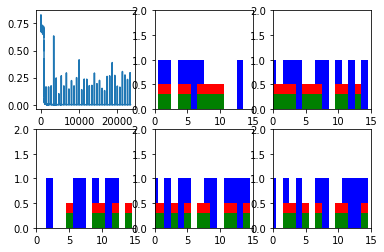

Step 200 Loss 0.000109736


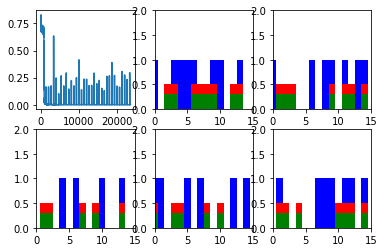

Step 300 Loss 9.54613e-05


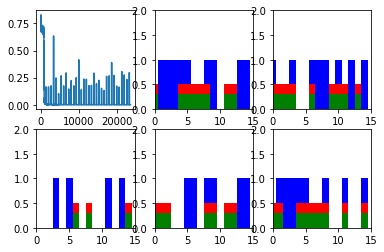

Step 400 Loss 0.000143195


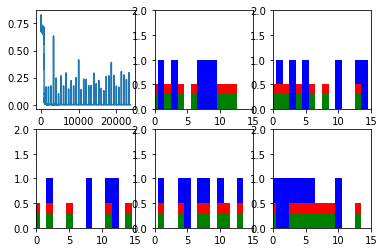

Step 500 Loss 0.000104951


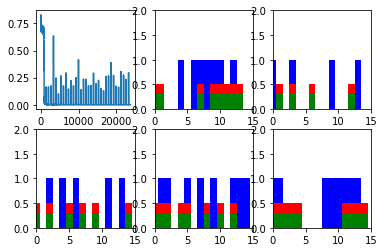

Step 600 Loss 8.834e-05


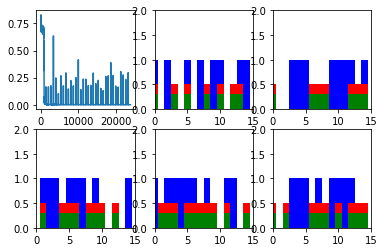

New data, epoch 36
Step 0 Loss 0.302543


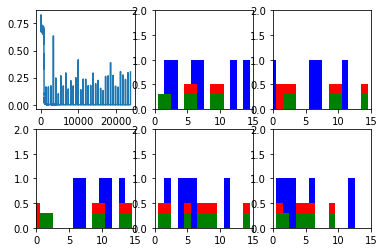

Step 100 Loss 0.00010351


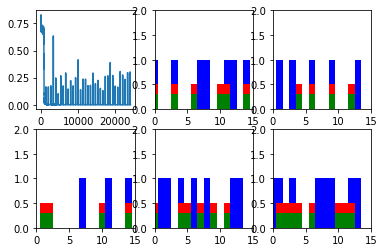

Step 200 Loss 9.82216e-05


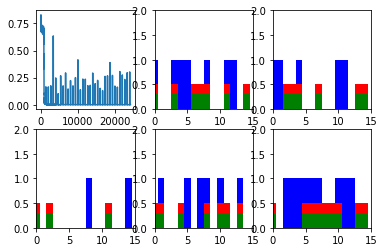

Step 300 Loss 0.000103317


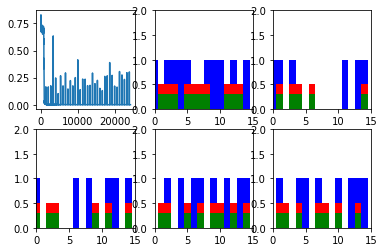

Step 400 Loss 9.38346e-05


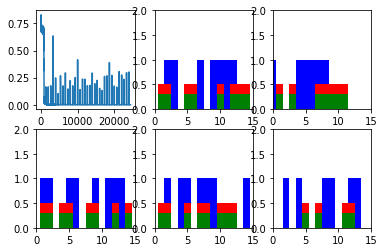

Step 500 Loss 9.41449e-05


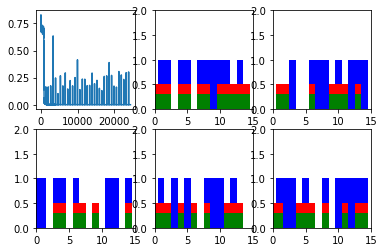

Step 600 Loss 8.22877e-05


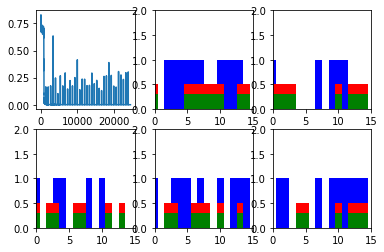

New data, epoch 37
Step 0 Loss 0.172613


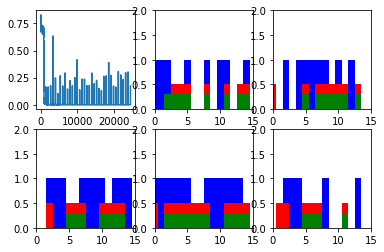

Step 100 Loss 8.88925e-05


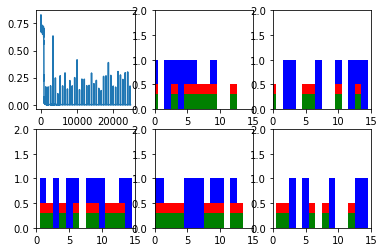

Step 200 Loss 8.8095e-05


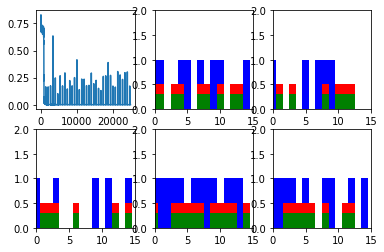

Step 300 Loss 7.39548e-05


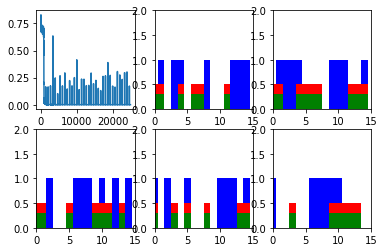

Step 400 Loss 7.799e-05


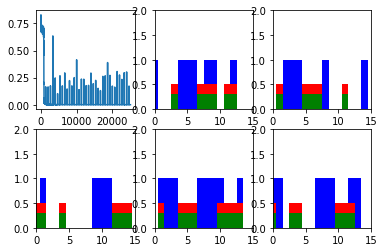

Step 500 Loss 8.01992e-05


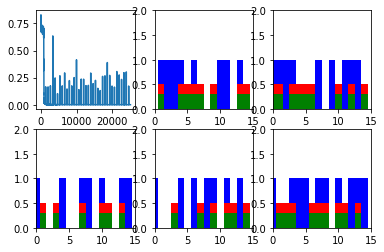

Step 600 Loss 9.71557e-05


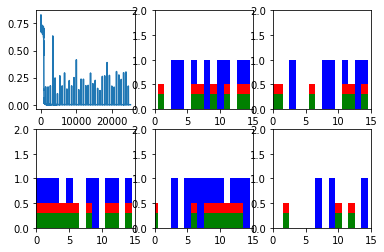

New data, epoch 38
Step 0 Loss 0.1469


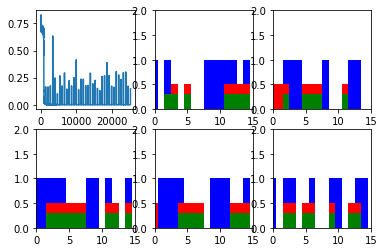

Step 100 Loss 8.28438e-05


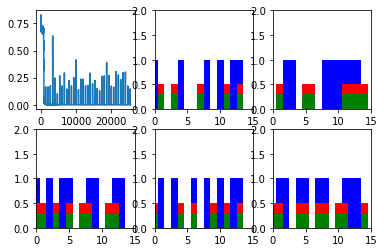

Step 200 Loss 8.62547e-05


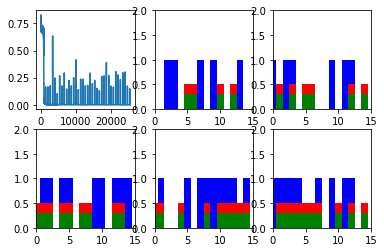

Step 300 Loss 7.72847e-05


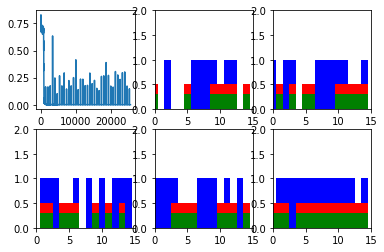

Step 400 Loss 7.6846e-05


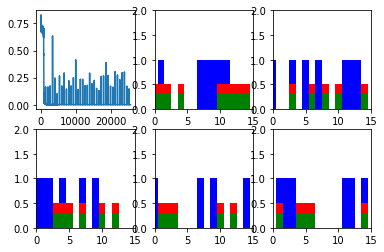

Step 500 Loss 8.58701e-05


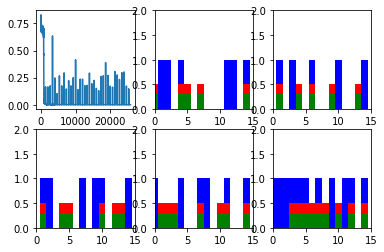

Step 600 Loss 8.90821e-05


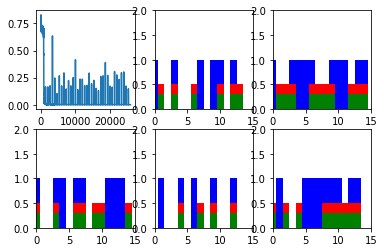

New data, epoch 39
Step 0 Loss 0.159765


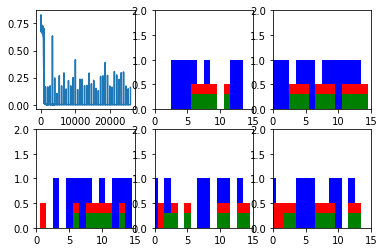

Step 100 Loss 8.5109e-05


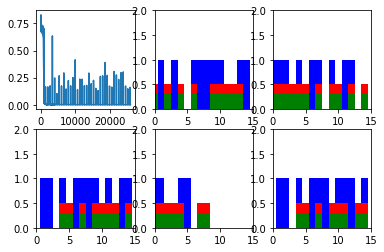

Step 200 Loss 9.02682e-05


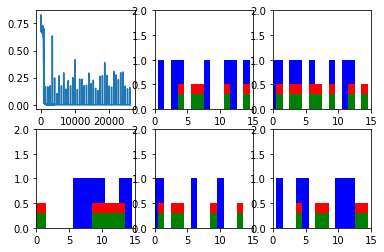

Step 300 Loss 8.71143e-05


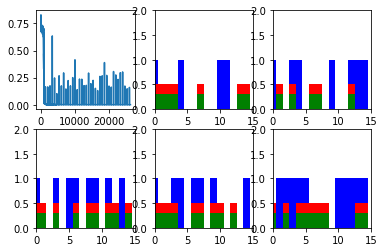

Step 400 Loss 7.58448e-05


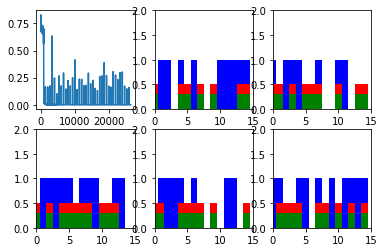

Step 500 Loss 9.58539e-05


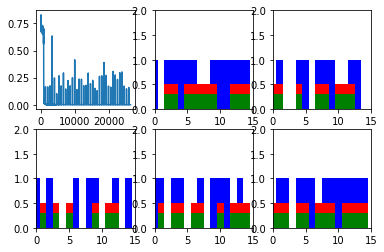

Step 600 Loss 9.59598e-05


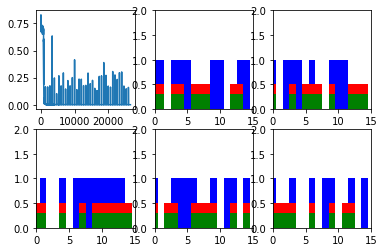

New data, epoch 40
Step 0 Loss 0.326319


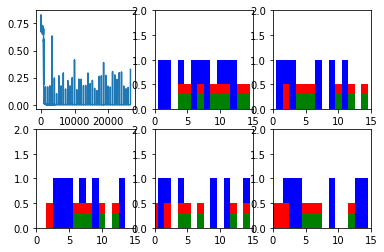

Step 100 Loss 8.2515e-05


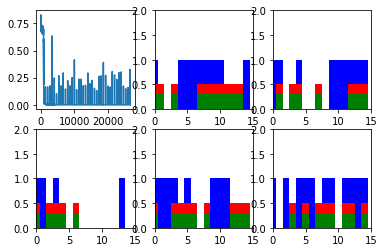

Step 200 Loss 8.63118e-05


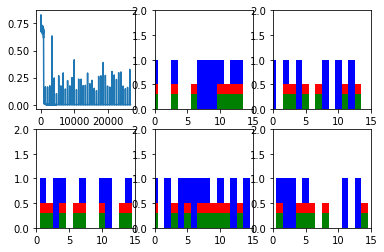

Step 300 Loss 8.23018e-05


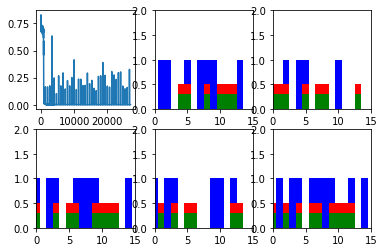

Step 400 Loss 8.43971e-05


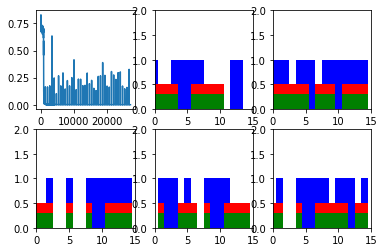

Step 500 Loss 9.08466e-05


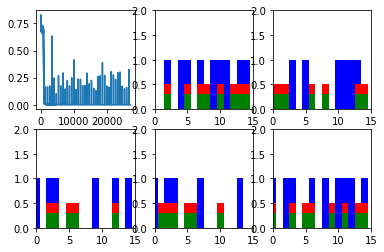

Step 600 Loss 7.49528e-05


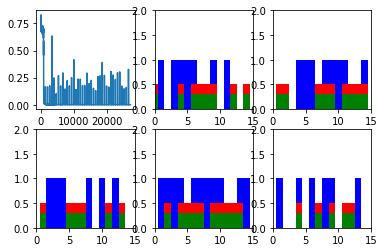

New data, epoch 41
Step 0 Loss 0.266456


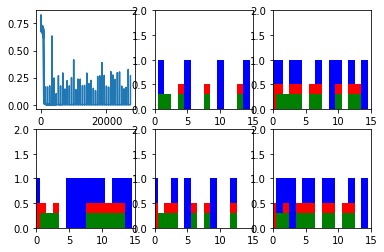

Step 100 Loss 8.34931e-05


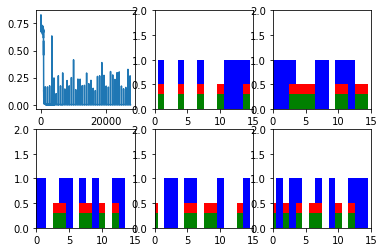

Step 200 Loss 8.54287e-05


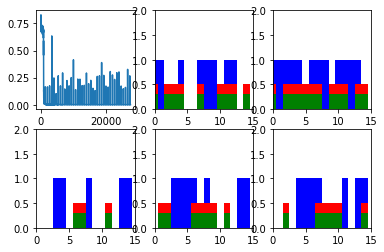

Step 300 Loss 9.0847e-05


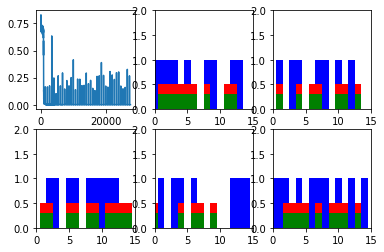

Step 400 Loss 9.38911e-05


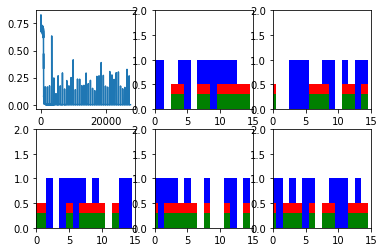

Step 500 Loss 7.5945e-05


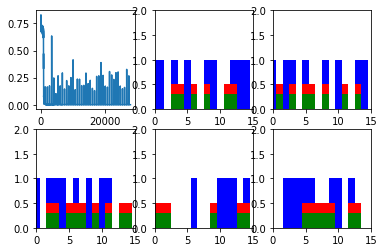

Step 600 Loss 7.83258e-05


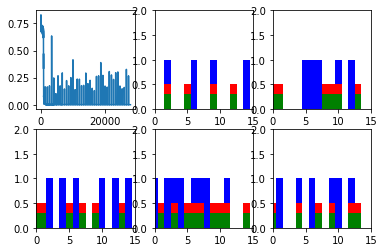

New data, epoch 42
Step 0 Loss 0.322292


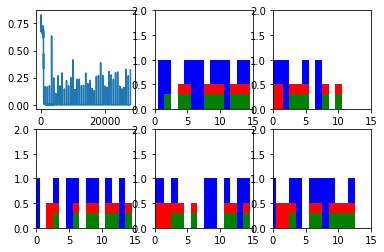

Step 100 Loss 8.42917e-05


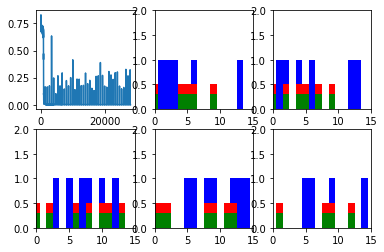

Step 200 Loss 8.12691e-05


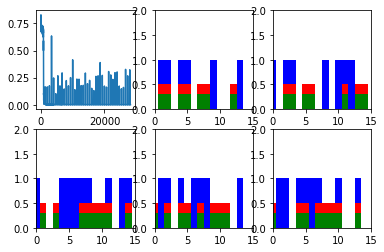

Step 300 Loss 6.54822e-05


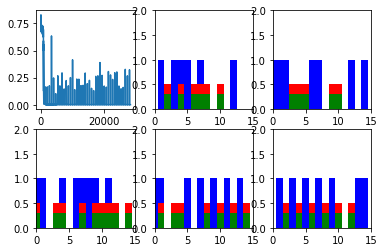

Step 400 Loss 8.26152e-05


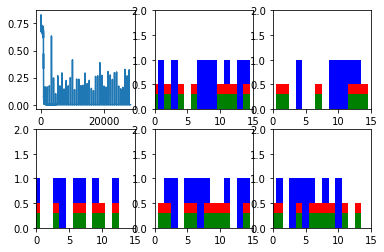

Step 500 Loss 8.43411e-05


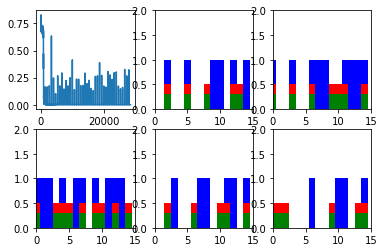

Step 600 Loss 8.66203e-05


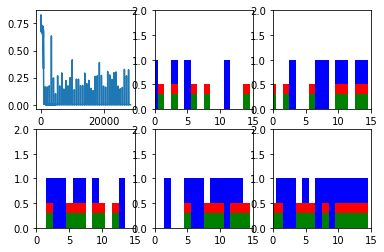

New data, epoch 43
Step 0 Loss 0.268263


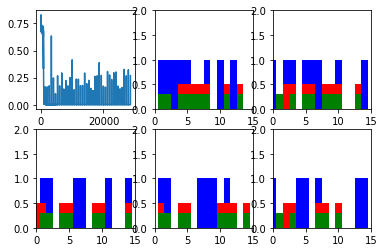

Step 100 Loss 8.21828e-05


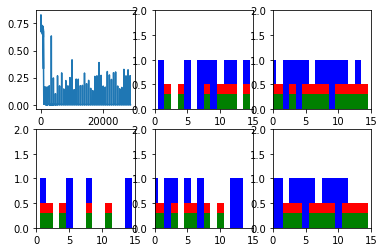

Step 200 Loss 9.10832e-05


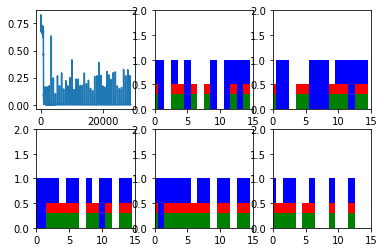

Step 300 Loss 7.40072e-05


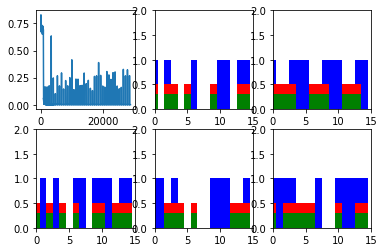

Step 400 Loss 8.21557e-05


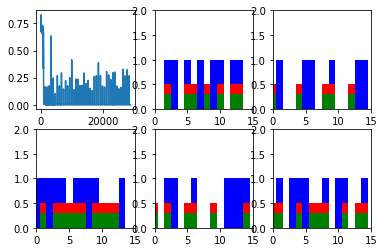

Step 500 Loss 7.98959e-05


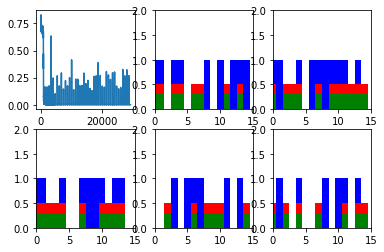

Step 600 Loss 7.97372e-05


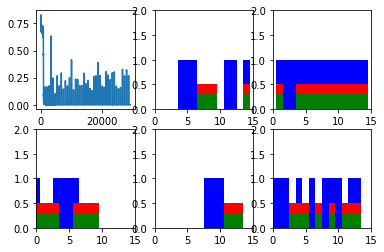

New data, epoch 44
Step 0 Loss 0.154116


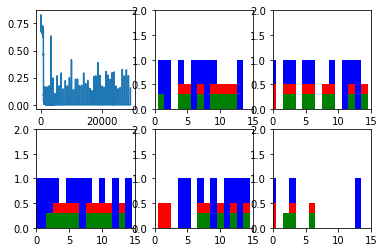

Step 100 Loss 8.44491e-05


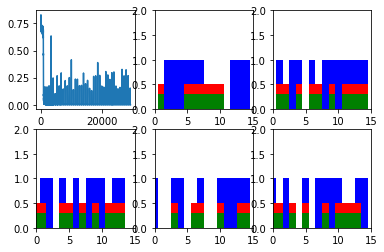

Step 200 Loss 7.62833e-05


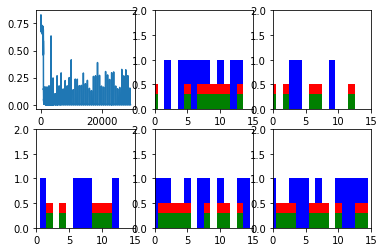

Step 300 Loss 7.307e-05


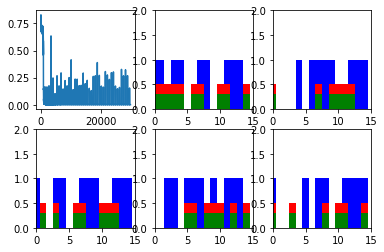

Step 400 Loss 7.94827e-05


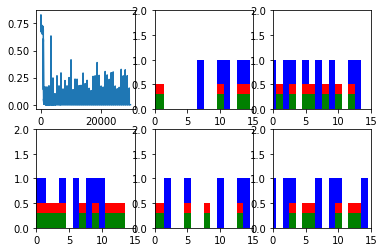

Step 500 Loss 7.27138e-05


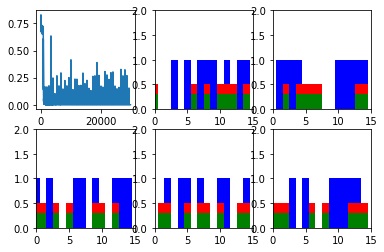

Step 600 Loss 8.11528e-05


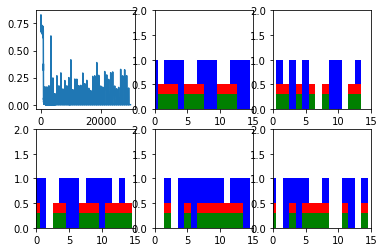

New data, epoch 45
Step 0 Loss 0.226231


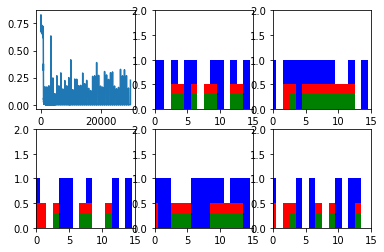

Step 100 Loss 9.382e-05


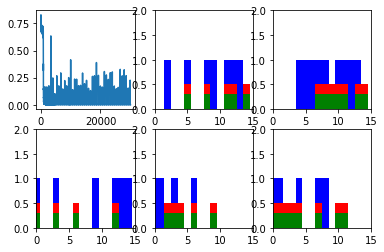

Step 200 Loss 7.78235e-05


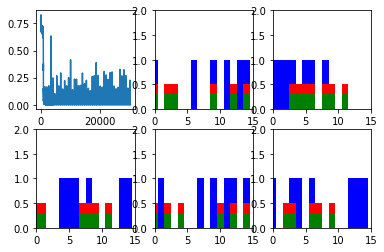

Step 300 Loss 7.56971e-05


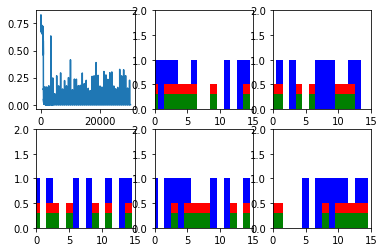

Step 400 Loss 7.44272e-05


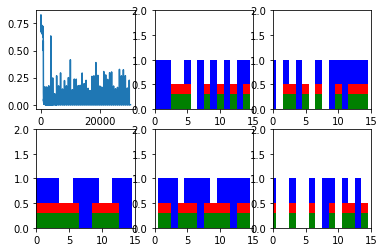

Step 500 Loss 7.59436e-05


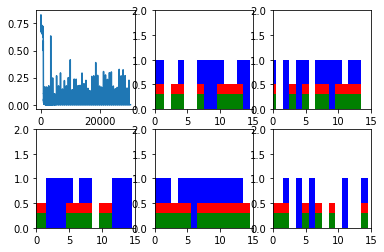

Step 600 Loss 6.61867e-05


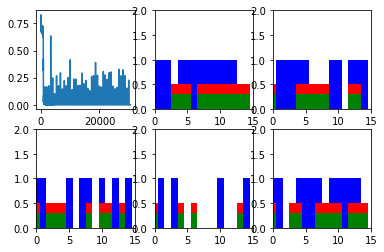

New data, epoch 46
Step 0 Loss 0.142706


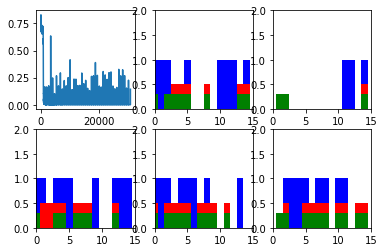

Step 100 Loss 8.26775e-05


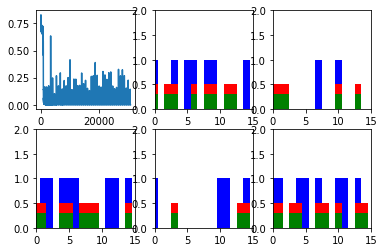

Step 200 Loss 5.75217e-05


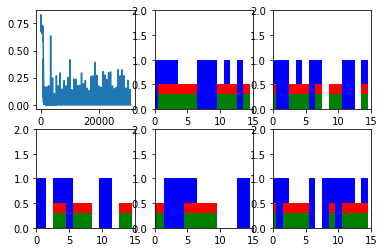

Step 300 Loss 7.31351e-05


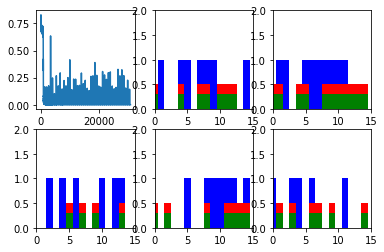

Step 400 Loss 8.04002e-05


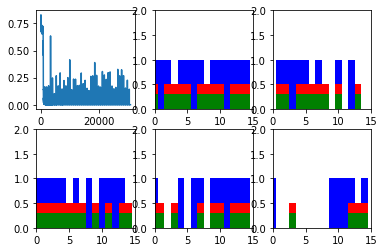

Step 500 Loss 7.10595e-05


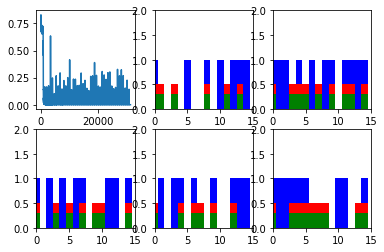

Step 600 Loss 7.59243e-05


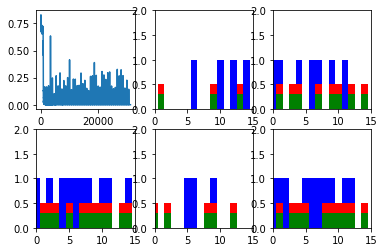

New data, epoch 47
Step 0 Loss 0.111617


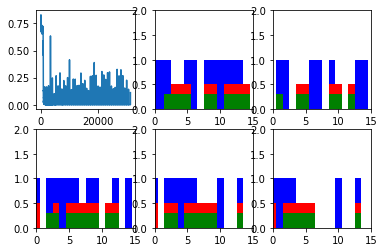

Step 100 Loss 6.84197e-05


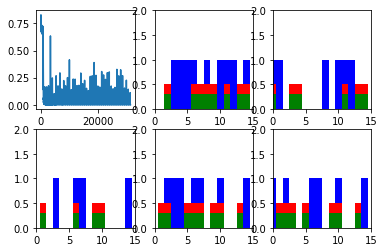

Step 200 Loss 7.41318e-05


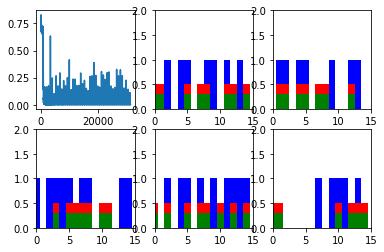

Step 300 Loss 7.10294e-05


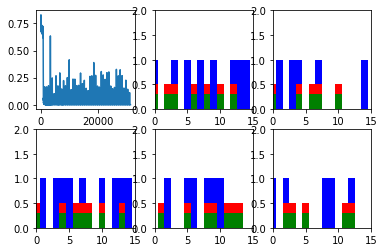

Step 400 Loss 6.65567e-05


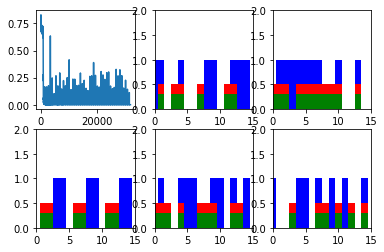

Step 500 Loss 7.52854e-05


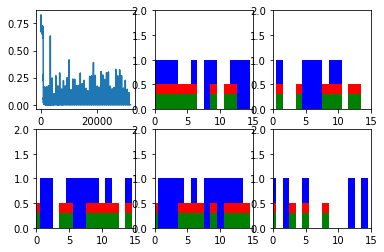

Step 600 Loss 6.40189e-05


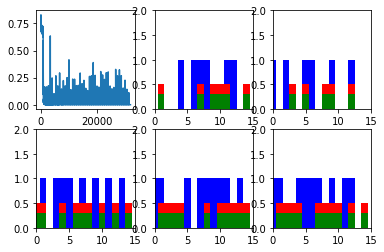

New data, epoch 48
Step 0 Loss 0.209993


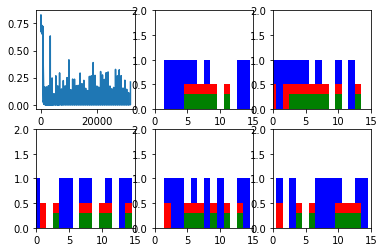

Step 100 Loss 7.07876e-05


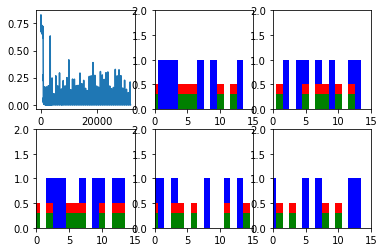

Step 200 Loss 7.17527e-05


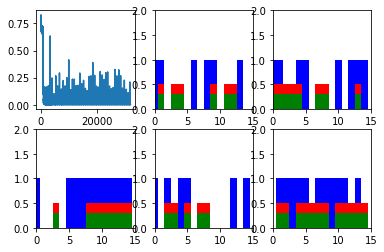

Step 300 Loss 6.93256e-05


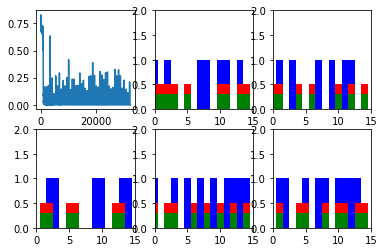

Step 400 Loss 6.84577e-05


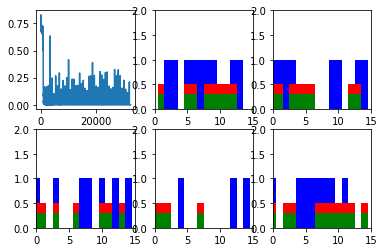

Step 500 Loss 7.09927e-05


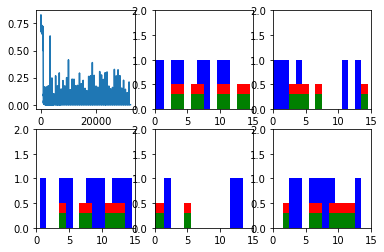

Step 600 Loss 6.0408e-05


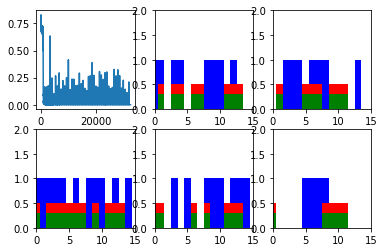

New data, epoch 49
Step 0 Loss 0.159425


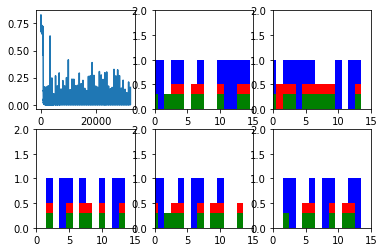

Step 100 Loss 6.85911e-05


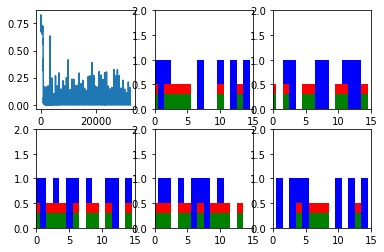

Step 200 Loss 8.03056e-05


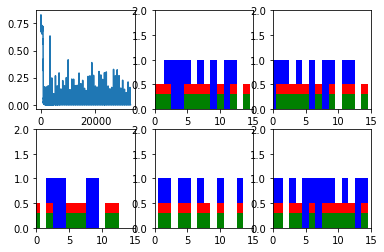

Step 300 Loss 7.32891e-05


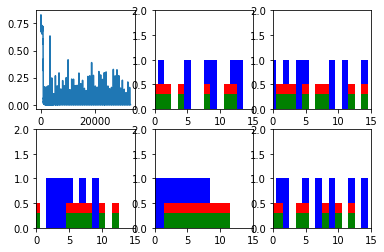

Step 400 Loss 6.59117e-05


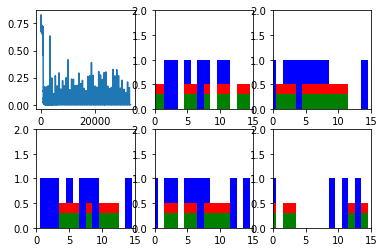

Step 500 Loss 6.71514e-05


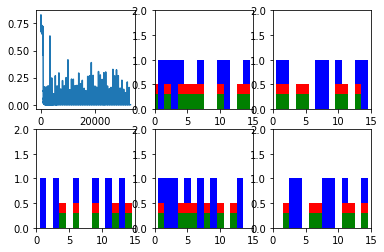

Step 600 Loss 8.76341e-05


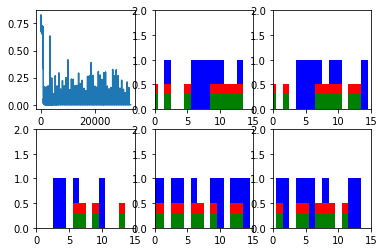

New data, epoch 50
Step 0 Loss 0.344012


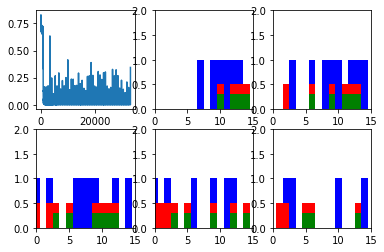

Step 100 Loss 6.28667e-05


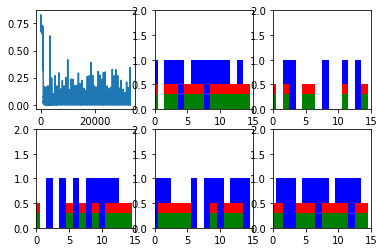

Step 200 Loss 6.42057e-05


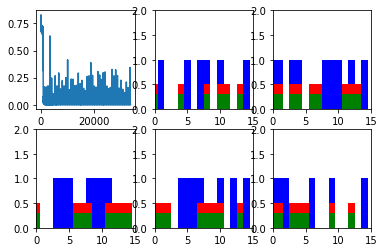

Step 300 Loss 7.36785e-05


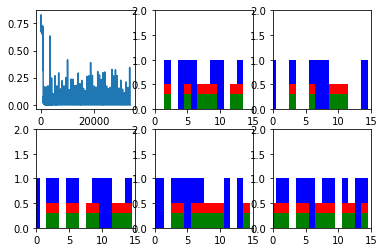

Step 400 Loss 7.19093e-05


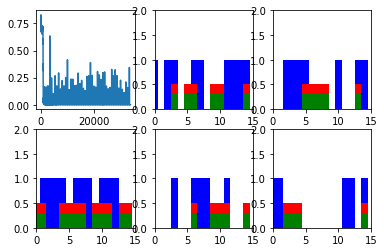

Step 500 Loss 6.59531e-05


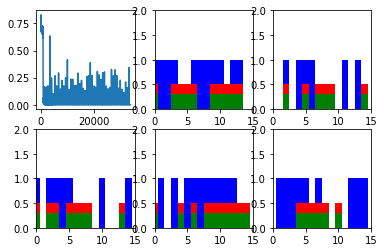

Step 600 Loss 6.73785e-05


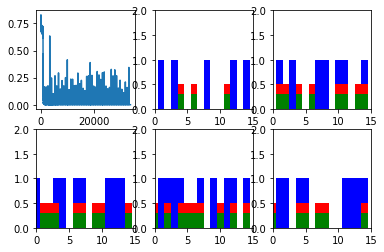

New data, epoch 51
Step 0 Loss 0.256431


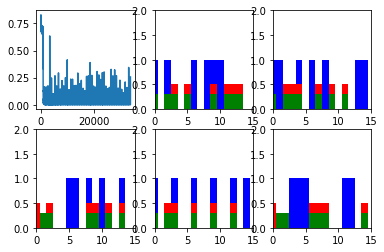

Step 100 Loss 7.00934e-05


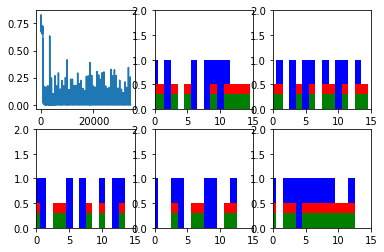

Step 200 Loss 6.73199e-05


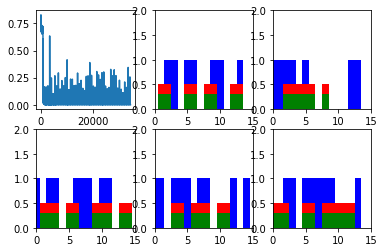

Step 300 Loss 6.29e-05


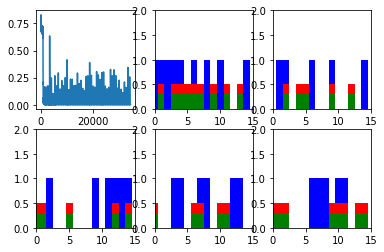

Step 400 Loss 6.80797e-05


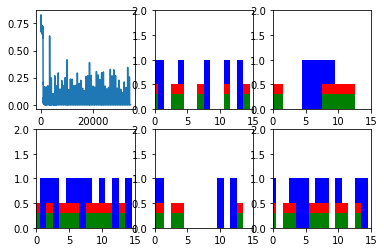

Step 500 Loss 6.30876e-05


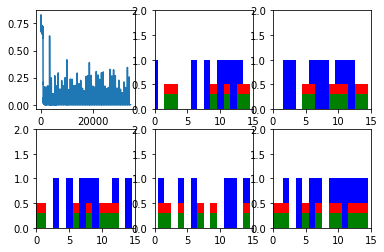

Step 600 Loss 6.85326e-05


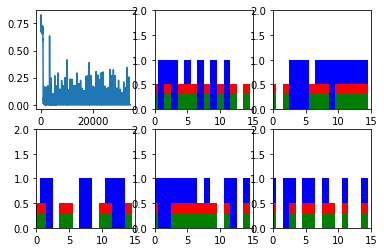

New data, epoch 52
Step 0 Loss 0.142057


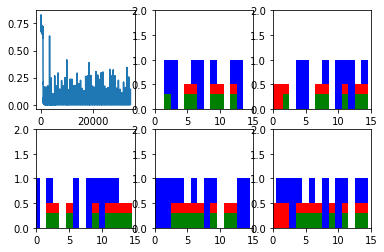

Step 100 Loss 6.58737e-05


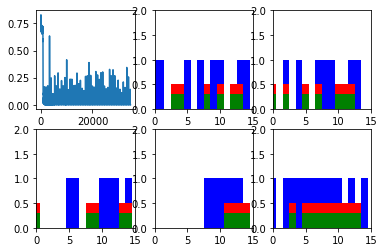

Step 200 Loss 5.25375e-05


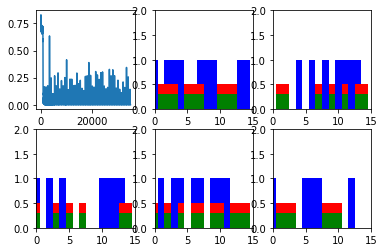

Step 300 Loss 5.99915e-05


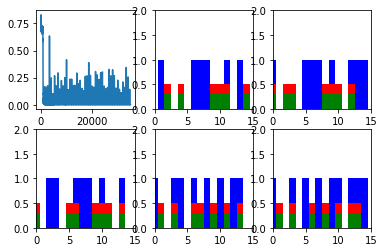

Step 400 Loss 5.98803e-05


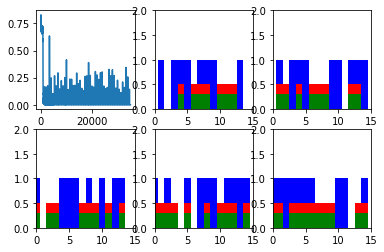

Step 500 Loss 6.86804e-05


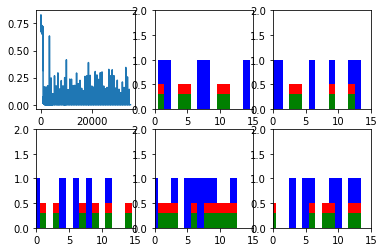

Step 600 Loss 6.50822e-05


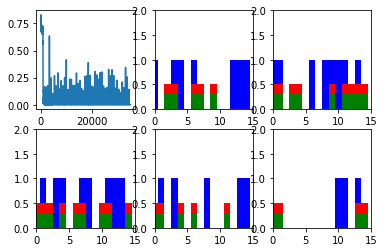

New data, epoch 53
Step 0 Loss 0.152576


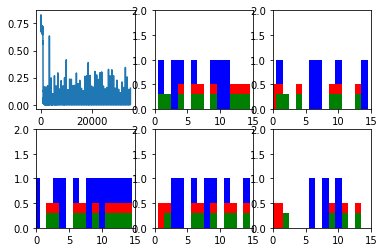

Step 100 Loss 6.20799e-05


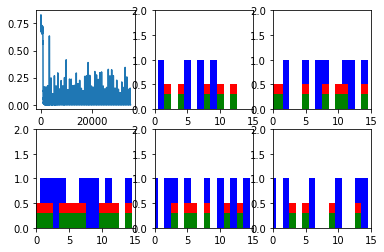

Step 200 Loss 7.29097e-05


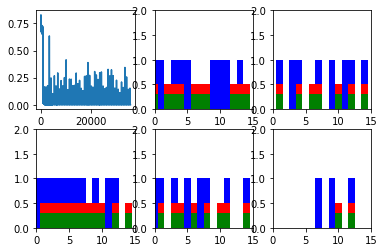

Step 300 Loss 5.99406e-05


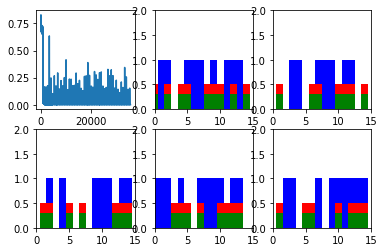

Step 400 Loss 6.52777e-05


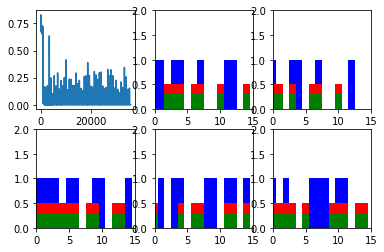

Step 500 Loss 6.15188e-05


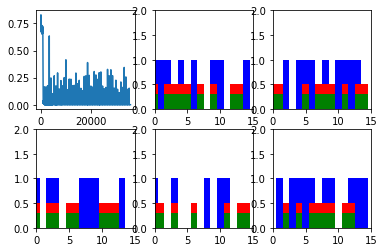

Step 600 Loss 6.46929e-05


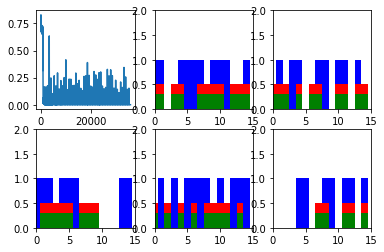

New data, epoch 54
Step 0 Loss 0.218753


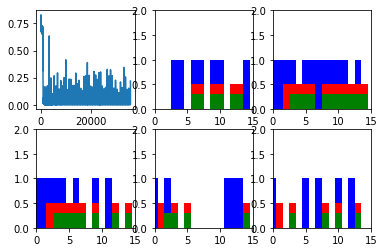

Step 100 Loss 6.7639e-05


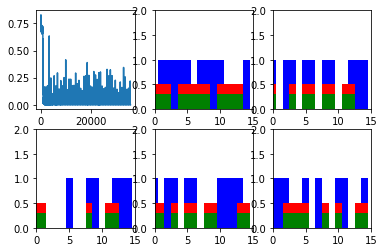

Step 200 Loss 6.06542e-05


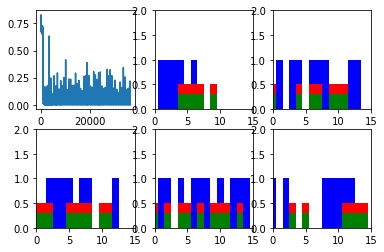

Step 300 Loss 7.02377e-05


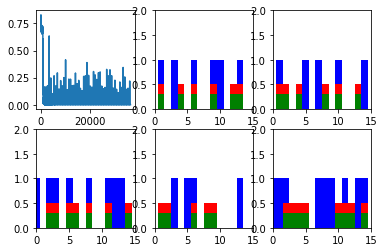

Step 400 Loss 6.37534e-05


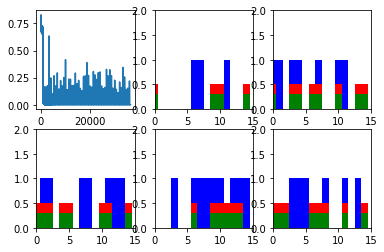

Step 500 Loss 7.21042e-05


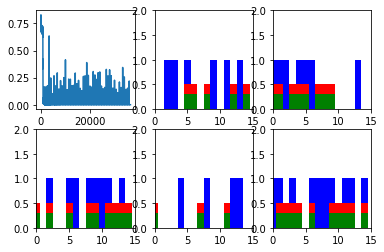

Step 600 Loss 6.73693e-05


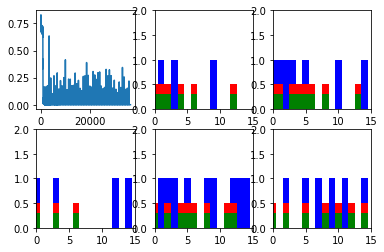

New data, epoch 55
Step 0 Loss 0.231467


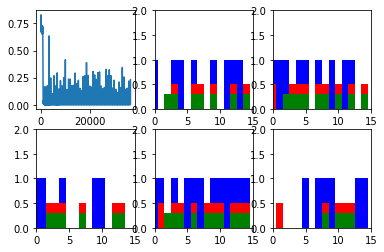

Step 100 Loss 7.05172e-05


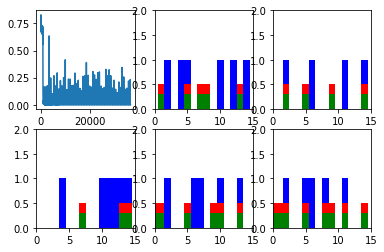

Step 200 Loss 6.19842e-05


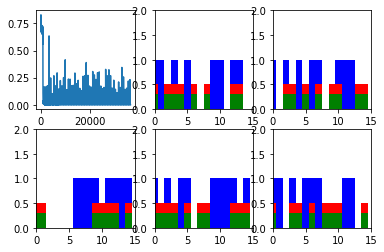

Step 300 Loss 6.43923e-05


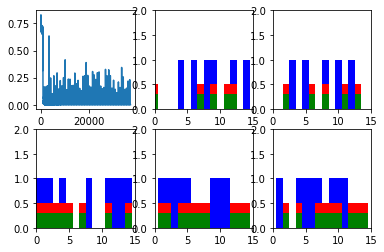

Step 400 Loss 7.36623e-05


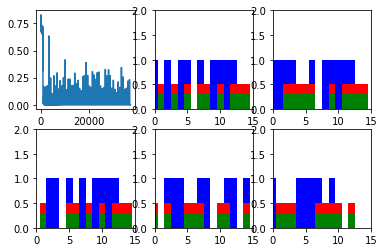

Step 500 Loss 0.000107227


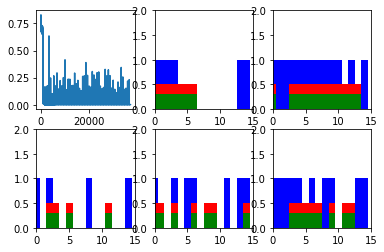

Step 600 Loss 6.74406e-05


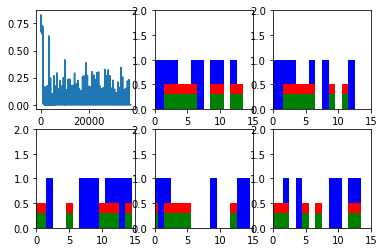

New data, epoch 56
Step 0 Loss 0.322259


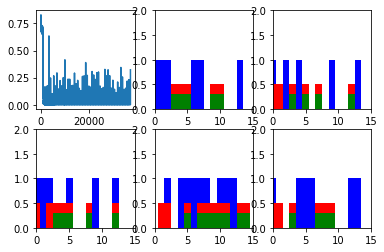

Step 100 Loss 6.38139e-05


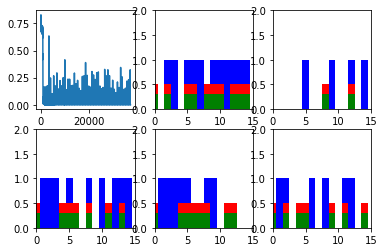

Step 200 Loss 5.67891e-05


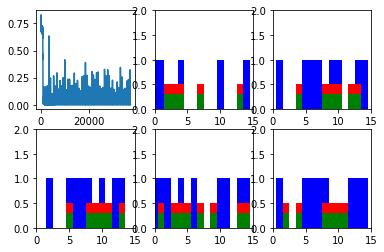

Step 300 Loss 6.94973e-05


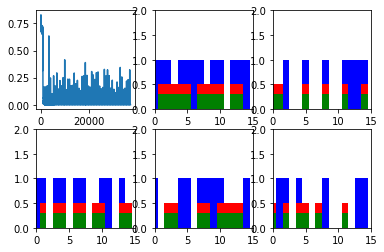

Step 400 Loss 6.31767e-05


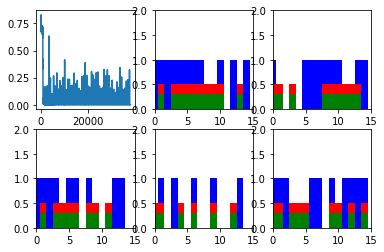

Step 500 Loss 5.75488e-05


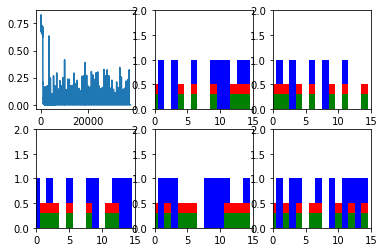

Step 600 Loss 5.32989e-05


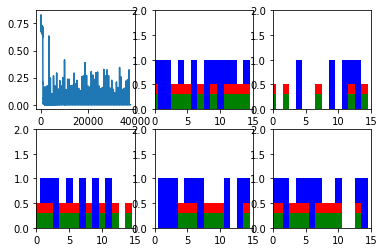

New data, epoch 57
Step 0 Loss 0.159653


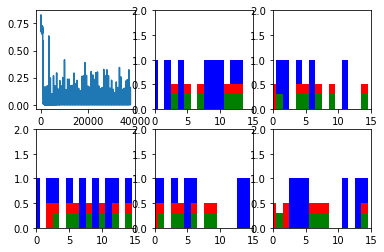

Step 100 Loss 6.8291e-05


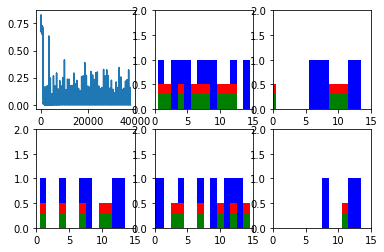

Step 200 Loss 6.08735e-05


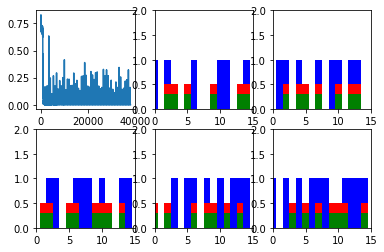

Step 300 Loss 6.10882e-05


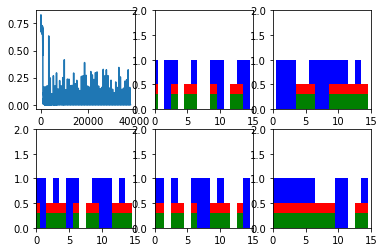

Step 400 Loss 5.85325e-05


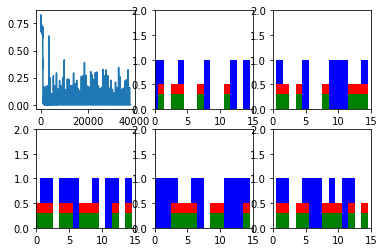

Step 500 Loss 6.67431e-05


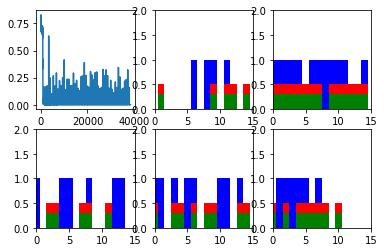

Step 600 Loss 6.15396e-05


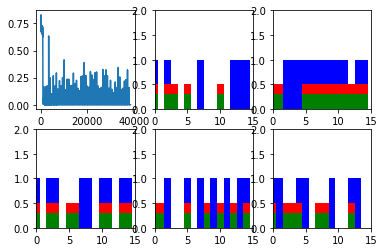

New data, epoch 58
Step 0 Loss 0.179673


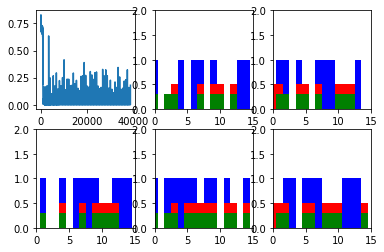

Step 100 Loss 6.80934e-05


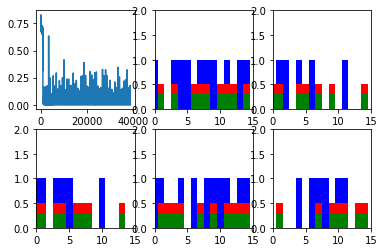

Step 200 Loss 5.32161e-05


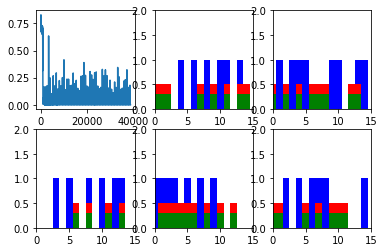

Step 300 Loss 6.22246e-05


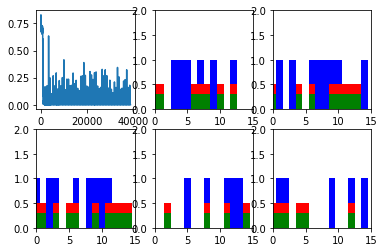

Step 400 Loss 6.42938e-05


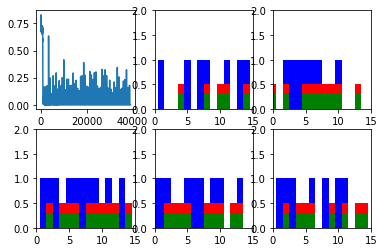

Step 500 Loss 6.6232e-05


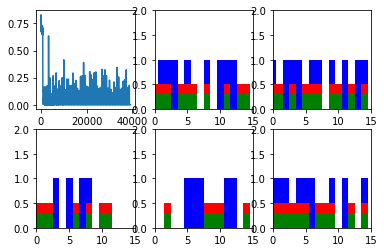

Step 600 Loss 6.39379e-05


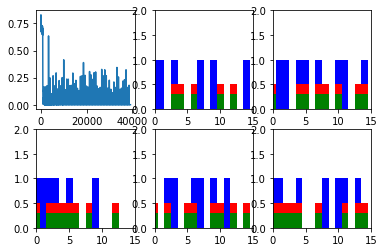

New data, epoch 59
Step 0 Loss 0.218401


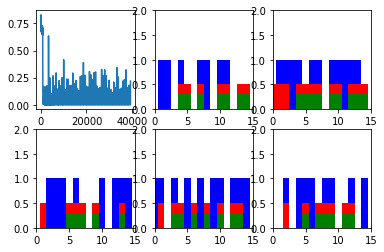

Step 100 Loss 5.8949e-05


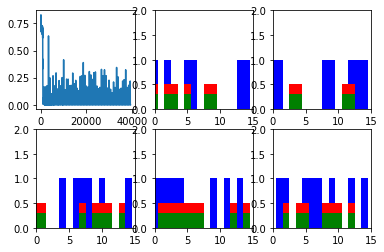

Step 200 Loss 6.12933e-05


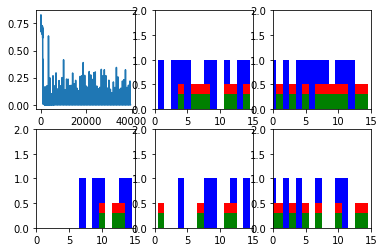

Step 300 Loss 5.64649e-05


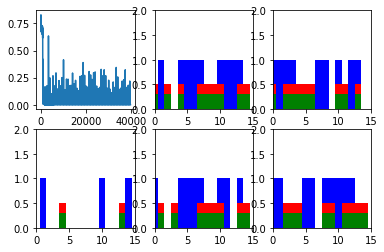

Step 400 Loss 5.33975e-05


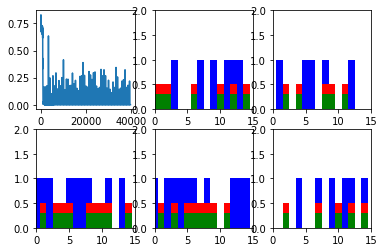

Step 500 Loss 6.45372e-05


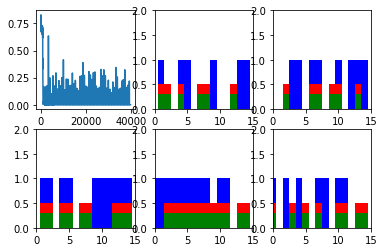

Step 600 Loss 5.821e-05


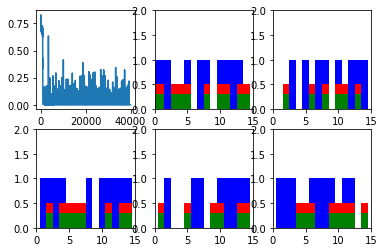

New data, epoch 60
Step 0 Loss 0.175782


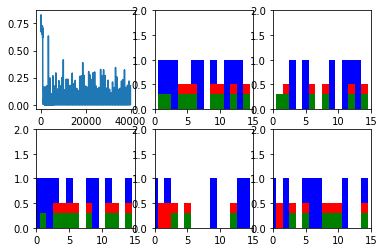

Step 100 Loss 5.93812e-05


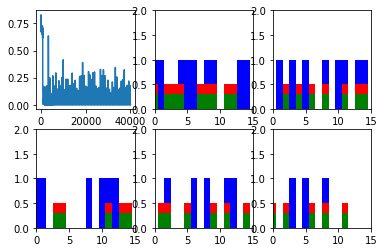

Step 200 Loss 5.63997e-05


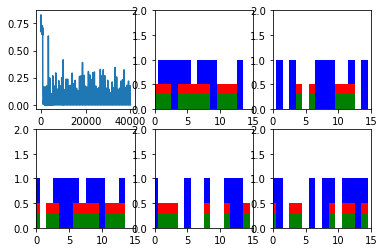

Step 300 Loss 5.82911e-05


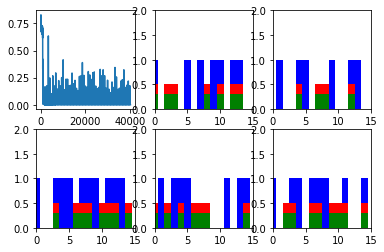

Step 400 Loss 5.46292e-05


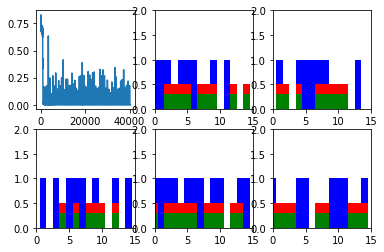

Step 500 Loss 5.54398e-05


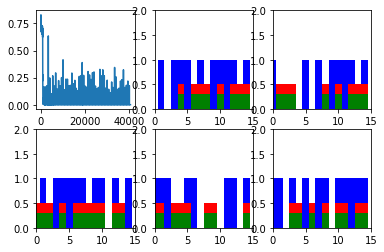

Step 600 Loss 5.43018e-05


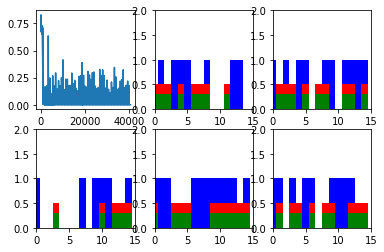

New data, epoch 61
Step 0 Loss 0.162712


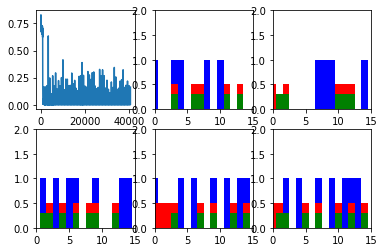

Step 100 Loss 5.32337e-05


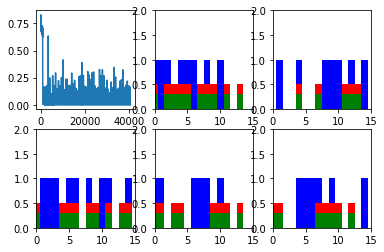

Step 200 Loss 5.67096e-05


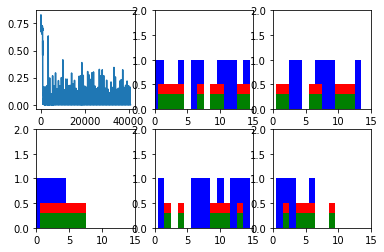

Step 300 Loss 6.26969e-05


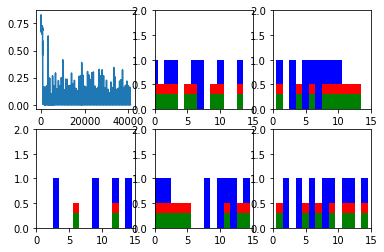

Step 400 Loss 5.94751e-05


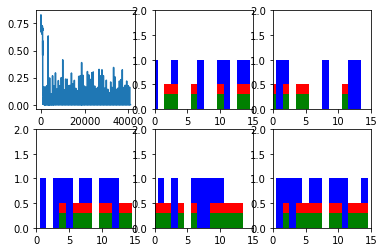

Step 500 Loss 6.03632e-05


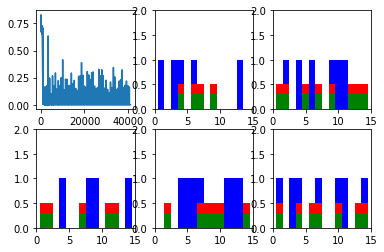

Step 600 Loss 6.1403e-05


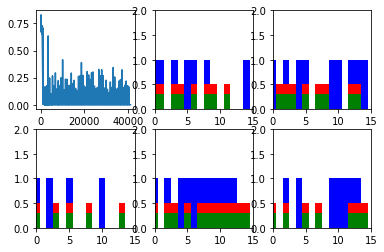

New data, epoch 62
Step 0 Loss 0.1411


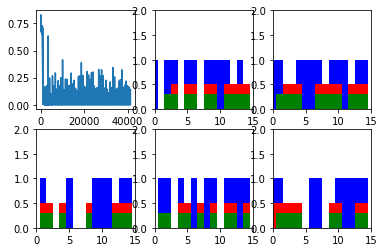

Step 100 Loss 5.92494e-05


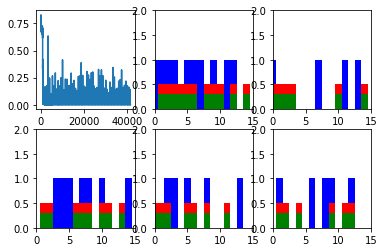

Step 200 Loss 5.16698e-05


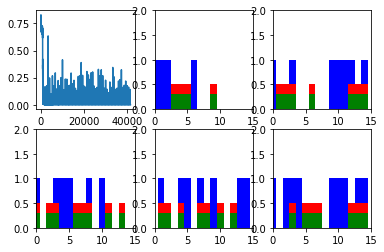

Step 300 Loss 5.57845e-05


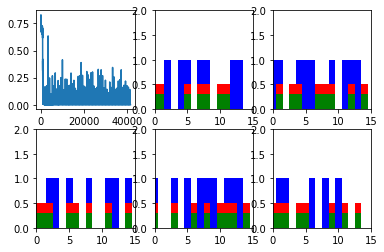

Step 400 Loss 5.68607e-05


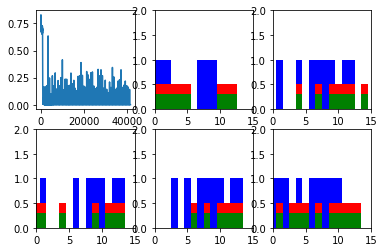

Step 500 Loss 5.43224e-05


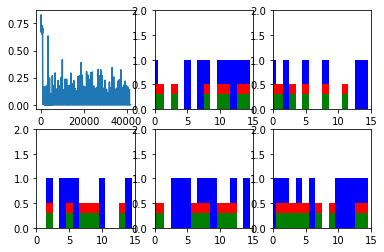

Step 600 Loss 4.98388e-05


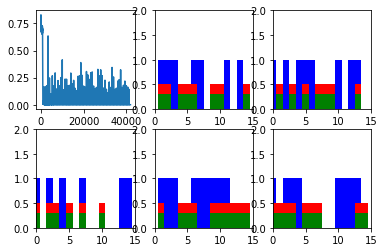

New data, epoch 63
Step 0 Loss 0.134457


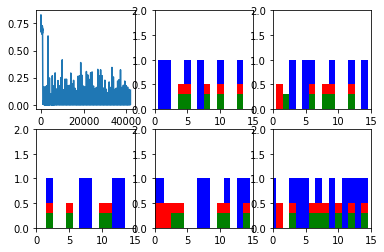

Step 100 Loss 5.3337e-05


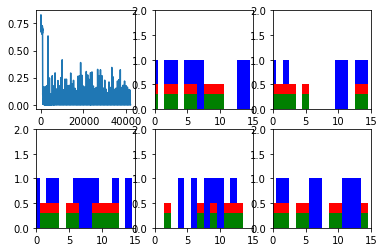

Step 200 Loss 5.51076e-05


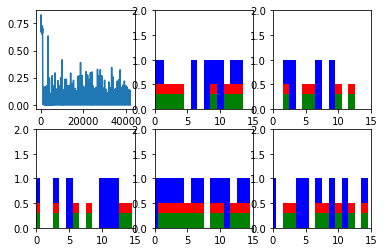

Step 300 Loss 5.55033e-05


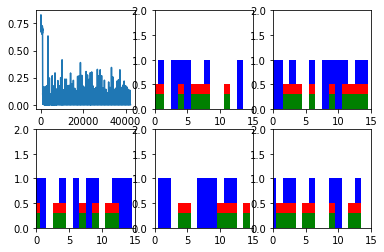

Step 400 Loss 5.4777e-05


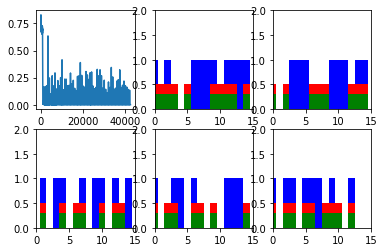

Step 500 Loss 5.13567e-05


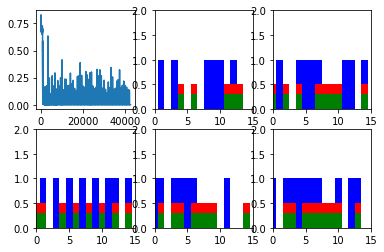

Step 600 Loss 4.6533e-05


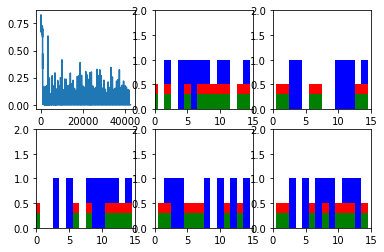

New data, epoch 64
Step 0 Loss 0.134439


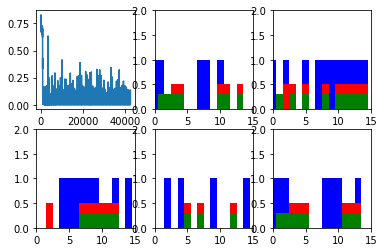

Step 100 Loss 5.01011e-05


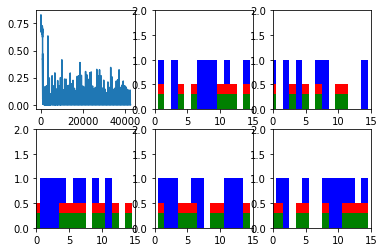

Step 200 Loss 5.70495e-05


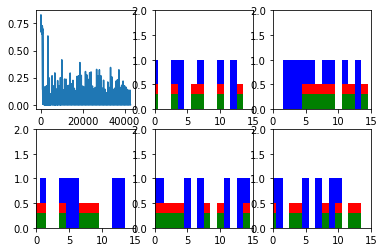

Step 300 Loss 5.51553e-05


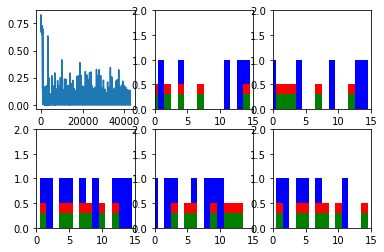

Step 400 Loss 5.60403e-05


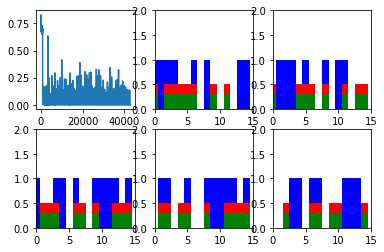

Step 500 Loss 4.97482e-05


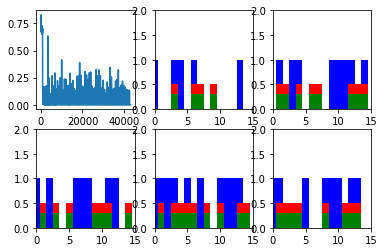

Step 600 Loss 5.49661e-05


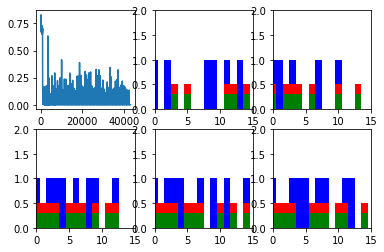

New data, epoch 65
Step 0 Loss 0.163045


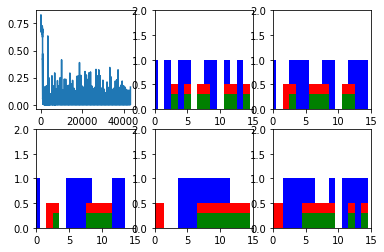

Step 100 Loss 5.88537e-05


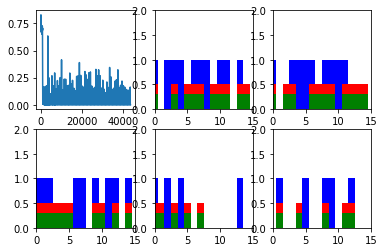

Step 200 Loss 5.37311e-05


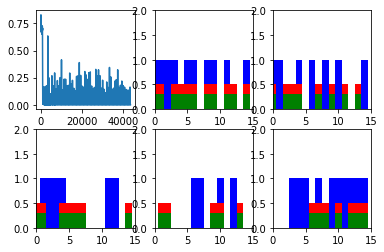

Step 300 Loss 5.56829e-05


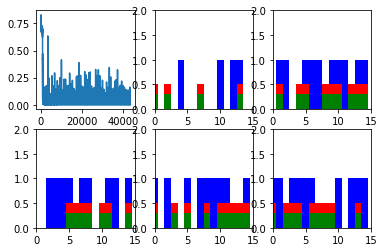

Step 400 Loss 6.11819e-05


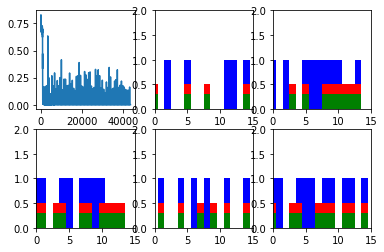

Step 500 Loss 5.23515e-05


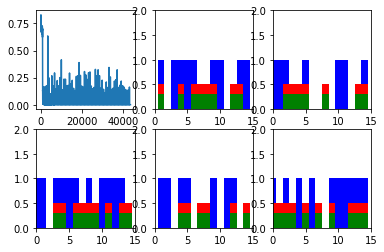

Step 600 Loss 5.28425e-05


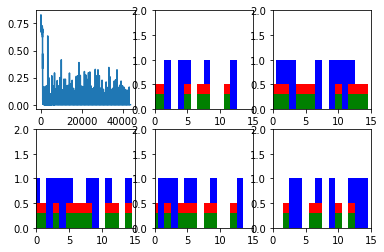

New data, epoch 66
Step 0 Loss 0.176392


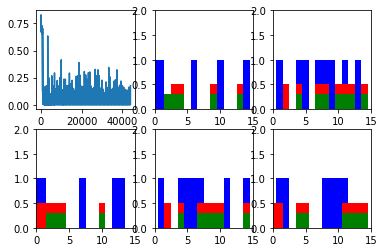

Step 100 Loss 5.82958e-05


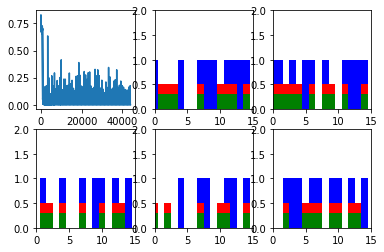

Step 200 Loss 5.51837e-05


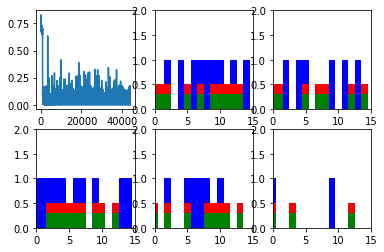

Step 300 Loss 5.3151e-05


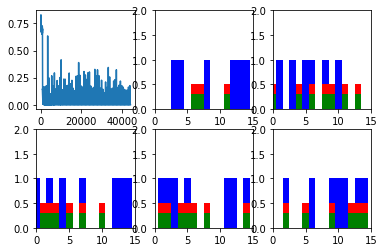

Step 400 Loss 6.70757e-05


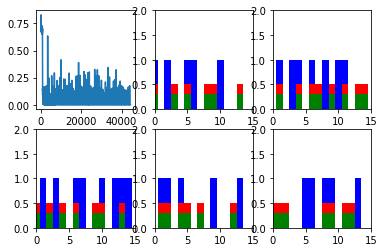

Step 500 Loss 4.63995e-05


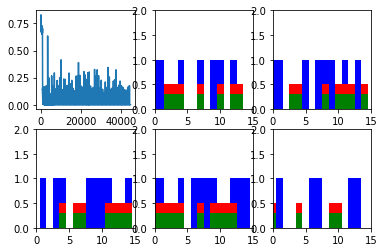

Step 600 Loss 5.31319e-05


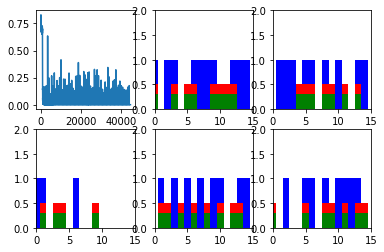

New data, epoch 67
Step 0 Loss 0.21962


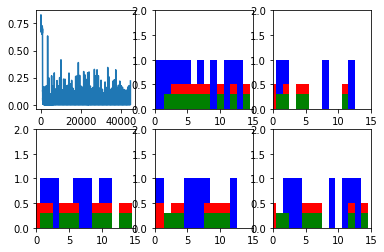

Step 100 Loss 5.57115e-05


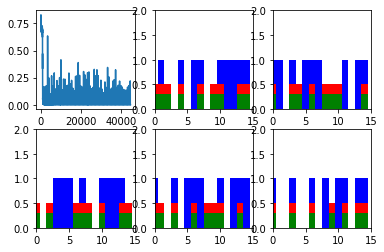

Step 200 Loss 4.82575e-05


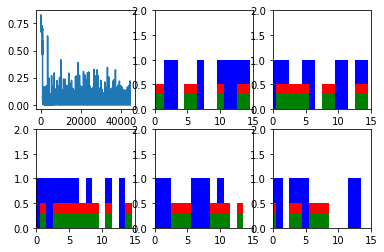

Step 300 Loss 5.77869e-05


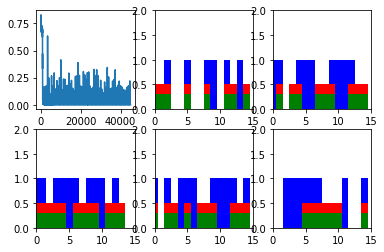

Step 400 Loss 5.074e-05


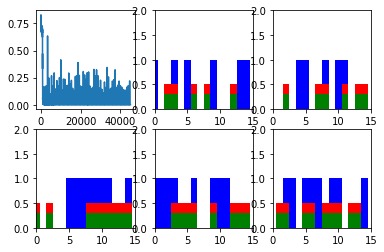

Step 500 Loss 5.49408e-05


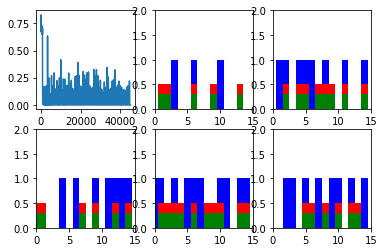

Step 600 Loss 4.88629e-05


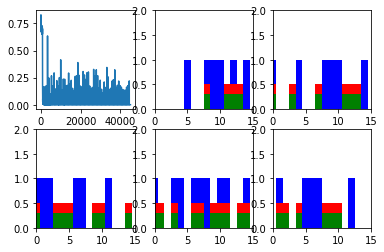

New data, epoch 68
Step 0 Loss 0.223069


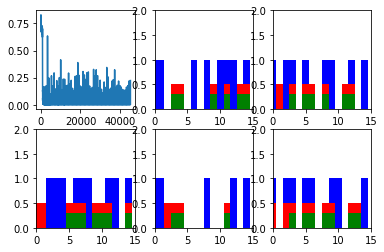

Step 100 Loss 4.91871e-05


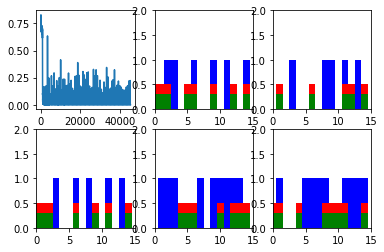

Step 200 Loss 5.0969e-05


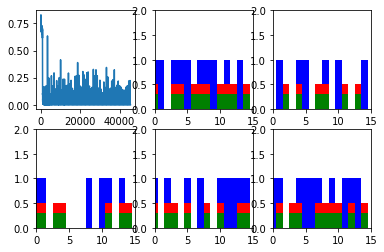

Step 300 Loss 4.6517e-05


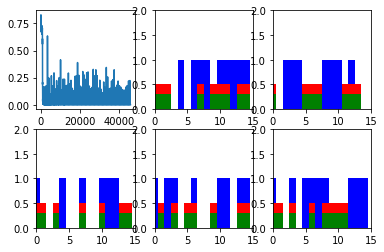

Step 400 Loss 4.65139e-05


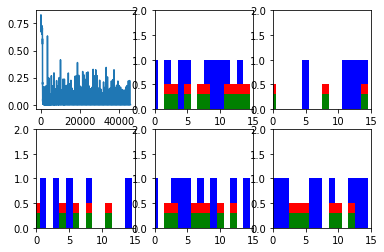

Step 500 Loss 4.90584e-05


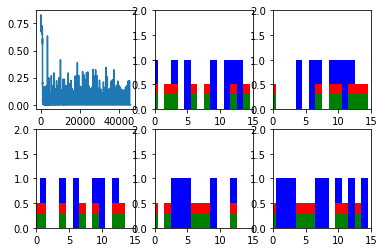

Step 600 Loss 4.83942e-05


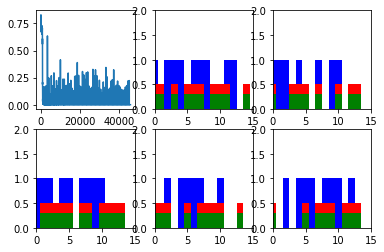

New data, epoch 69
Step 0 Loss 0.14717


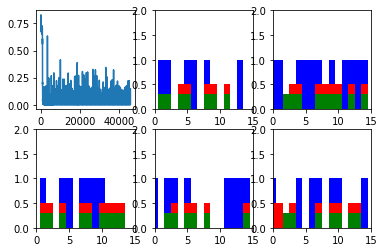

Step 100 Loss 6.56853e-05


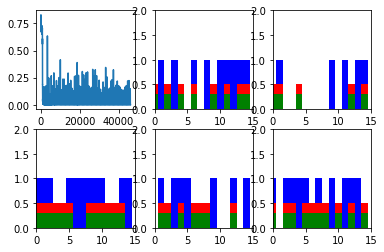

Step 200 Loss 5.06414e-05


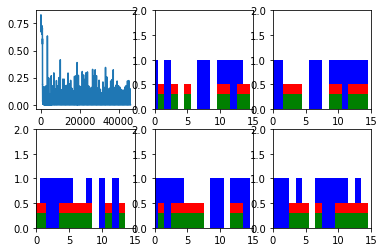

Step 300 Loss 5.54458e-05


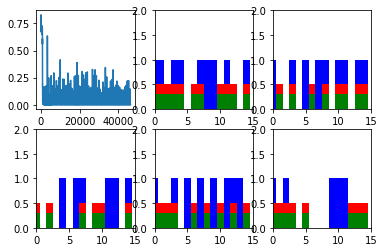

Step 400 Loss 5.74563e-05


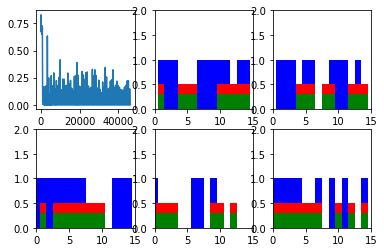

Step 500 Loss 5.82749e-05


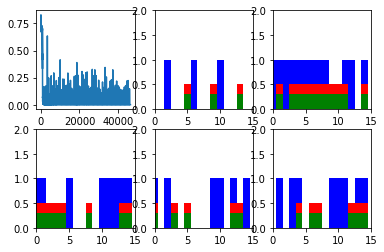

Step 600 Loss 5.91551e-05


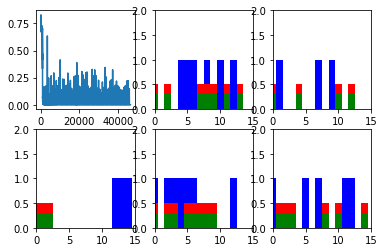

New data, epoch 70
Step 0 Loss 0.175171


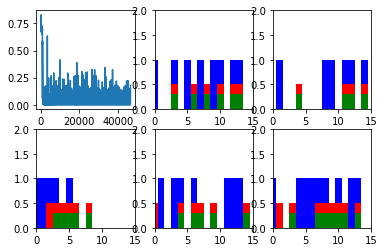

Step 100 Loss 5.04602e-05


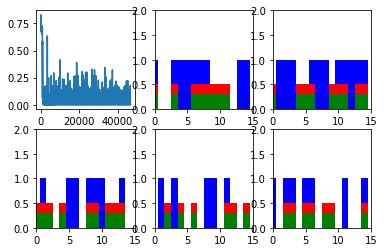

Step 200 Loss 5.17285e-05


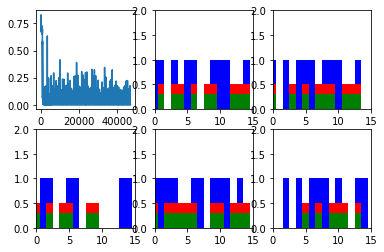

Step 300 Loss 5.47293e-05


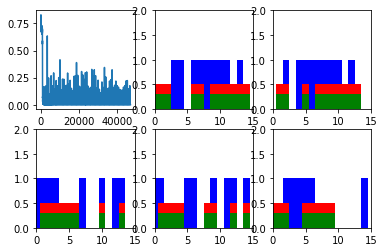

Step 400 Loss 4.9165e-05


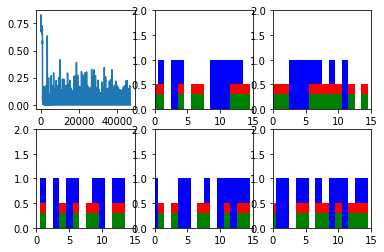

Step 500 Loss 4.52807e-05


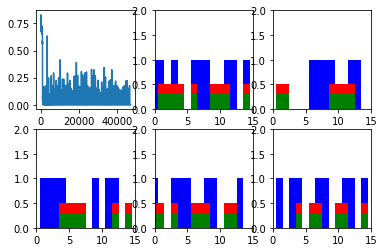

Step 600 Loss 5.01186e-05


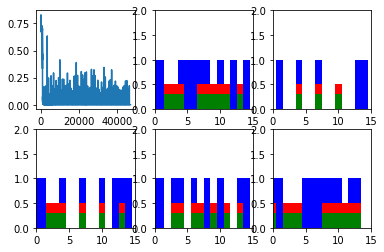

New data, epoch 71
Step 0 Loss 0.221079


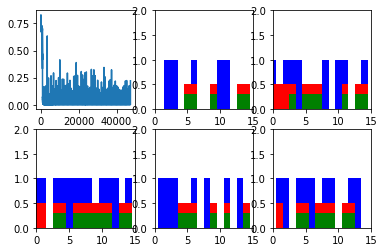

Step 100 Loss 4.46354e-05


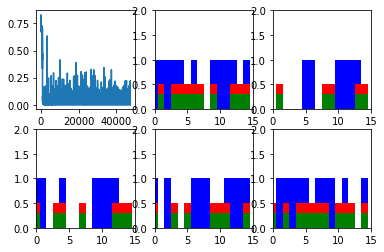

Step 200 Loss 4.75661e-05


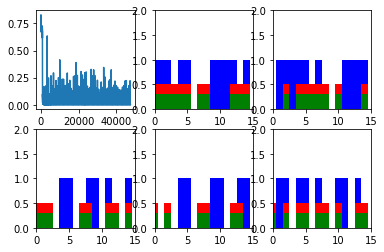

Step 300 Loss 4.89886e-05


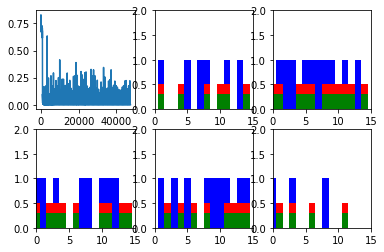

Step 400 Loss 4.99136e-05


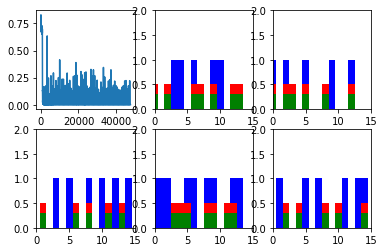

Step 500 Loss 5.30653e-05


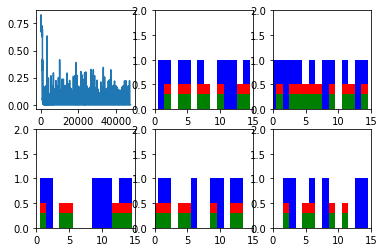

Step 600 Loss 4.99898e-05


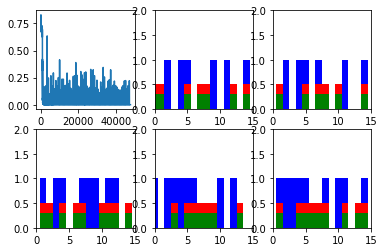

New data, epoch 72
Step 0 Loss 0.153367


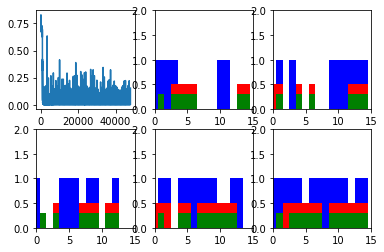

Step 100 Loss 4.78521e-05


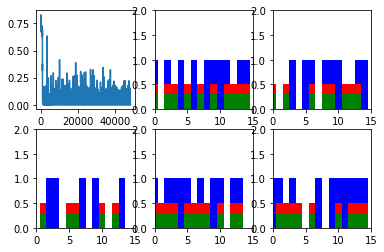

Step 200 Loss 5.48548e-05


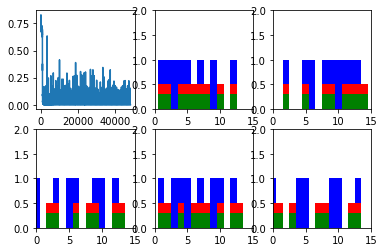

Step 300 Loss 4.18365e-05


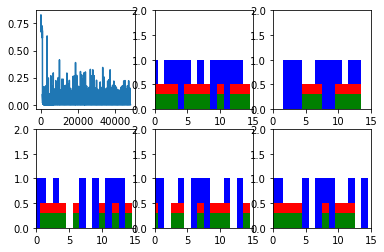

Step 400 Loss 4.71672e-05


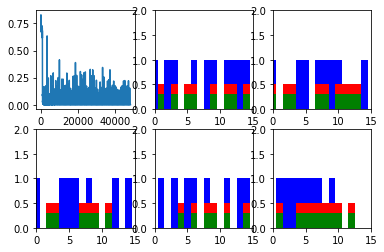

Step 500 Loss 4.80206e-05


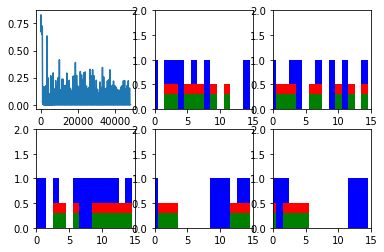

Step 600 Loss 4.74215e-05


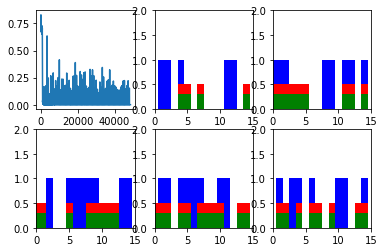

New data, epoch 73
Step 0 Loss 0.169932


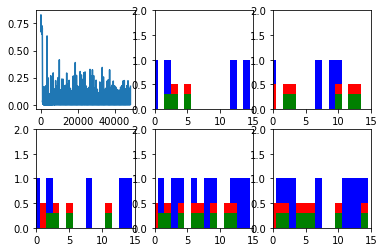

Step 100 Loss 4.793e-05


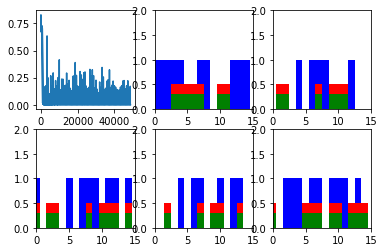

Step 200 Loss 6.23016e-05


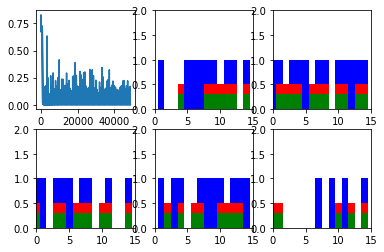

Step 300 Loss 4.7412e-05


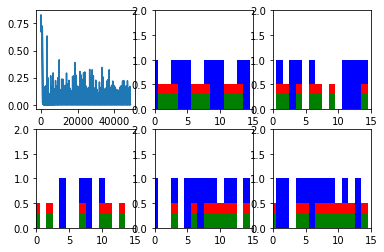

Step 400 Loss 4.29076e-05


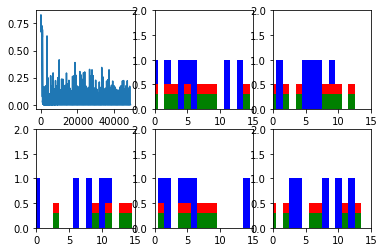

Step 500 Loss 5.51786e-05


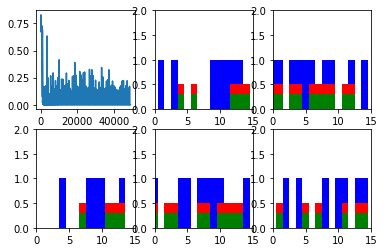

Step 600 Loss 4.80382e-05


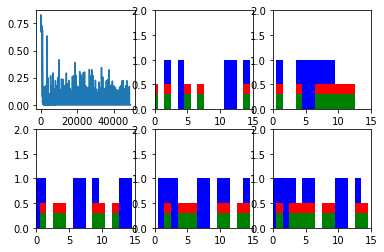

New data, epoch 74
Step 0 Loss 0.190901


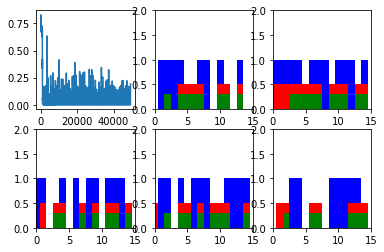

Step 100 Loss 5.47612e-05


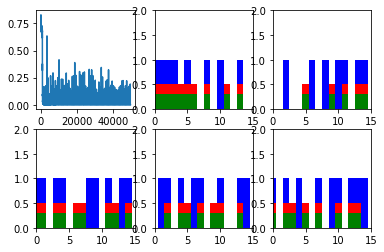

Step 200 Loss 4.39599e-05


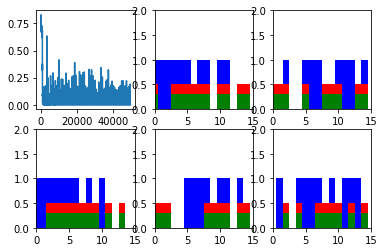

Step 300 Loss 5.11375e-05


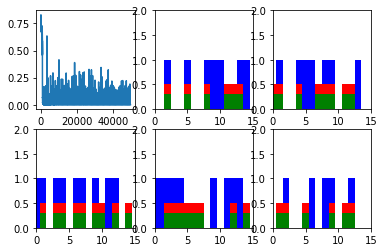

Step 400 Loss 5.17795e-05


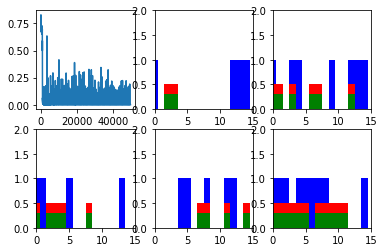

Step 500 Loss 3.90232e-05


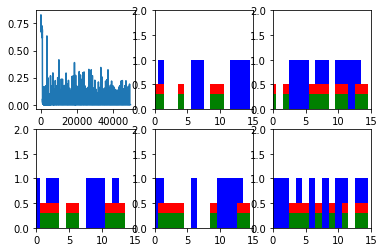

Step 600 Loss 4.08891e-05


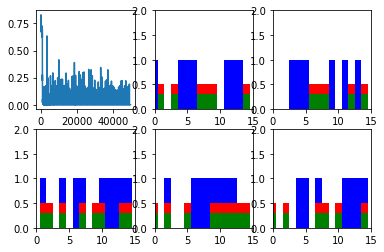

New data, epoch 75
Step 0 Loss 0.154971


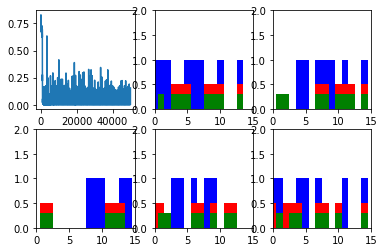

Step 100 Loss 4.29458e-05


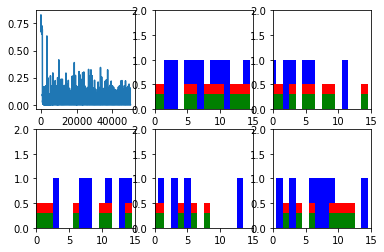

Step 200 Loss 5.08863e-05


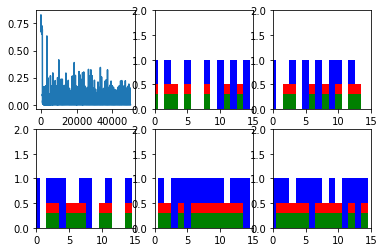

Step 300 Loss 4.96545e-05


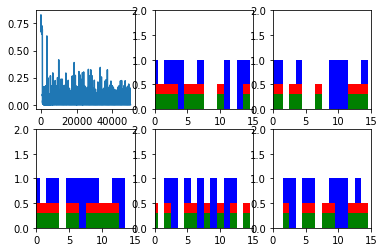

Step 400 Loss 4.12484e-05


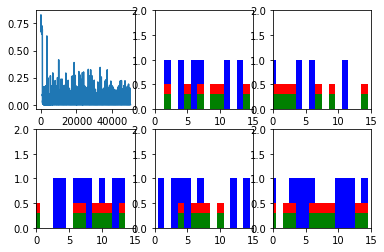

Step 500 Loss 4.94638e-05


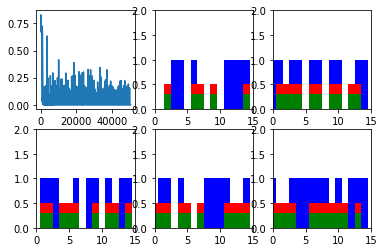

Step 600 Loss 4.5174e-05


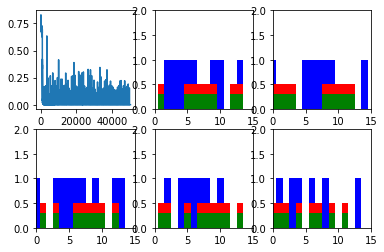

New data, epoch 76
Step 0 Loss 0.135043


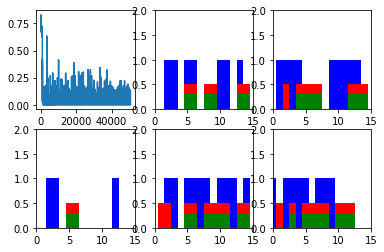

Step 100 Loss 3.87117e-05


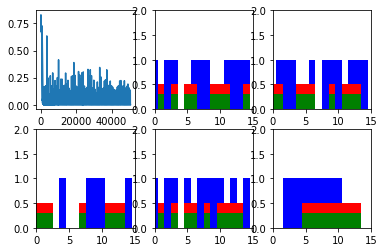

Step 200 Loss 4.3181e-05


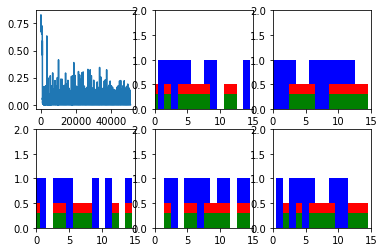

Step 300 Loss 4.24801e-05


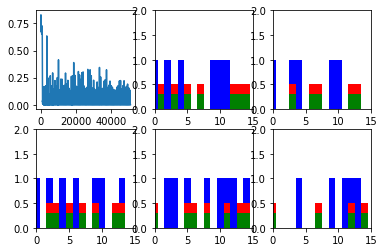

Step 400 Loss 4.3154e-05


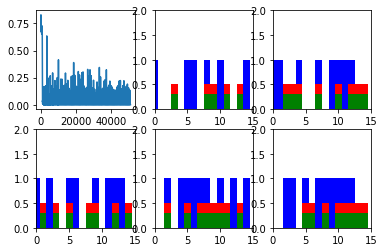

Step 500 Loss 4.70051e-05


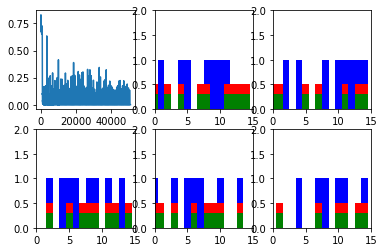

Step 600 Loss 4.0743e-05


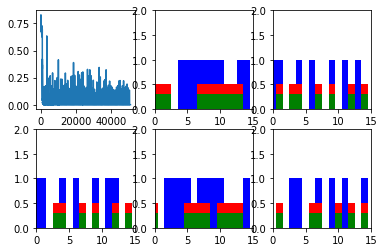

New data, epoch 77
Step 0 Loss 0.235112


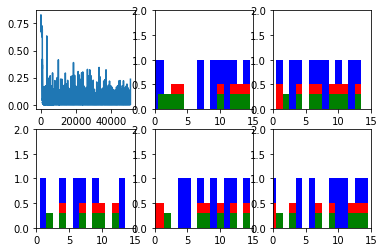

Step 100 Loss 5.20661e-05


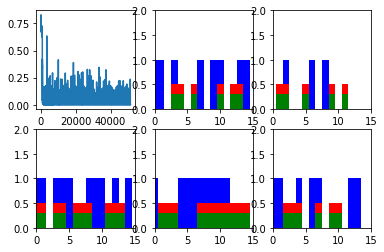

Step 200 Loss 5.08572e-05


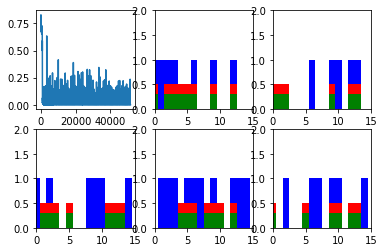

Step 300 Loss 6.74652e-05


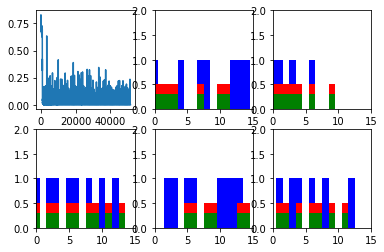

Step 400 Loss 5.59431e-05


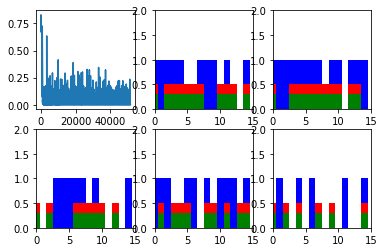

Step 500 Loss 4.96607e-05


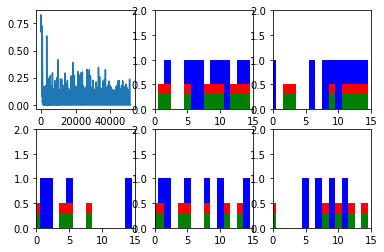

Step 600 Loss 4.70427e-05


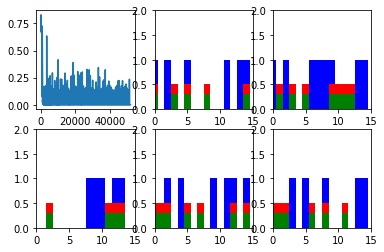

New data, epoch 78
Step 0 Loss 0.336835


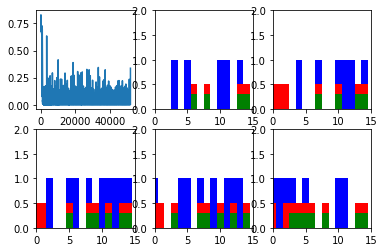

Step 100 Loss 4.33639e-05


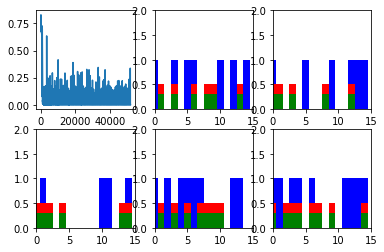

Step 200 Loss 4.17617e-05


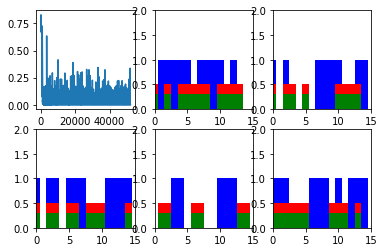

Step 300 Loss 4.3677e-05


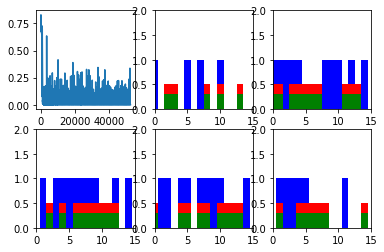

Step 400 Loss 4.29475e-05


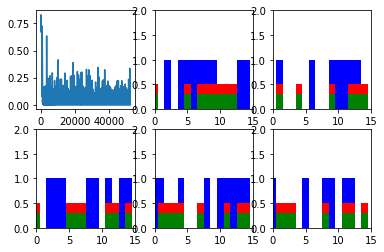

Step 500 Loss 3.8157e-05


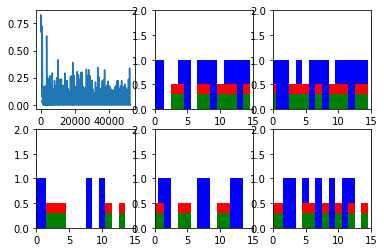

Step 600 Loss 4.87423e-05


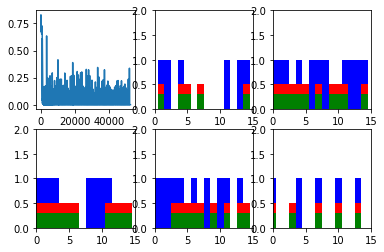

New data, epoch 79
Step 0 Loss 0.258471


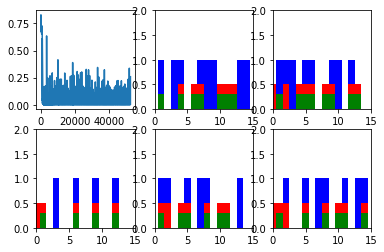

Step 100 Loss 5.13486e-05


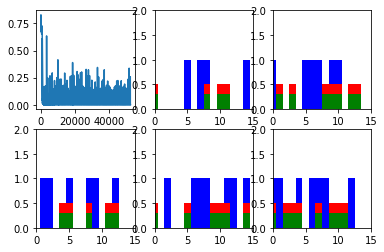

Step 200 Loss 4.4292e-05


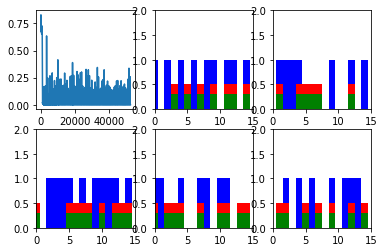

Step 300 Loss 4.6506e-05


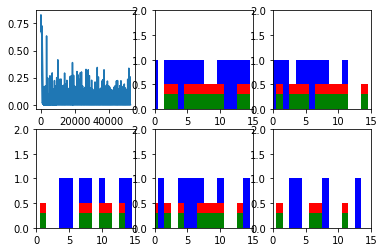

Step 400 Loss 3.93523e-05


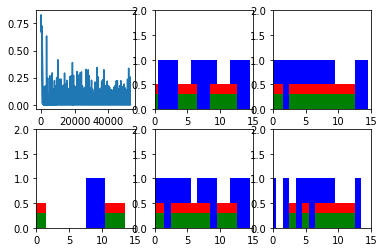

Step 500 Loss 4.58273e-05


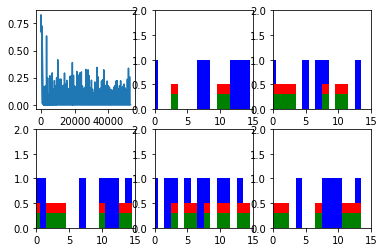

Step 600 Loss 4.39137e-05


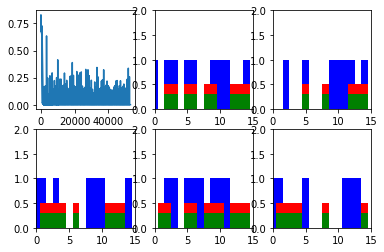

New data, epoch 80
Step 0 Loss 0.195112


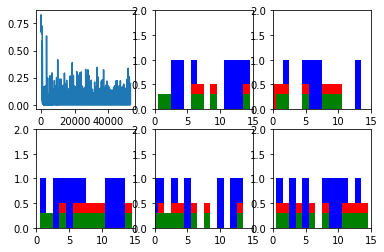

Step 100 Loss 4.75645e-05


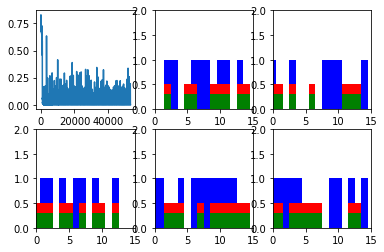

Step 200 Loss 4.25819e-05


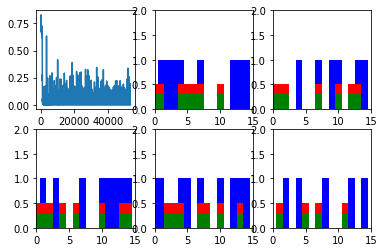

Step 300 Loss 3.98116e-05


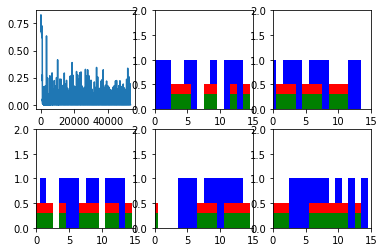

Step 400 Loss 4.44716e-05


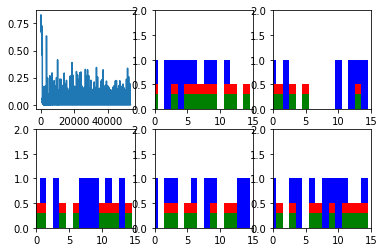

Step 500 Loss 5.92936e-05


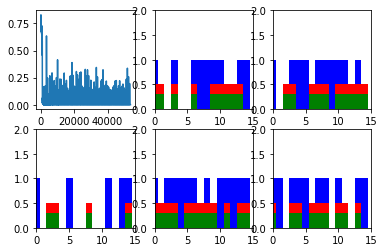

Step 600 Loss 4.38326e-05


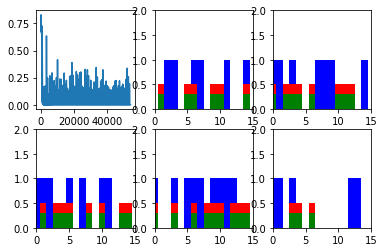

New data, epoch 81
Step 0 Loss 0.155823


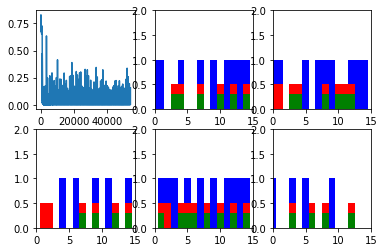

Step 100 Loss 5.18288e-05


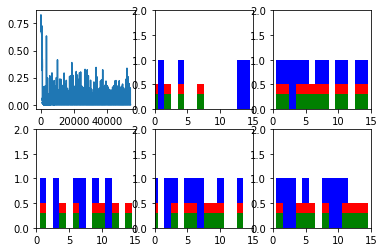

Step 200 Loss 4.36754e-05


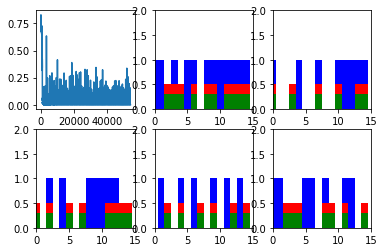

Step 300 Loss 4.13056e-05


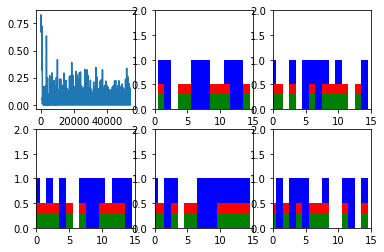

Step 400 Loss 4.28282e-05


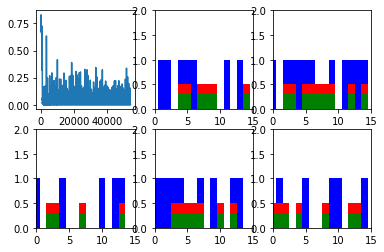

Step 500 Loss 4.28774e-05


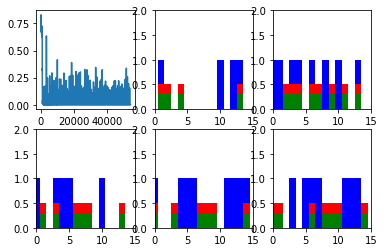

Step 600 Loss 4.3944e-05


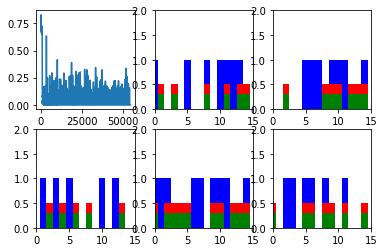

New data, epoch 82
Step 0 Loss 0.181005


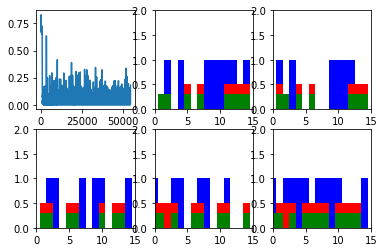

Step 100 Loss 4.24579e-05


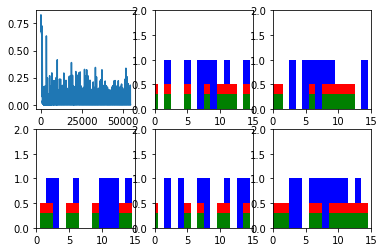

Step 200 Loss 5.10976e-05


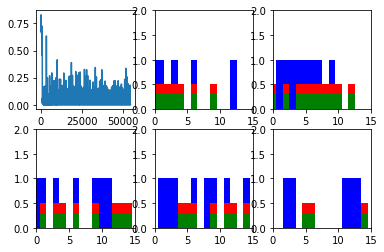

Step 300 Loss 4.48959e-05


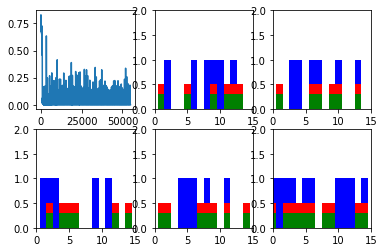

Step 400 Loss 4.16998e-05


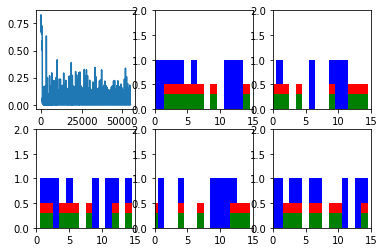

Step 500 Loss 3.85274e-05


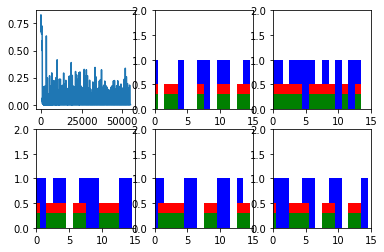

Step 600 Loss 4.60881e-05


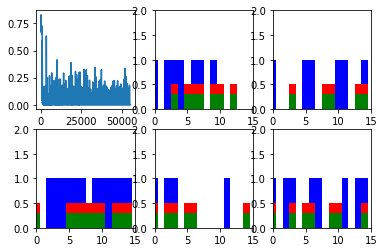

New data, epoch 83
Step 0 Loss 0.182668


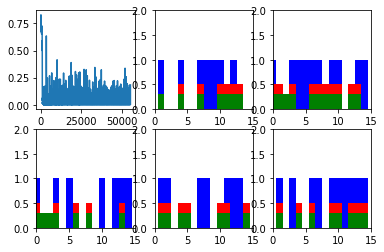

Step 100 Loss 3.91981e-05


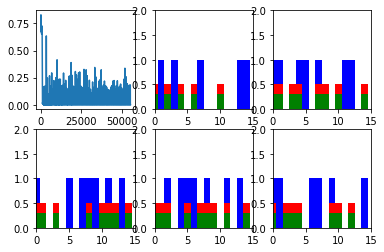

Step 200 Loss 4.31874e-05


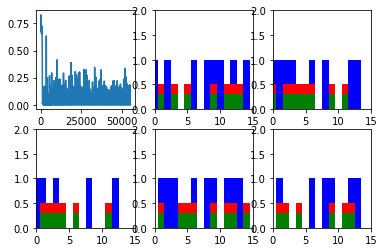

Step 300 Loss 4.09877e-05


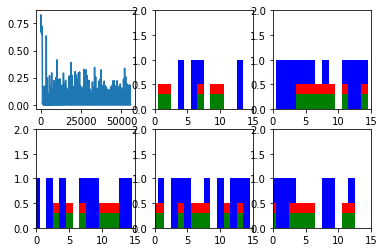

Step 400 Loss 4.62216e-05


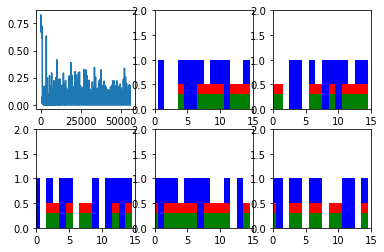

Step 500 Loss 4.11356e-05


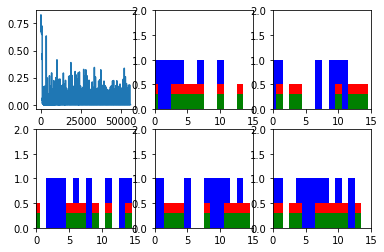

Step 600 Loss 4.27154e-05


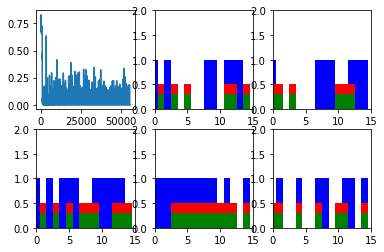

New data, epoch 84
Step 0 Loss 0.262112


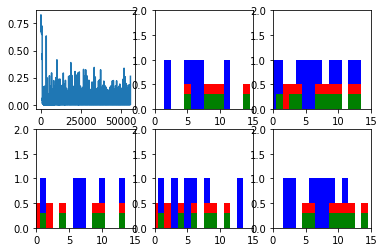

Step 100 Loss 4.41777e-05


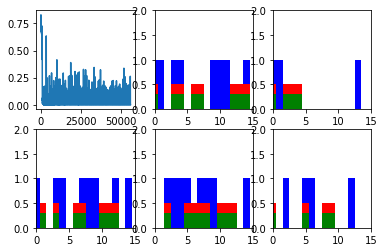

Step 200 Loss 4.16155e-05


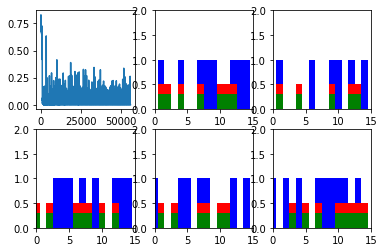

Step 300 Loss 4.19176e-05


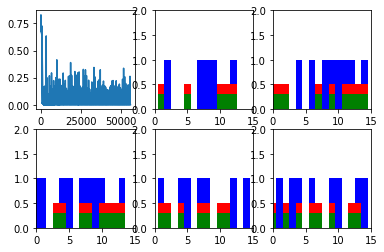

Step 400 Loss 4.42379e-05


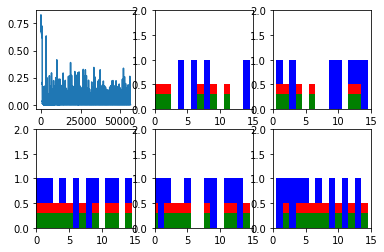

Step 500 Loss 4.14423e-05


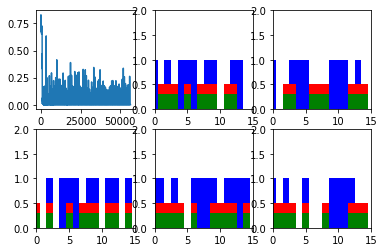

Step 600 Loss 4.37643e-05


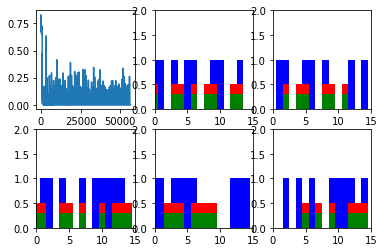

New data, epoch 85
Step 0 Loss 0.161065


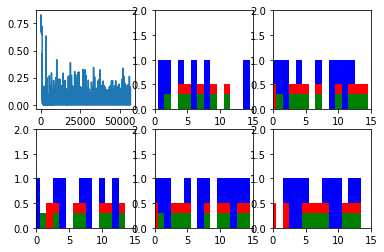

Step 100 Loss 4.05332e-05


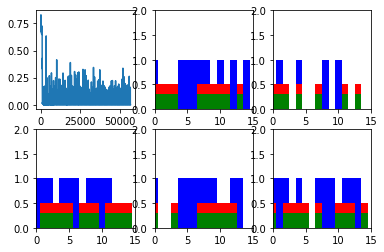

Step 200 Loss 4.02837e-05


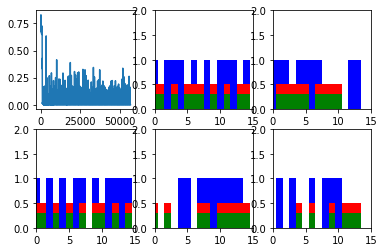

Step 300 Loss 4.06651e-05


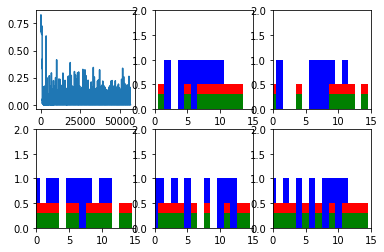

Step 400 Loss 4.35434e-05


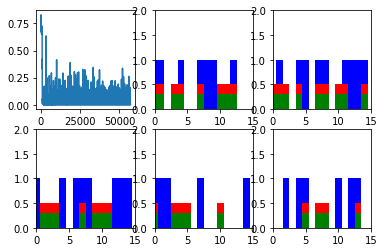

Step 500 Loss 4.01947e-05


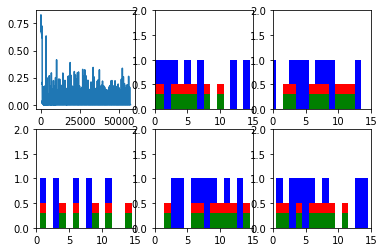

Step 600 Loss 3.83208e-05


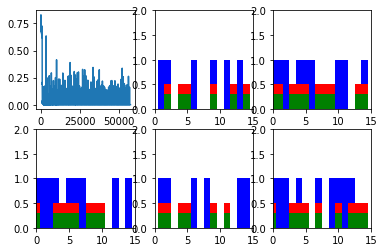

New data, epoch 86
Step 0 Loss 0.156715


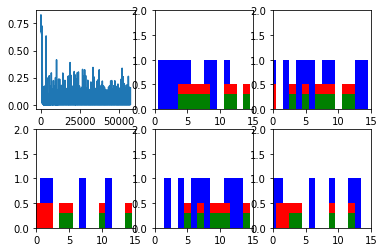

Step 100 Loss 4.13883e-05


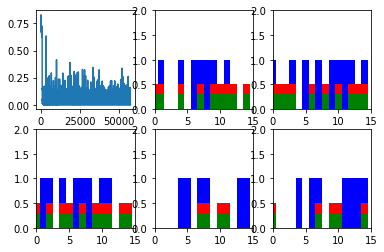

Step 200 Loss 3.8672e-05


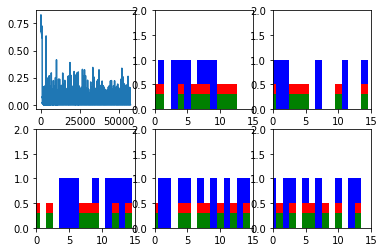

Step 300 Loss 4.08225e-05


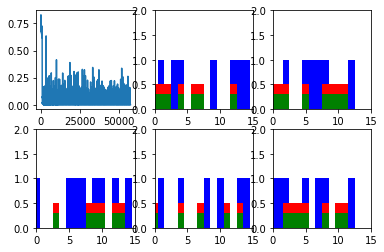

Step 400 Loss 4.13915e-05


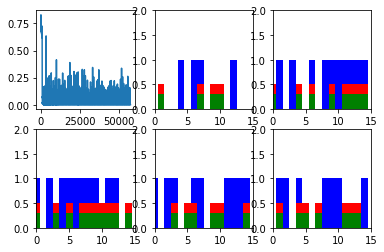

Step 500 Loss 4.08193e-05


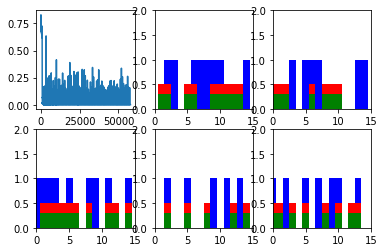

Step 600 Loss 4.07081e-05


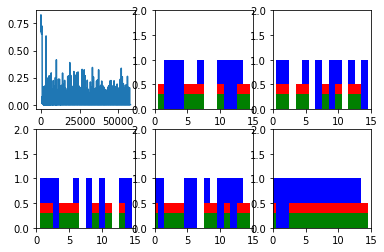

New data, epoch 87
Step 0 Loss 0.137887


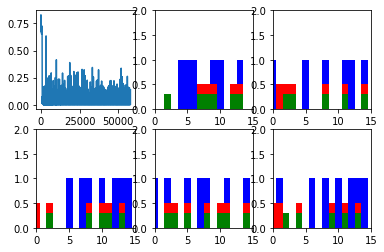

Step 100 Loss 4.44892e-05


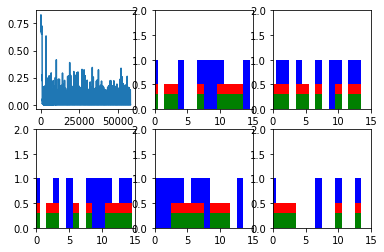

Step 200 Loss 3.86785e-05


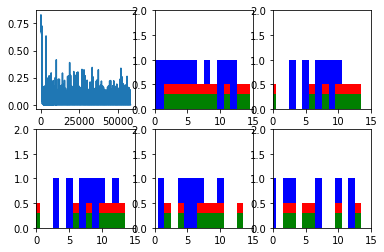

Step 300 Loss 4.62168e-05


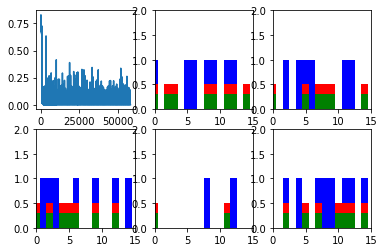

Step 400 Loss 3.96352e-05


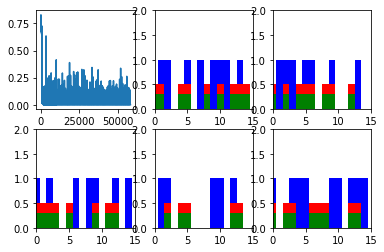

Step 500 Loss 3.77915e-05


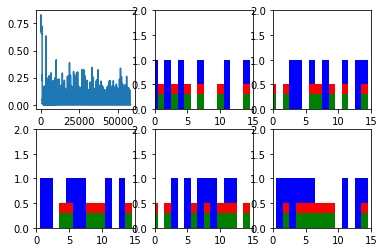

Step 600 Loss 4.23277e-05


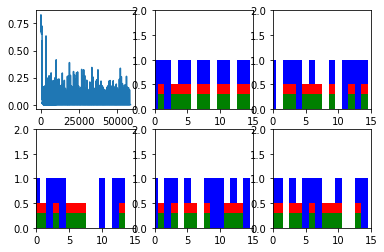

New data, epoch 88
Step 0 Loss 0.164073


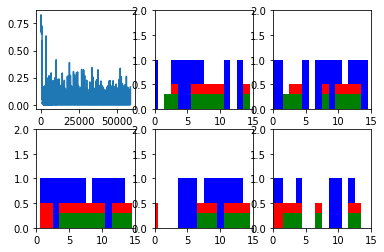

Step 100 Loss 4.27997e-05


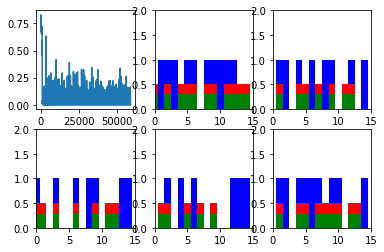

Step 200 Loss 3.40184e-05


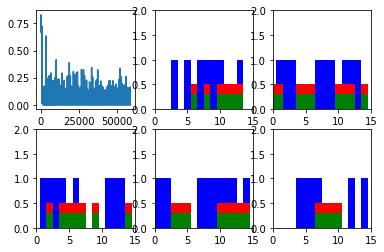

Step 300 Loss 4.35546e-05


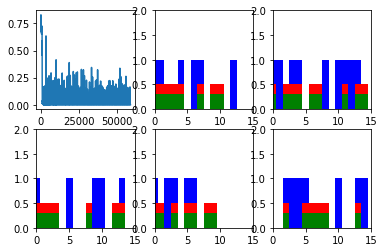

Step 400 Loss 3.65566e-05


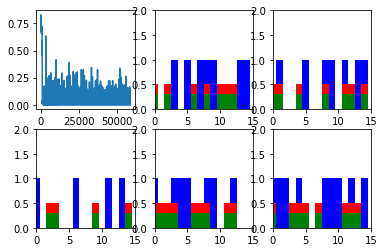

Step 500 Loss 3.96496e-05


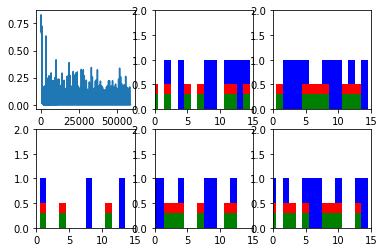

Step 600 Loss 3.96209e-05


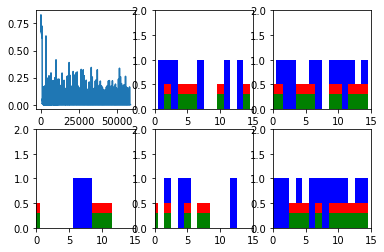

New data, epoch 89
Step 0 Loss 0.216749


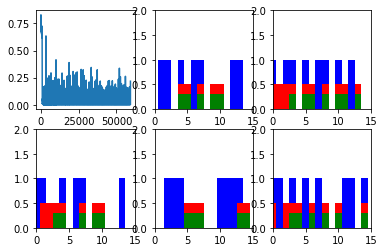

Step 100 Loss 4.4133e-05


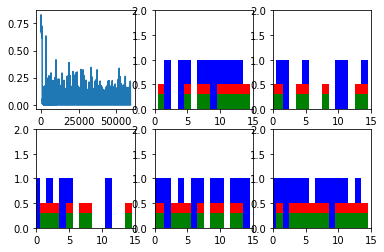

Step 200 Loss 4.02978e-05


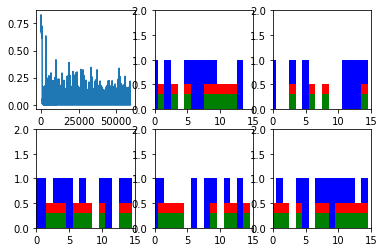

Step 300 Loss 4.85512e-05


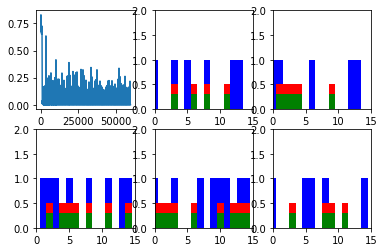

Step 400 Loss 4.63358e-05


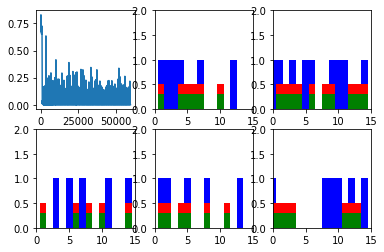

Step 500 Loss 3.74275e-05


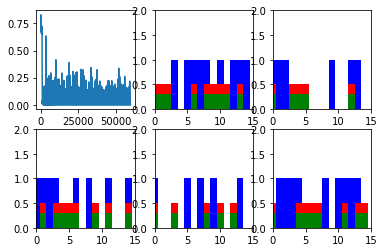

Step 600 Loss 4.50769e-05


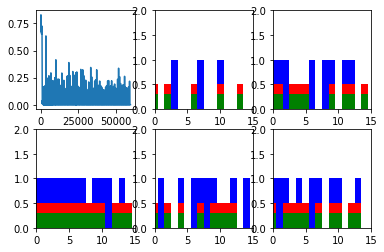

New data, epoch 90
Step 0 Loss 0.249413


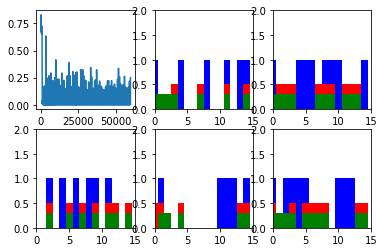

Step 100 Loss 4.00231e-05


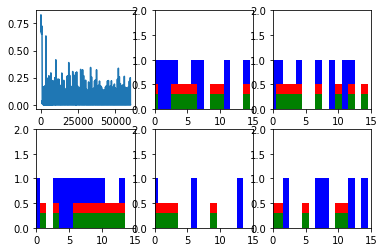

Step 200 Loss 4.15264e-05


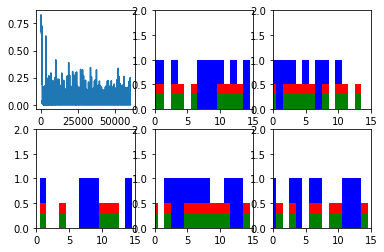

Step 300 Loss 4.63055e-05


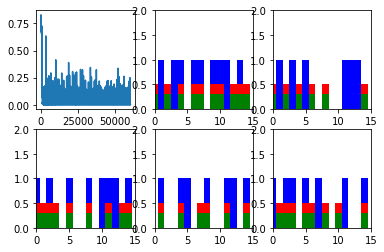

Step 400 Loss 4.20591e-05


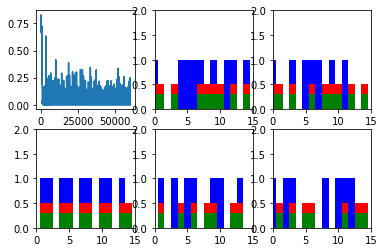

Step 500 Loss 4.3391e-05


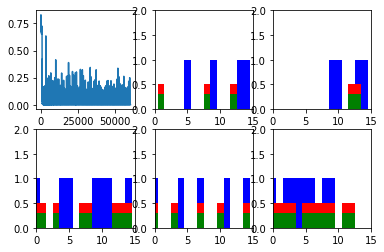

Step 600 Loss 3.96162e-05


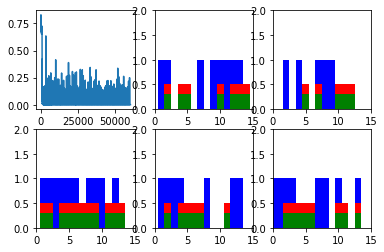

New data, epoch 91
Step 0 Loss 0.205824


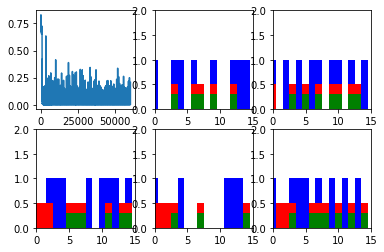

Step 100 Loss 4.25294e-05


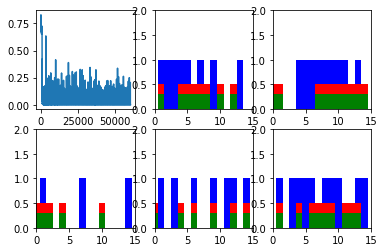

Step 200 Loss 3.92393e-05


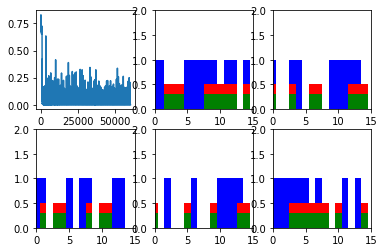

Step 300 Loss 3.97972e-05


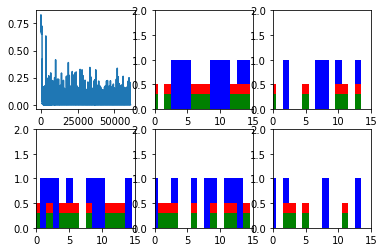

Step 400 Loss 3.62324e-05


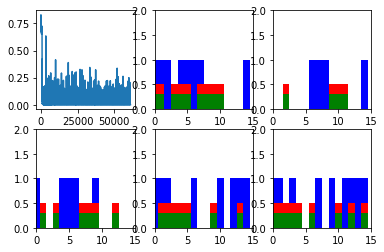

Step 500 Loss 4.13152e-05


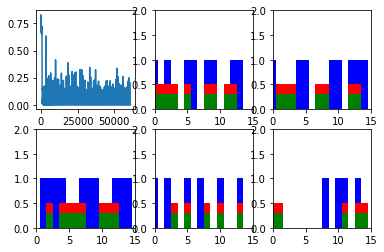

Step 600 Loss 3.7917e-05


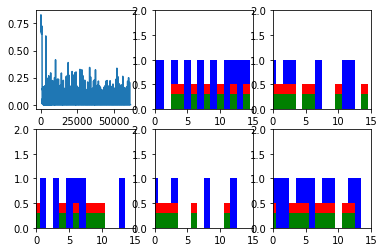

New data, epoch 92
Step 0 Loss 0.21662


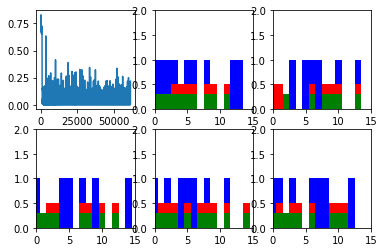

Step 100 Loss 4.10609e-05


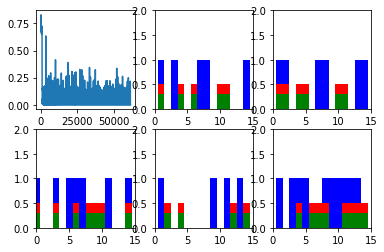

Step 200 Loss 3.91965e-05


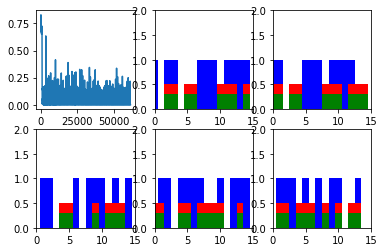

Step 300 Loss 4.45209e-05


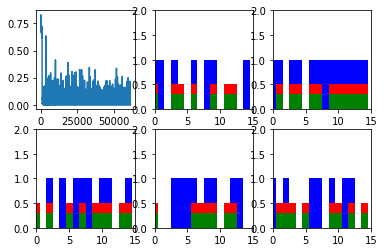

Step 400 Loss 4.31287e-05


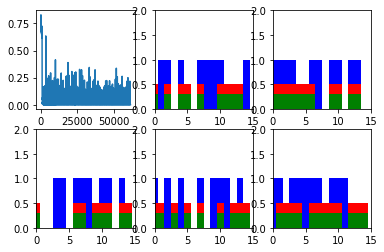

Step 500 Loss 4.0813e-05


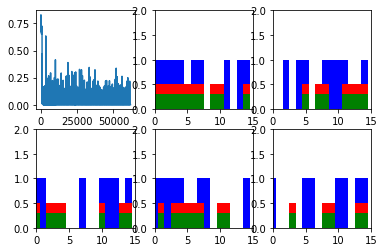

Step 600 Loss 3.7852e-05


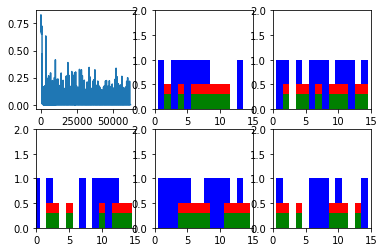

New data, epoch 93
Step 0 Loss 0.124747


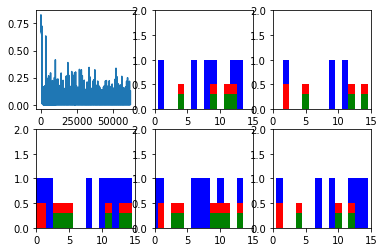

Step 100 Loss 4.08237e-05


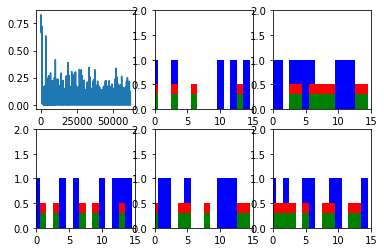

Step 200 Loss 4.20257e-05


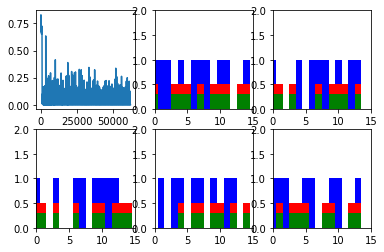

Step 300 Loss 3.56332e-05


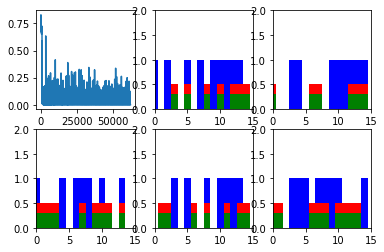

Step 400 Loss 3.84877e-05


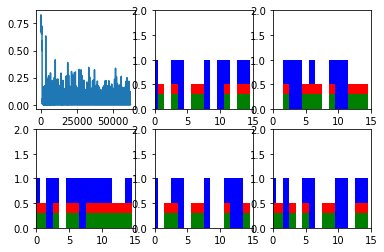

Step 500 Loss 3.76644e-05


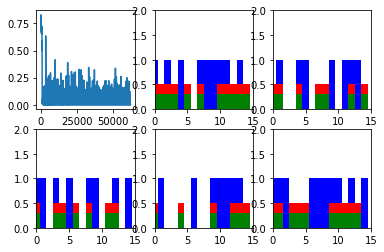

Step 600 Loss 3.87007e-05


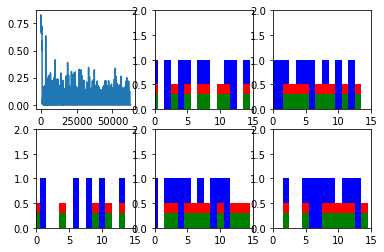

New data, epoch 94
Step 0 Loss 0.128716


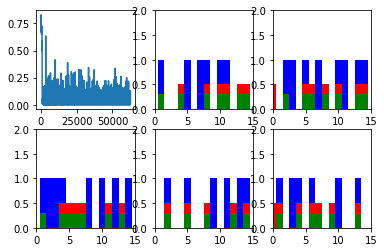

Step 100 Loss 3.87944e-05


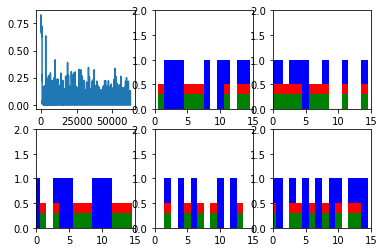

Step 200 Loss 3.77423e-05


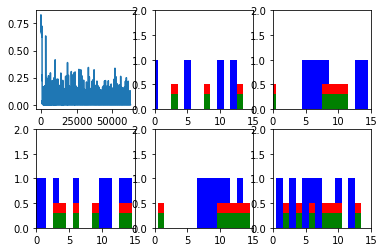

Step 300 Loss 3.9746e-05


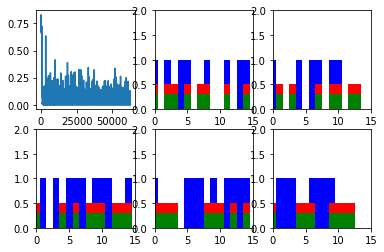

Step 400 Loss 4.03121e-05


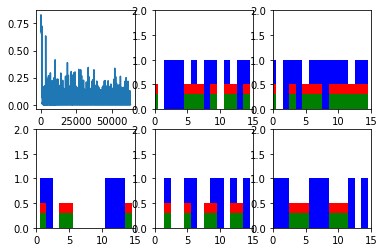

Step 500 Loss 3.90535e-05


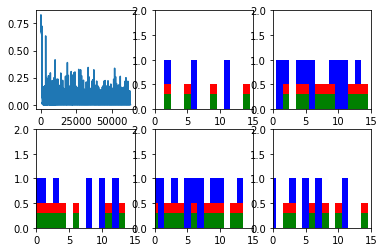

Step 600 Loss 3.76389e-05


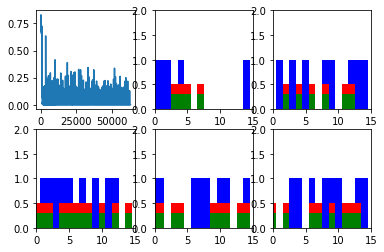

New data, epoch 95
Step 0 Loss 0.167808


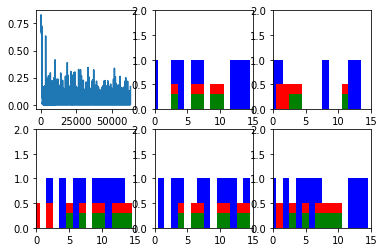

Step 100 Loss 3.64724e-05


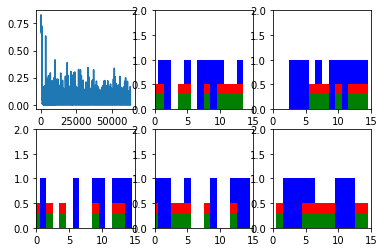

Step 200 Loss 3.40231e-05


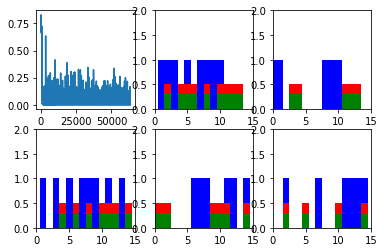

Step 300 Loss 3.18917e-05


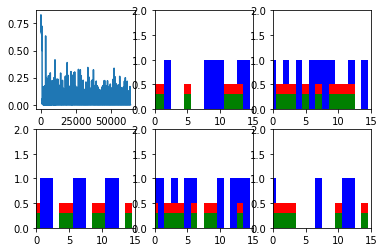

Step 400 Loss 4.32542e-05


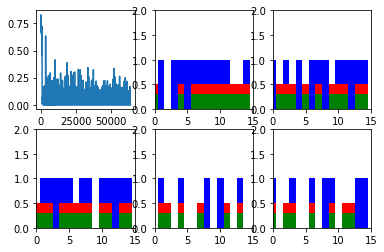

Step 500 Loss 3.75023e-05


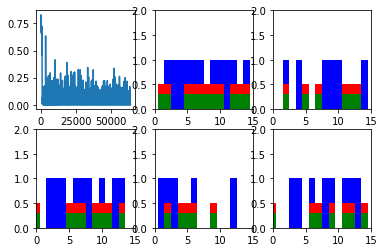

Step 600 Loss 3.52628e-05


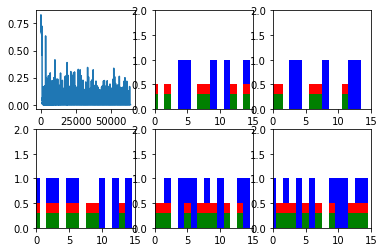

New data, epoch 96
Step 0 Loss 0.158414


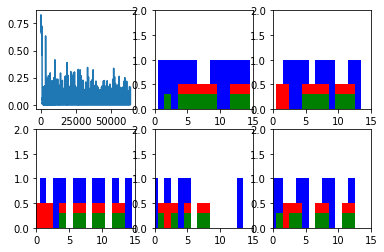

Step 100 Loss 3.68171e-05


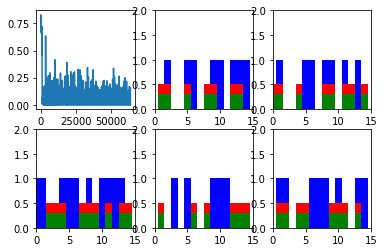

Step 200 Loss 3.93284e-05


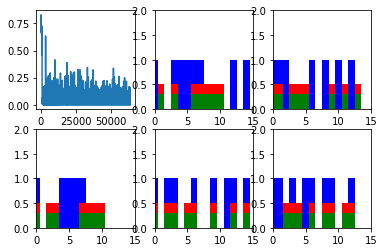

Step 300 Loss 4.09685e-05


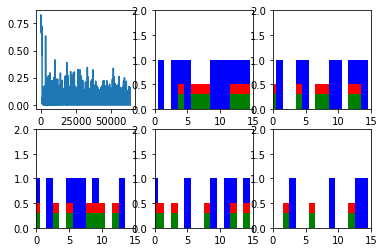

Step 400 Loss 3.56967e-05


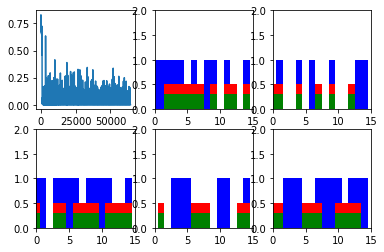

Step 500 Loss 4.05361e-05


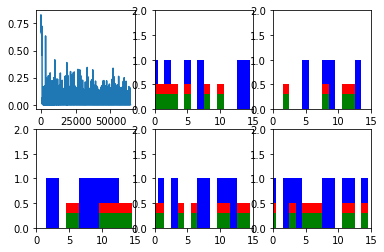

Step 600 Loss 4.14168e-05


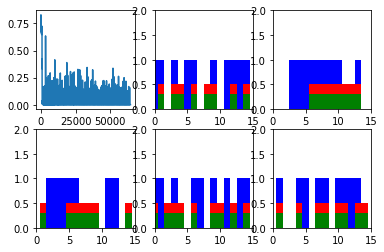

New data, epoch 97
Step 0 Loss 0.296205


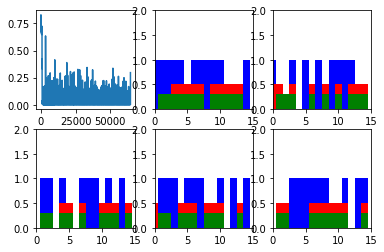

Step 100 Loss 3.83223e-05


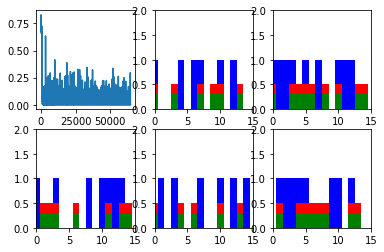

Step 200 Loss 3.82572e-05


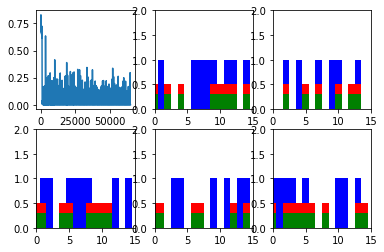

Step 300 Loss 4.19493e-05


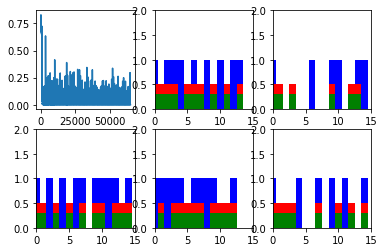

Step 400 Loss 4.91587e-05


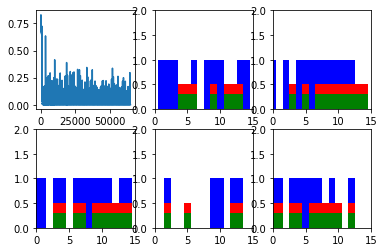

Step 500 Loss 4.15964e-05


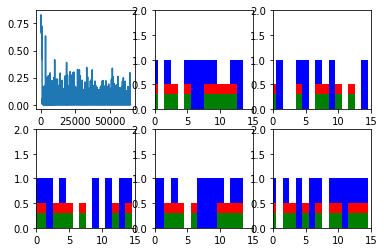

Step 600 Loss 3.58588e-05


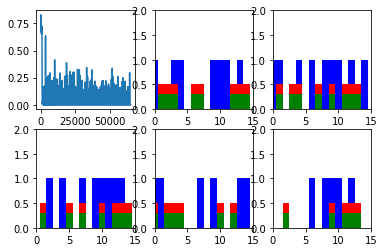

New data, epoch 98
Step 0 Loss 0.211415


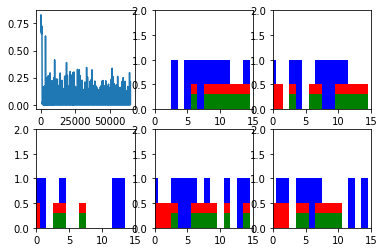

Step 100 Loss 3.79441e-05


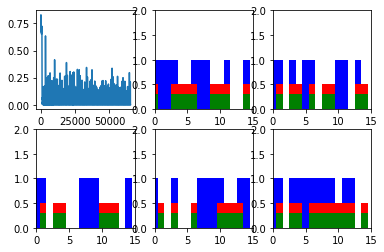

Step 200 Loss 3.89391e-05


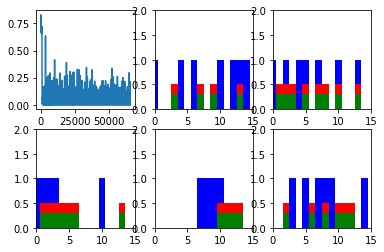

Step 300 Loss 3.83923e-05


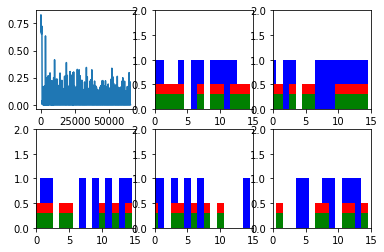

Step 400 Loss 3.48432e-05


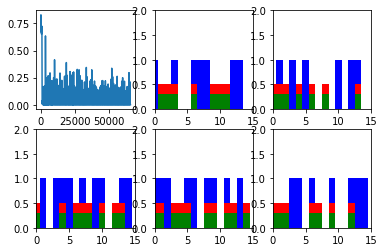

Step 500 Loss 3.74053e-05


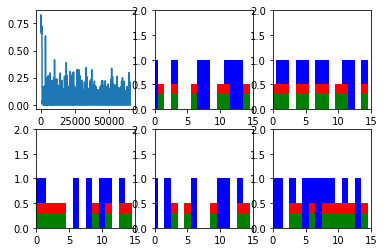

Step 600 Loss 3.91297e-05


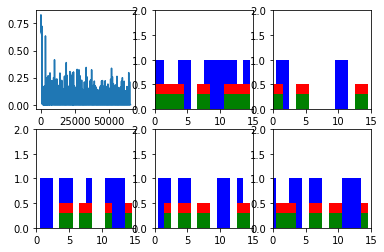

New data, epoch 99
Step 0 Loss 0.153624


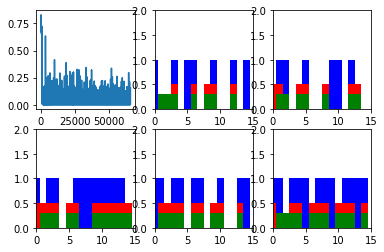

Step 100 Loss 3.57969e-05


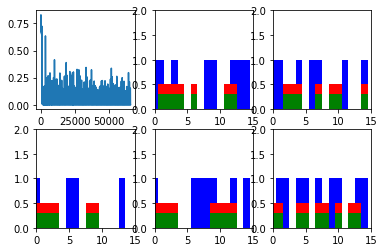

Step 200 Loss 3.28724e-05


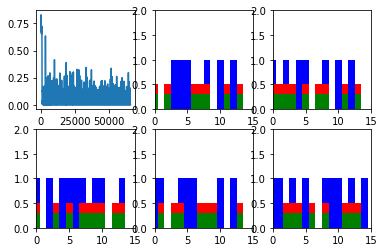

Step 300 Loss 3.86196e-05


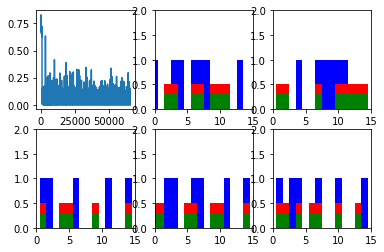

Step 400 Loss 3.72877e-05


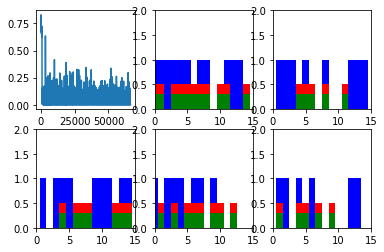

Step 500 Loss 3.74276e-05


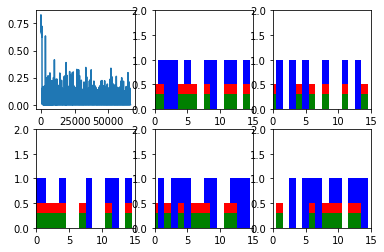

Step 600 Loss 3.96385e-05


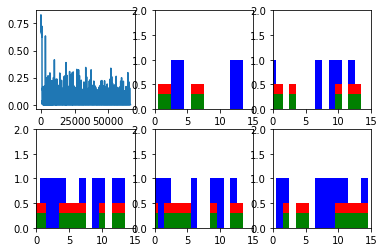

In [12]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1) # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()